In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 50_Startups Data

In [2]:
#read the data
 
df = pd.read_csv("50_Startups.csv")
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [3]:
df.rename(columns={'R&D Spend':'RandD_Spend'},inplace = True)

In [4]:
df.rename(columns={'Marketing Spend':'Marketing_Spend'},inplace = True)

In [5]:
#dataset description

df.describe()

RandD_Spend  Administration  Marketing_Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [6]:
#check for missing values

df.isna().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [7]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

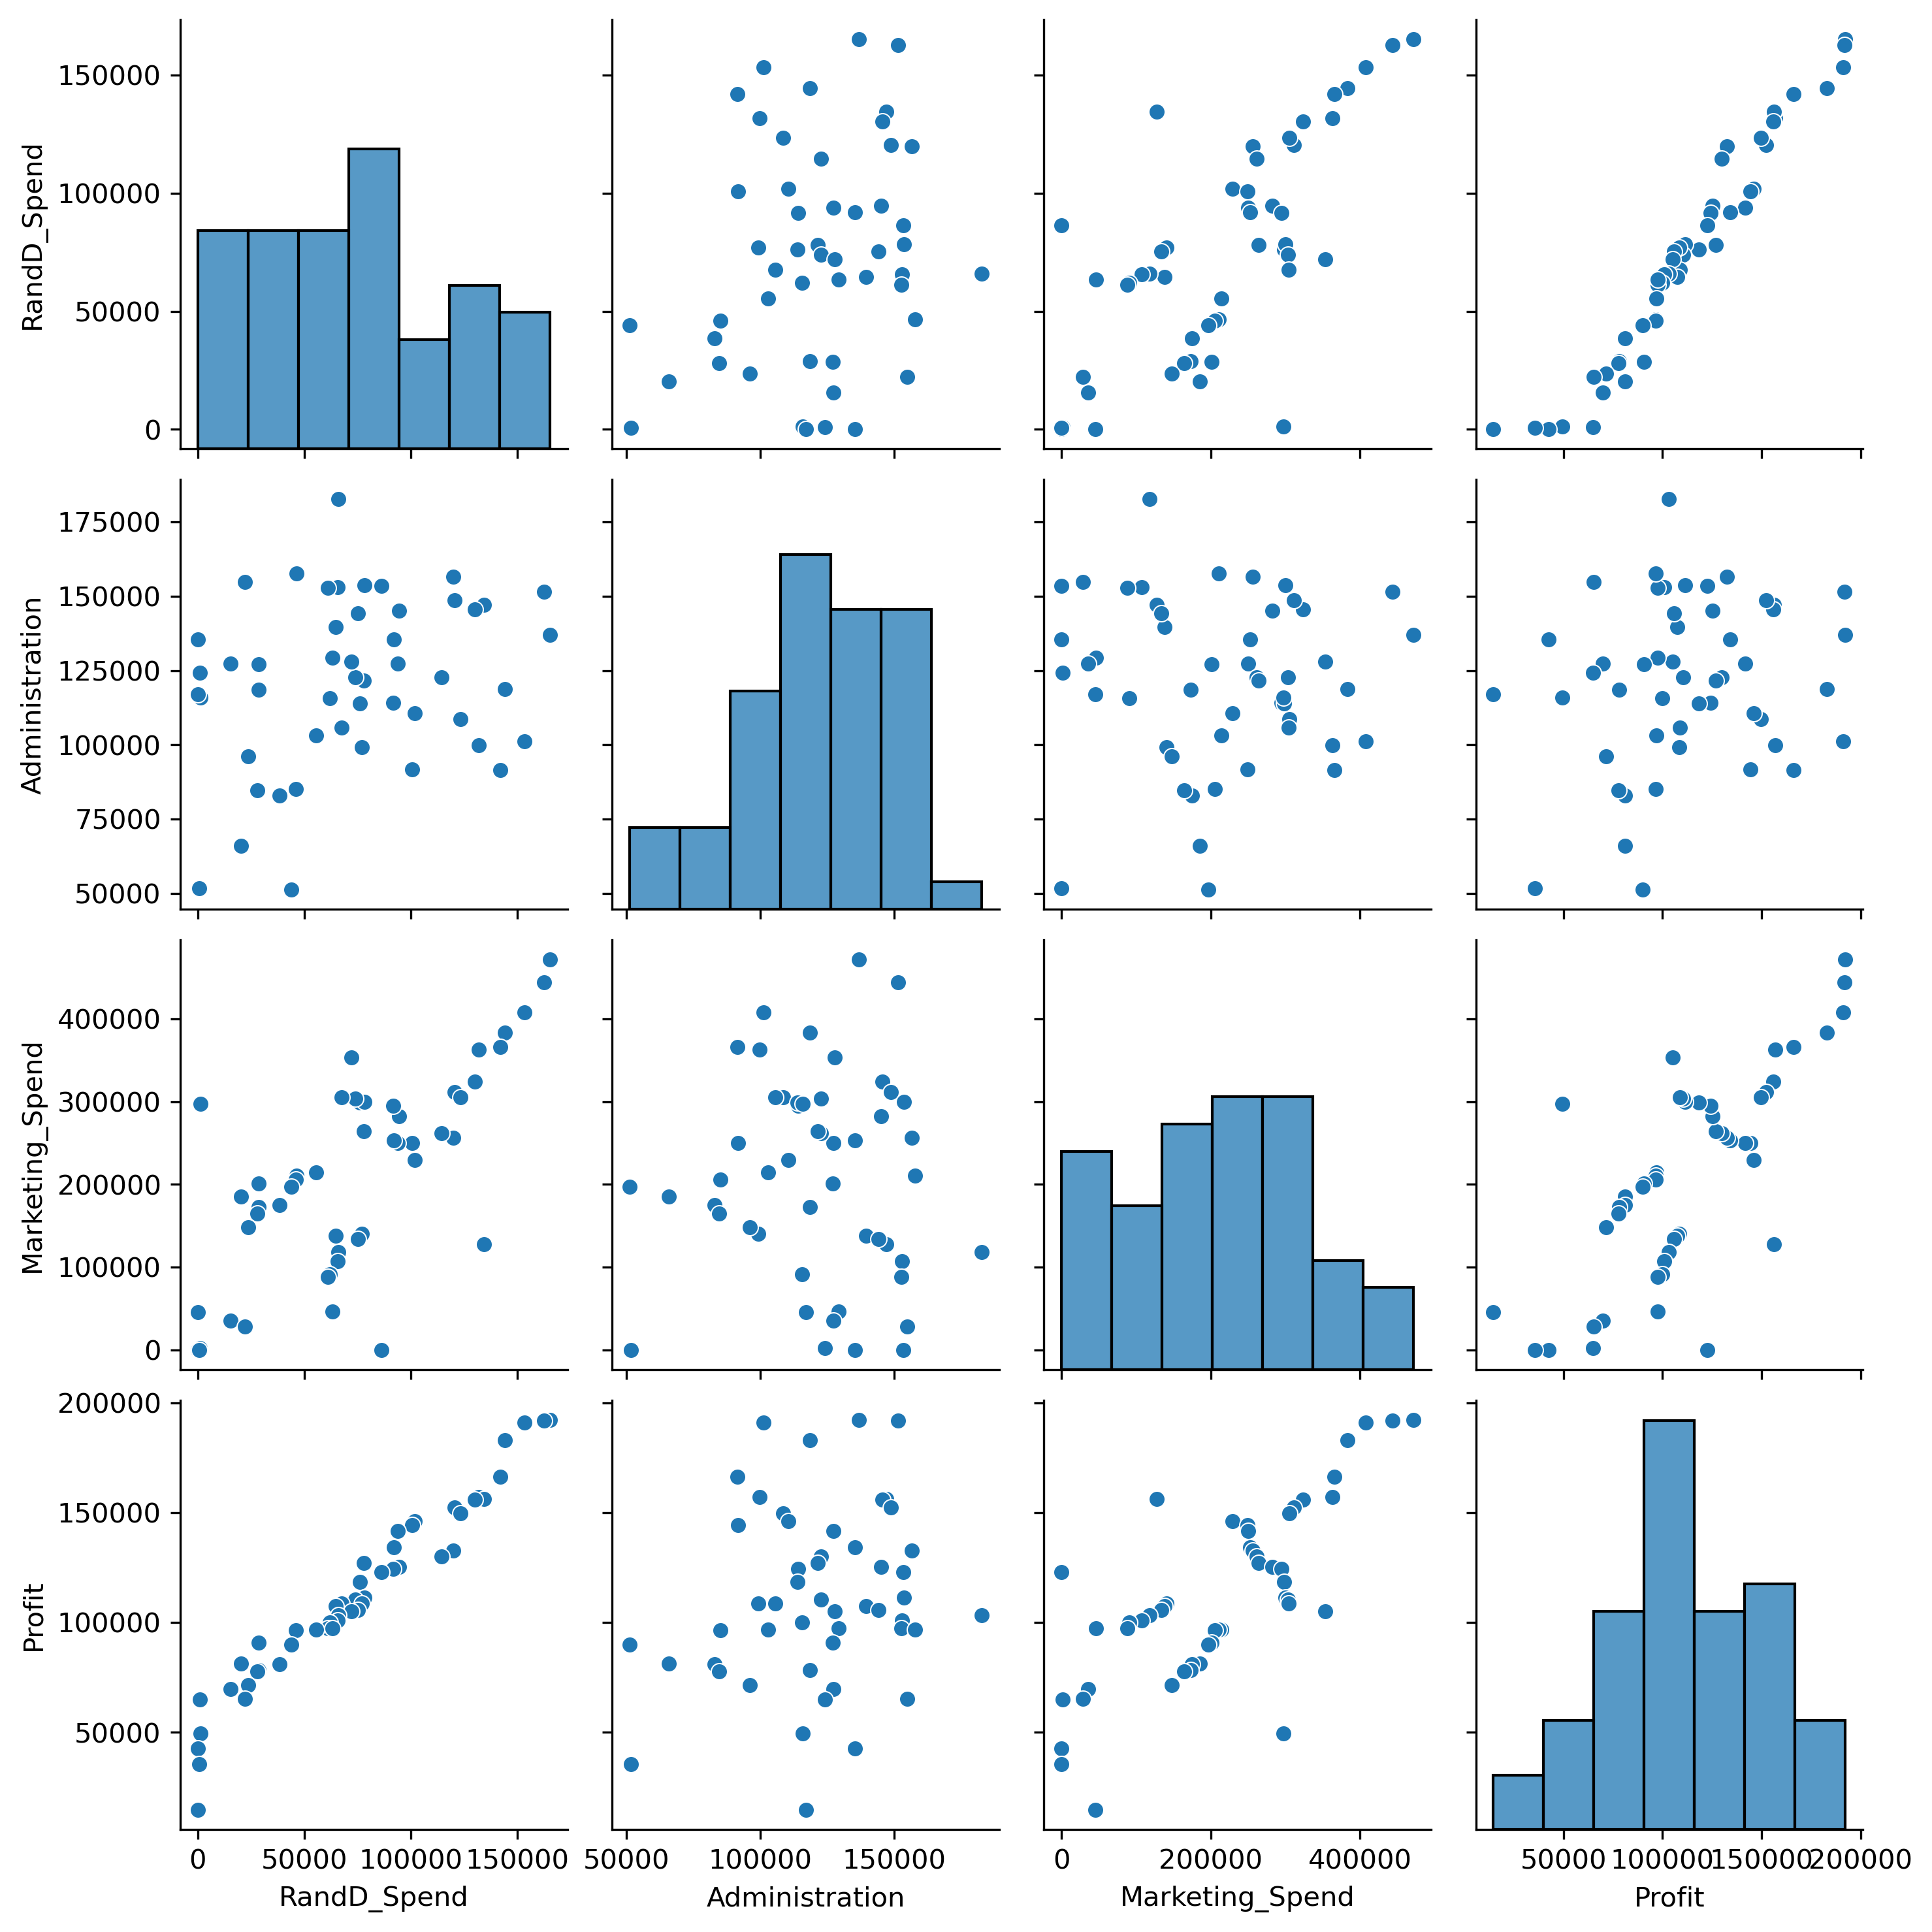

In [8]:
#scatter matrix , correlation matrix
#pair plot, pd.plotting.scatter_matrix

sns.pairplot(df)

<AxesSubplot:>

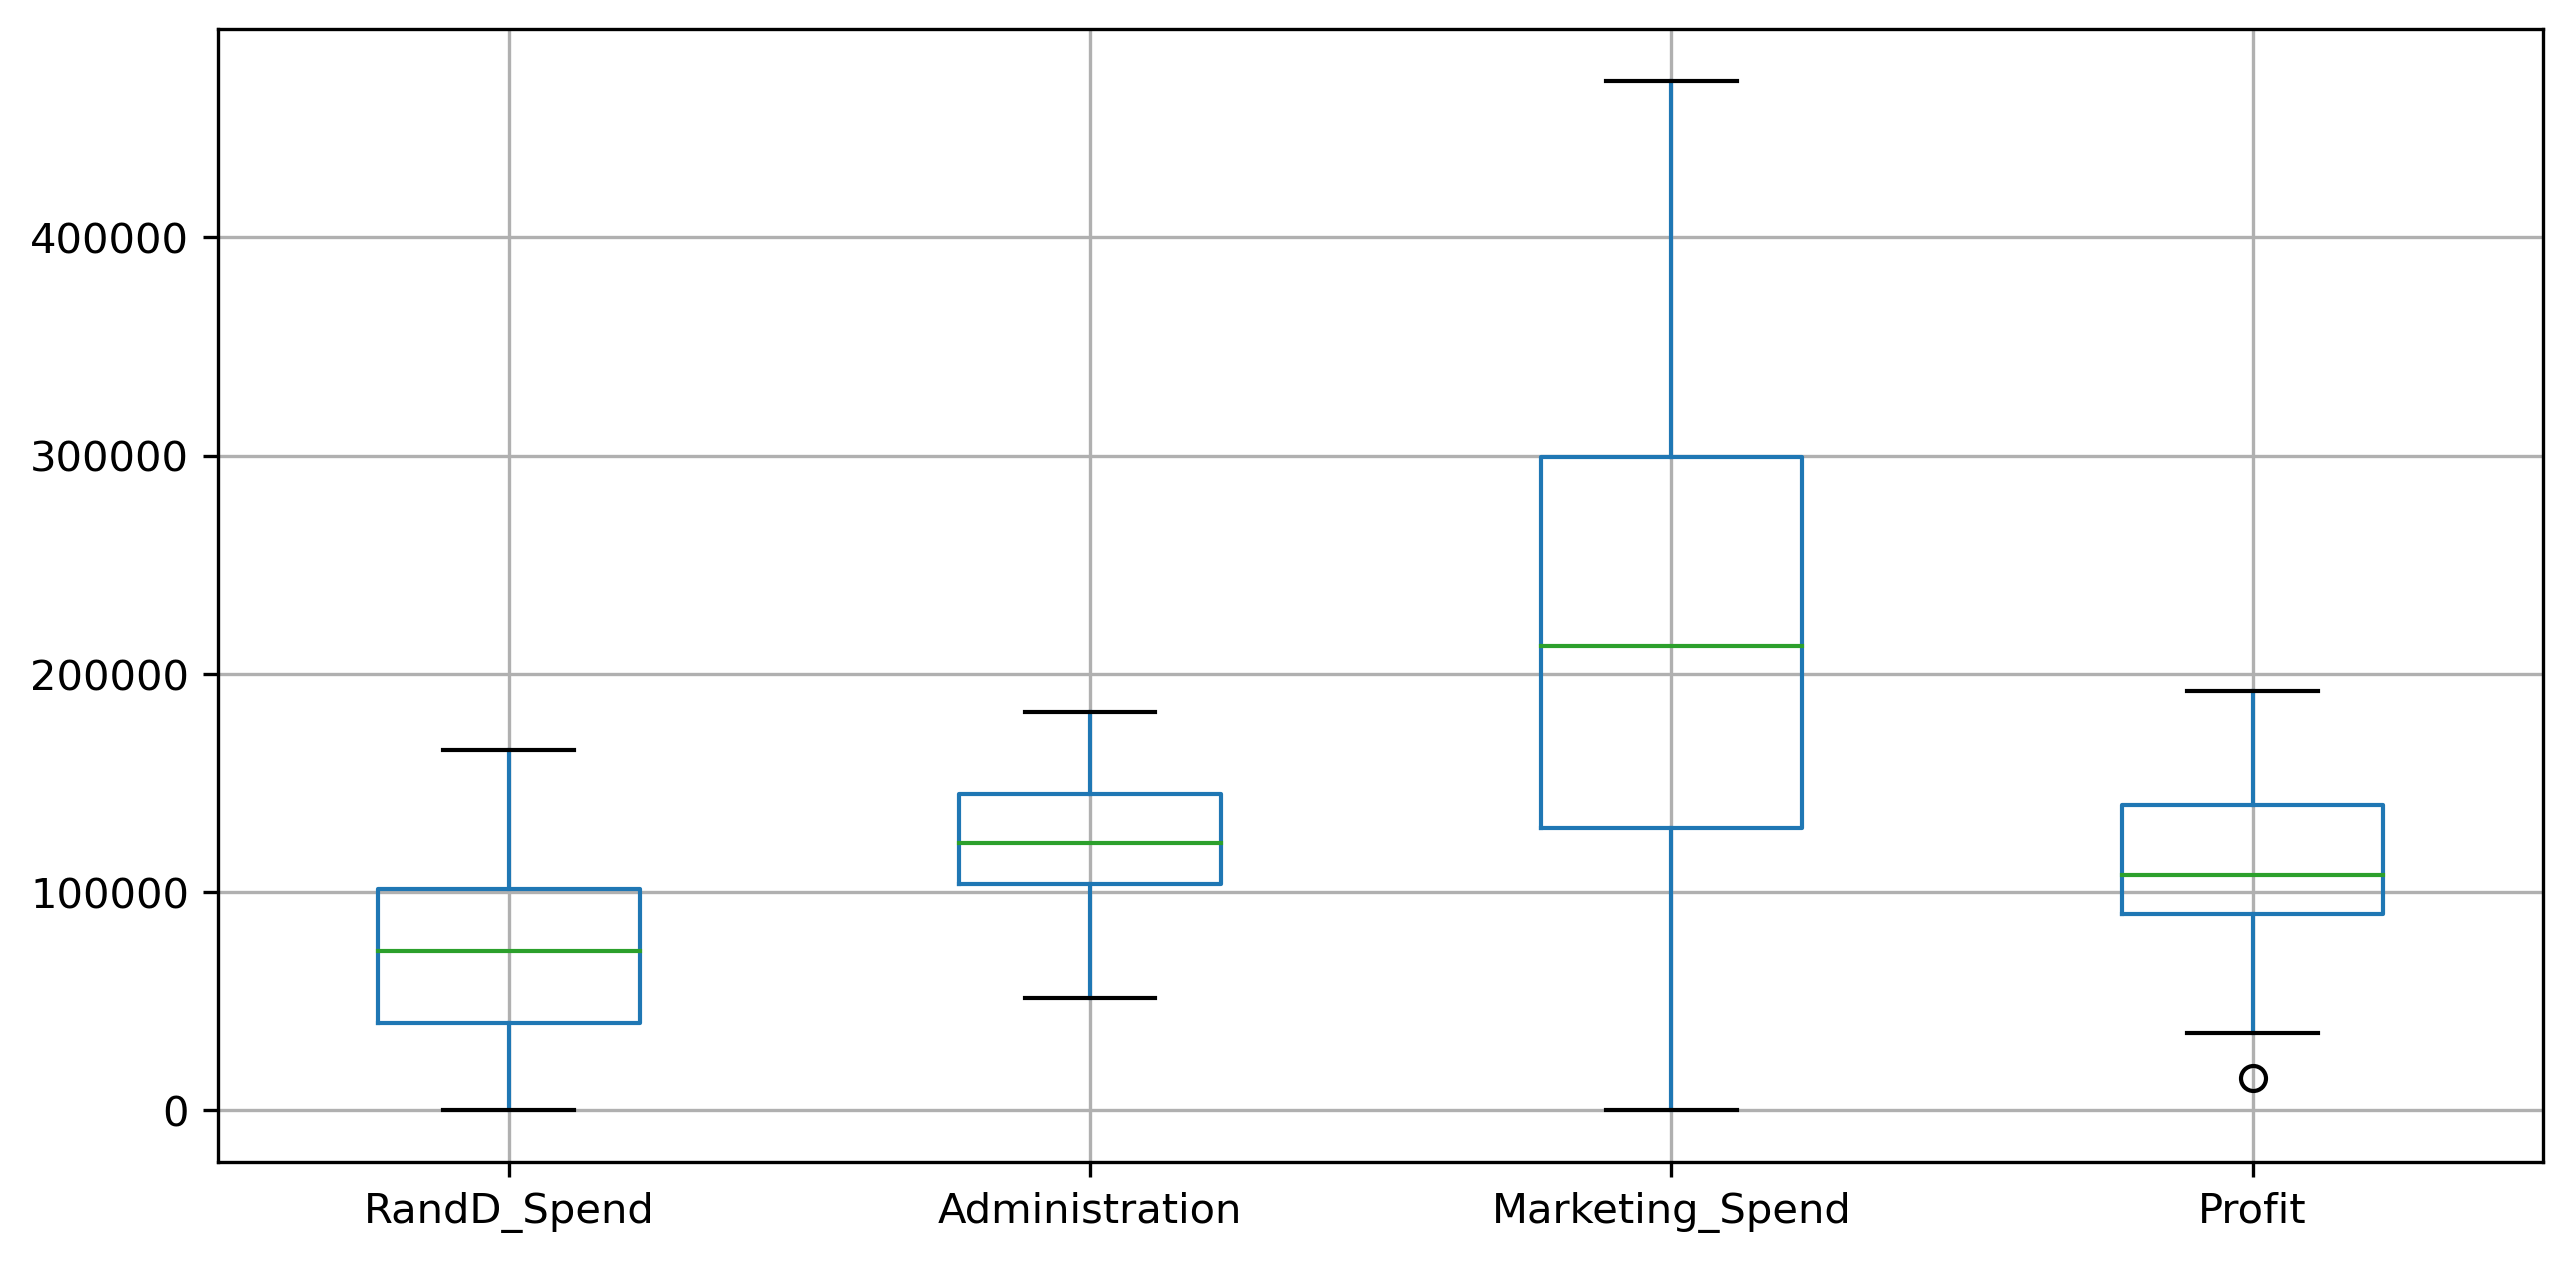

In [9]:
#Checking Outliers
df.boxplot()

* Based on the boxplot, we can observe that there is one outlier in profit column

In [10]:
#Correlation analysis

df.corr()

RandD_Spend  Administration  Marketing_Spend    Profit
RandD_Spend         1.000000        0.241955         0.724248  0.972900
Administration      0.241955        1.000000        -0.032154  0.200717
Marketing_Spend     0.724248       -0.032154         1.000000  0.747766
Profit              0.972900        0.200717         0.747766  1.000000

<AxesSubplot:>

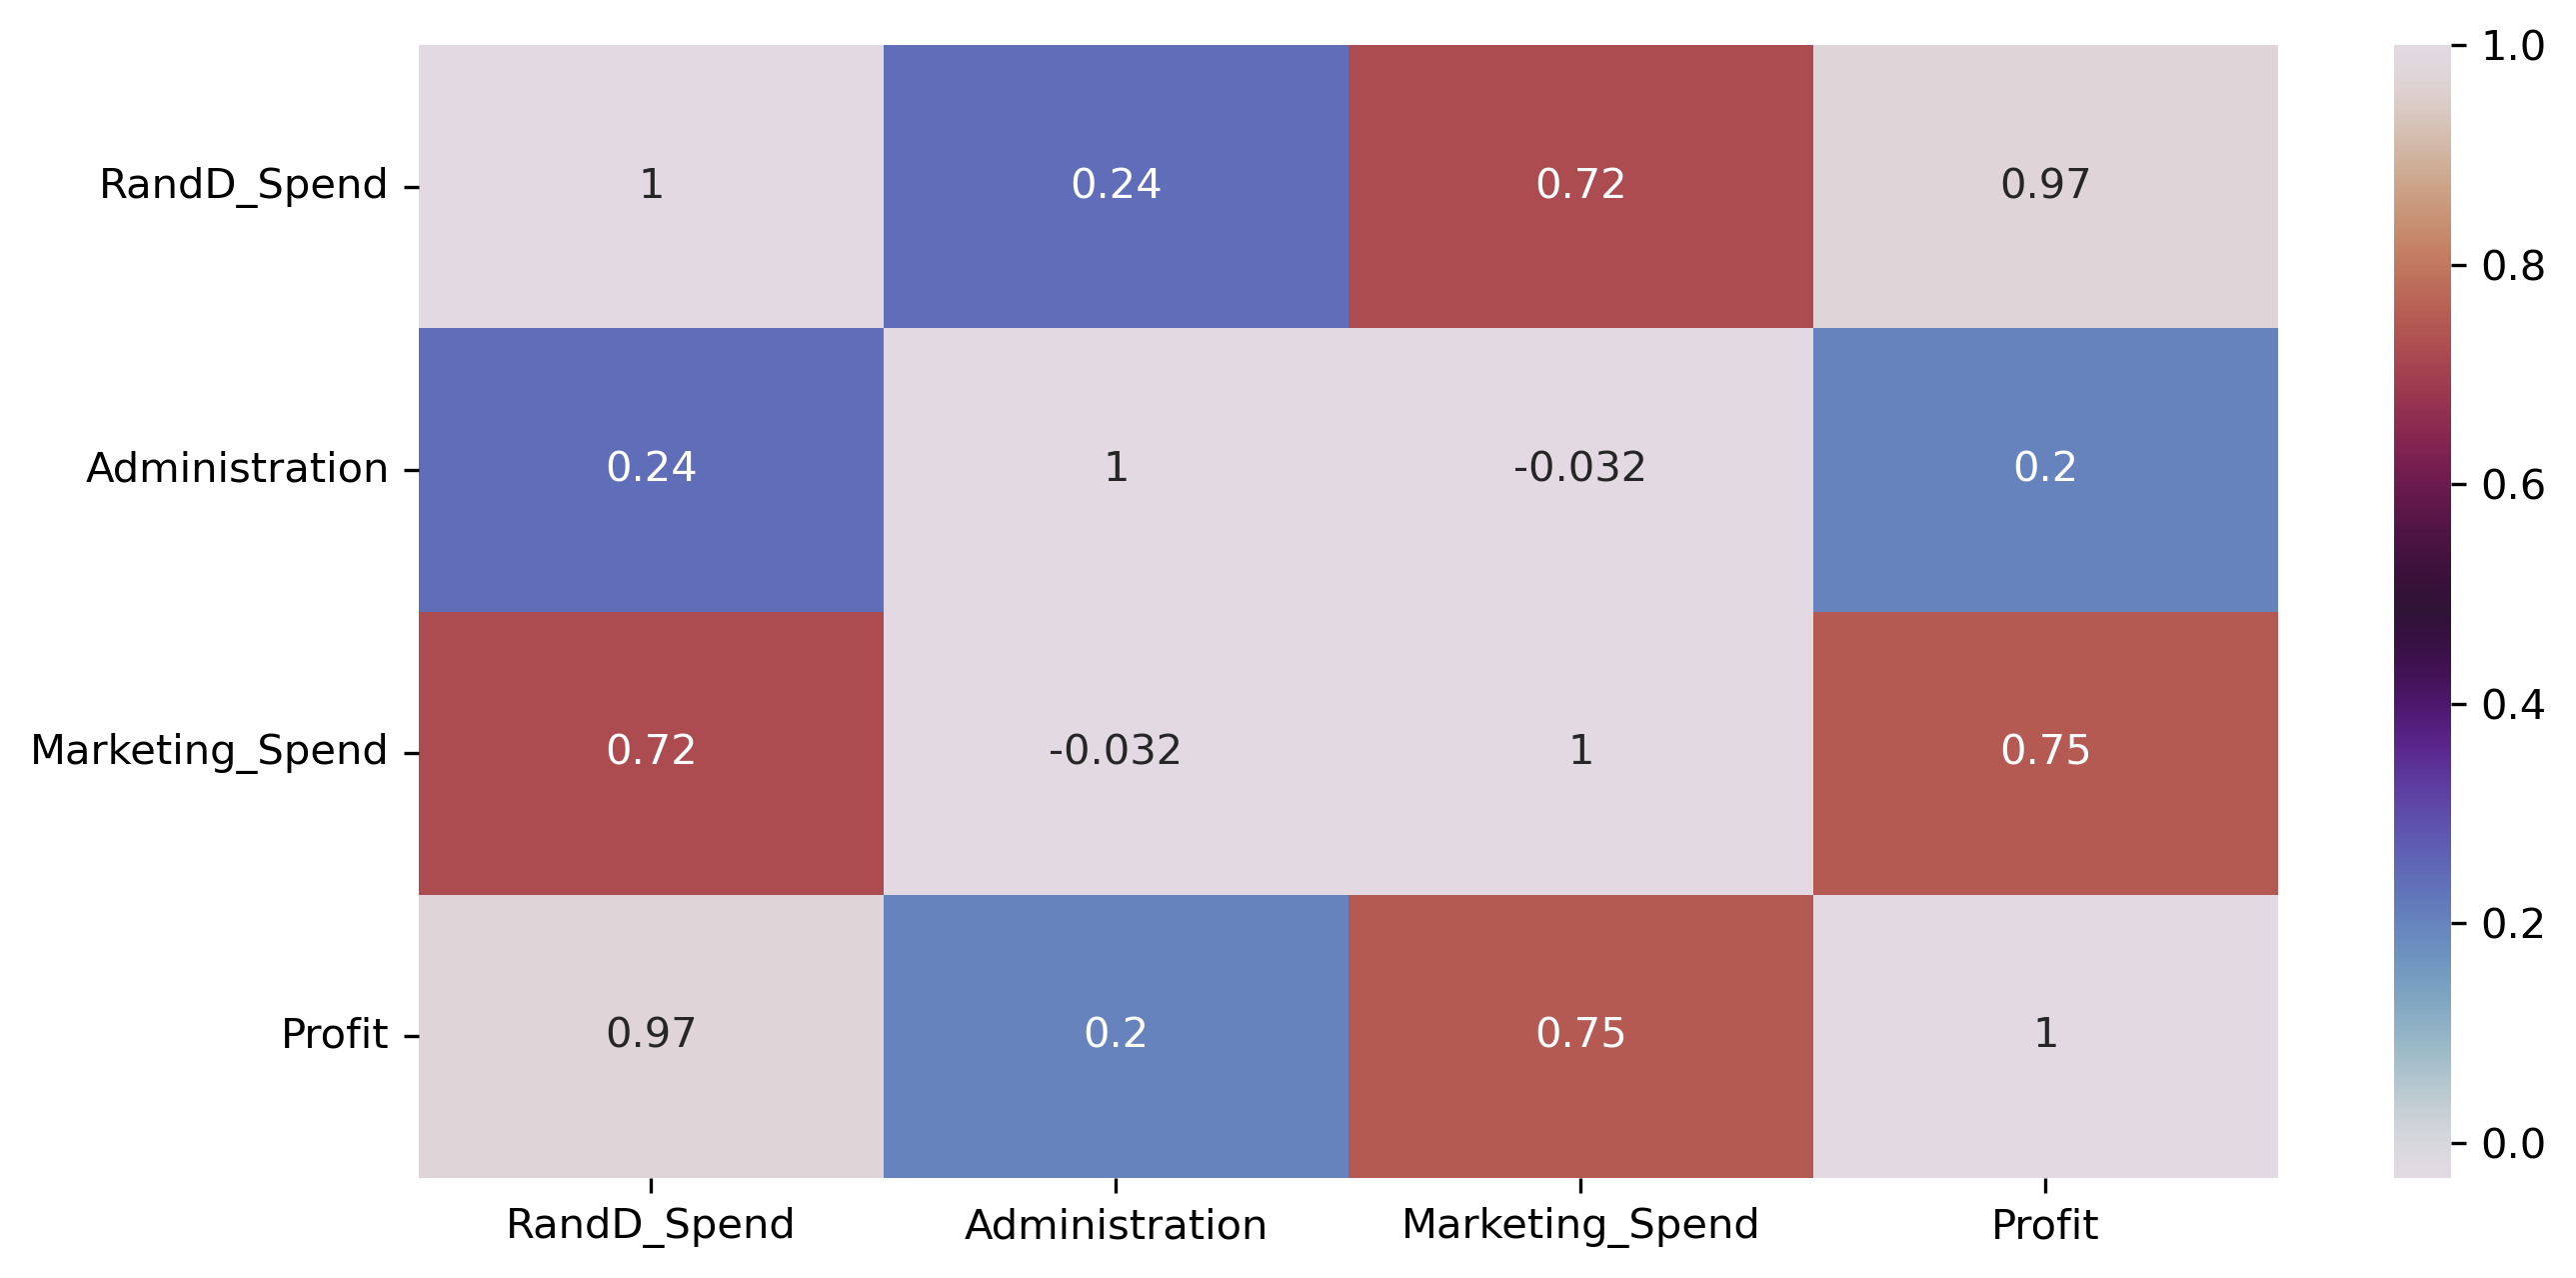

In [11]:
sns.heatmap(df.corr(),annot = True,cmap= 'twilight')

# Preparing a Model

In [12]:
# Build model

import statsmodels.formula.api as smf

model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data = df).fit()
model.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [13]:
#model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        09:09:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cooks Distance Plot(For Detecting influencers/Outliers)

In [14]:
np.set_printoptions(suppress=True)

In [84]:
influence = model.get_influence()

In [16]:
cooks =  influence.cooks_distance

In [17]:
print(cooks[0])

[0.00003218 0.00327591 0.03238427 0.02172066 0.0144833  0.01171585
 0.00291766 0.00356513 0.00004043 0.00486758 0.01510648 0.0163565
 0.01155166 0.00401423 0.06129343 0.03400134 0.00833556 0.00330534
 0.00216819 0.04074406 0.00042514 0.01098444 0.00291768 0.00027603
 0.00504644 0.00300075 0.00341957 0.02983964 0.00131591 0.00012599
 0.00004185 0.00000927 0.00070866 0.00012812 0.0209815  0.00669509
 0.05553147 0.00006551 0.05615473 0.0015428  0.00184851 0.00197578
 0.00013609 0.02055532 0.00012316 0.09032342 0.05453034 0.00533886
 0.19052744 0.28808229]


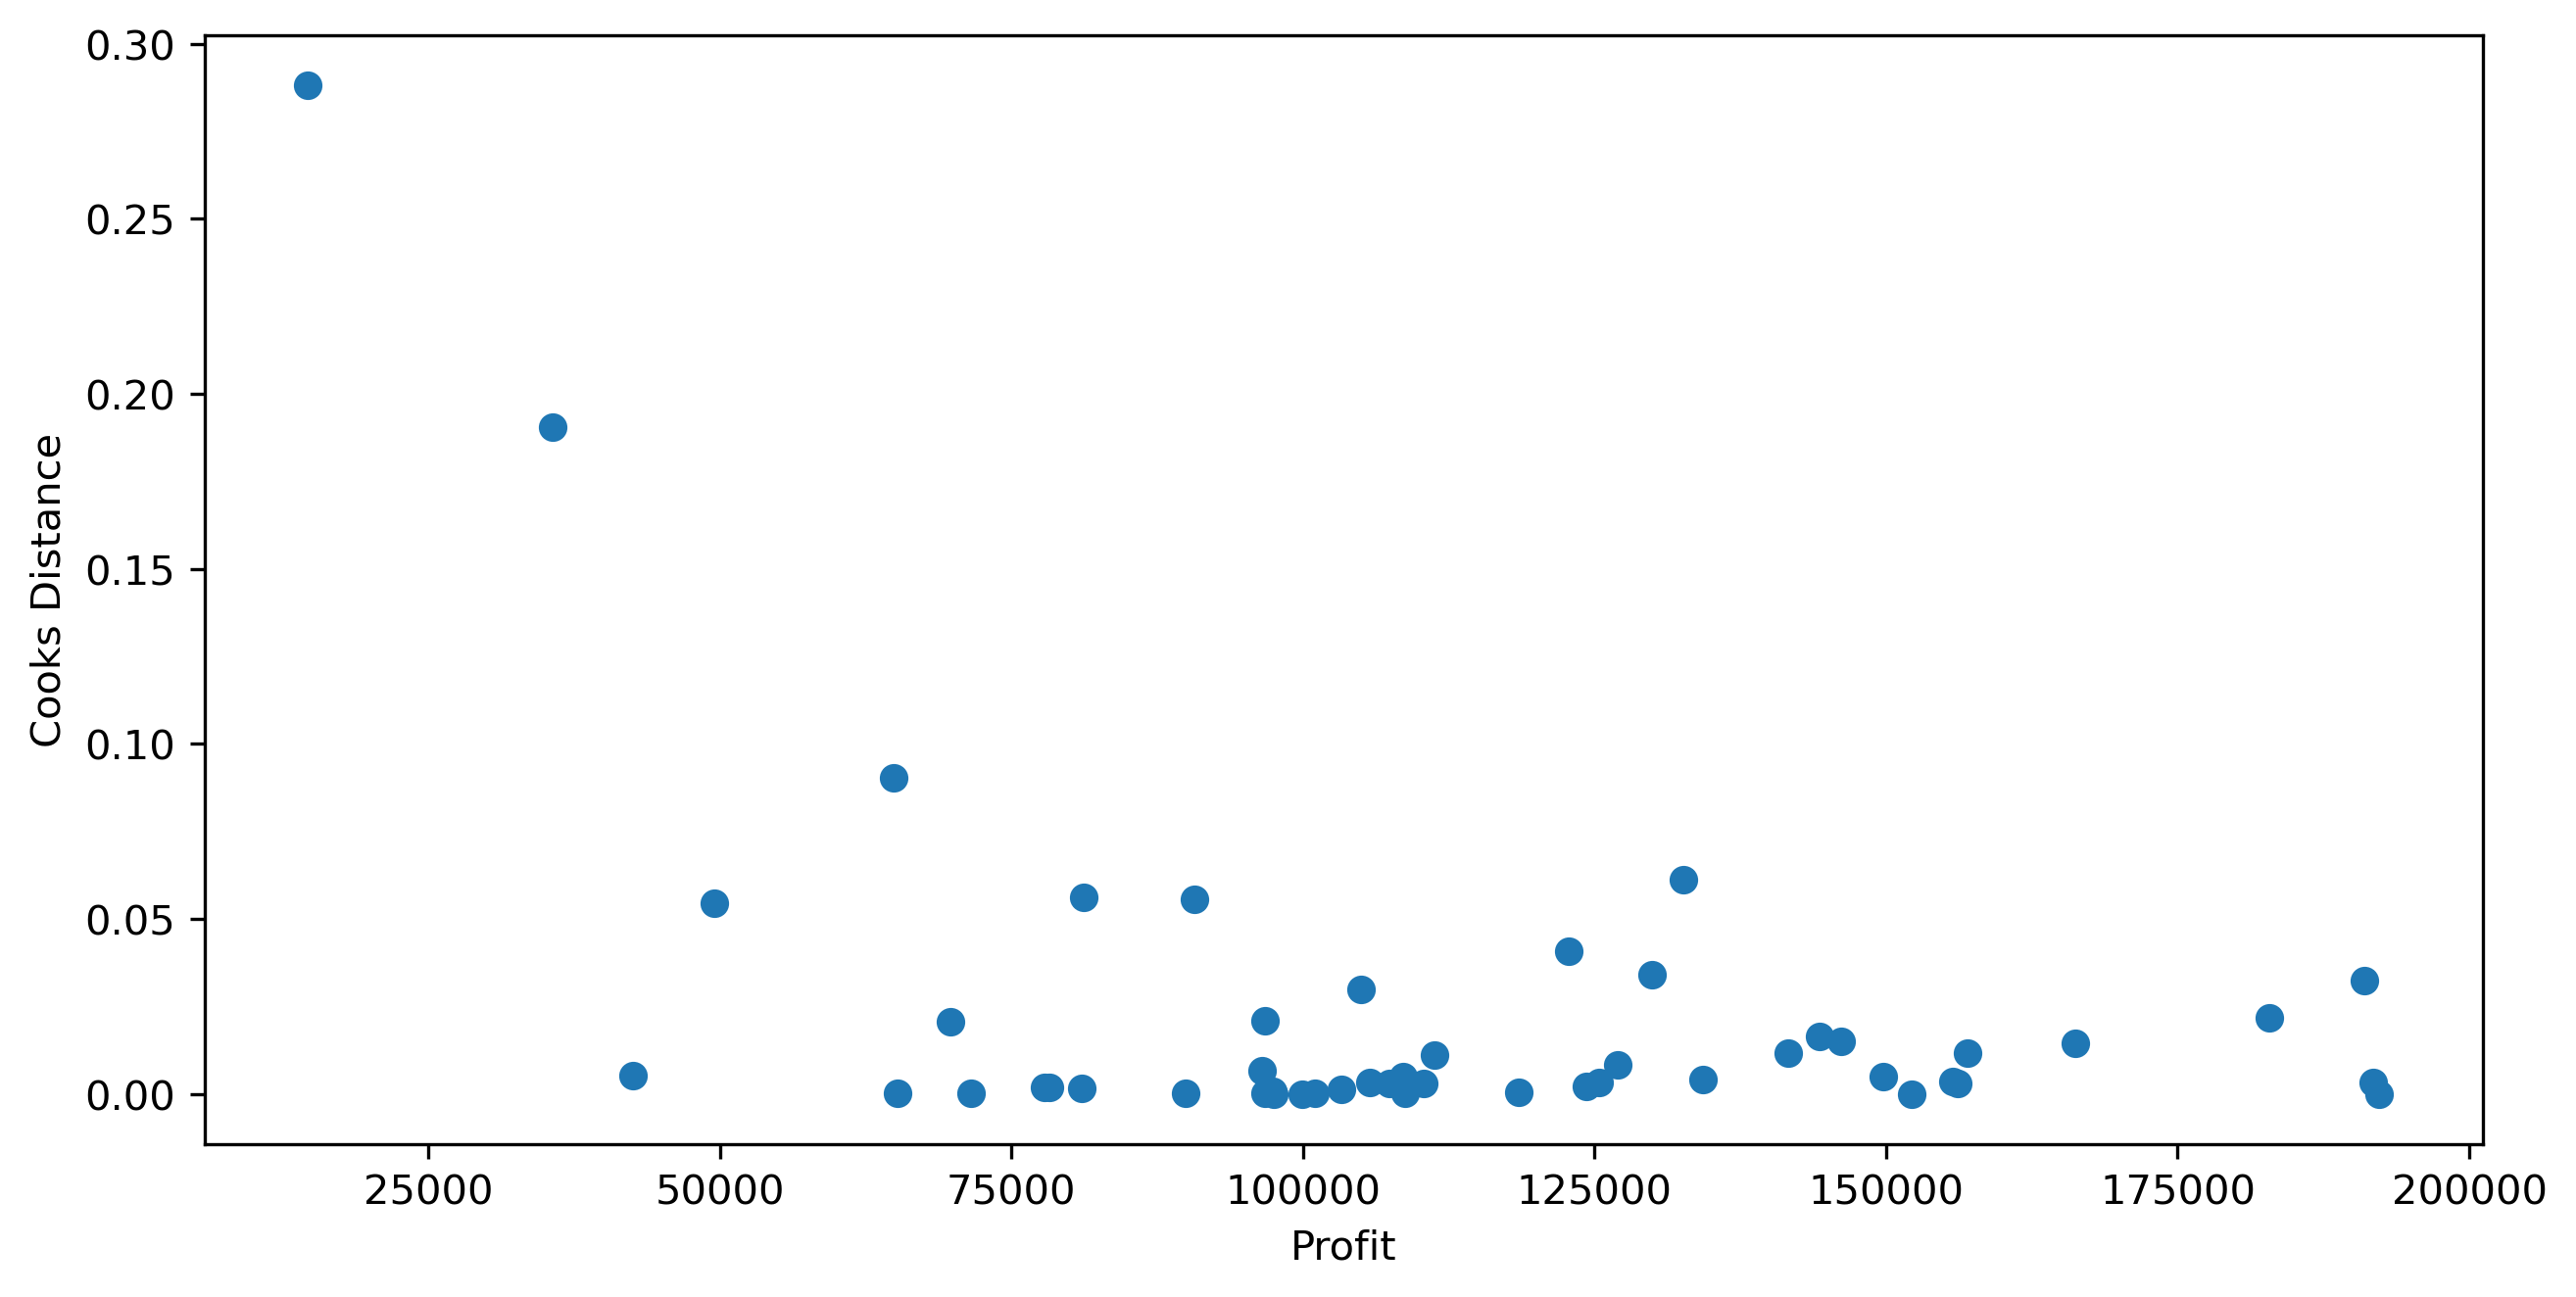

In [18]:
plt.scatter(df.Profit,cooks[0])
plt.xlabel('Profit')
plt.ylabel('Cooks Distance')
plt.show()

In [19]:
np.argmax(cooks[0]),np.max(cooks[0])

(49, 0.28808229275432634)

In [20]:
df[df.index.isin([49])]

RandD_Spend  Administration  Marketing_Spend       State   Profit
49          0.0        116983.8         45173.06  California  14681.4

In [21]:
model.rsquared

0.9507459940683246

* Here R-squared Accuracy is 95%.

* Based on p-value and alpha value, Here RandD_Spend column contributing target column but Administration and Marketing_Spend columns are not contributing target column.

* So, build models seperately for Administration and Marketing_Spend columns.

## High Influence plots(Calculating leverage_cutoff value)

* Points beyond leverage_cutoff value are influencers

In [93]:
from statsmodels.graphics.regressionplots import influence_plot

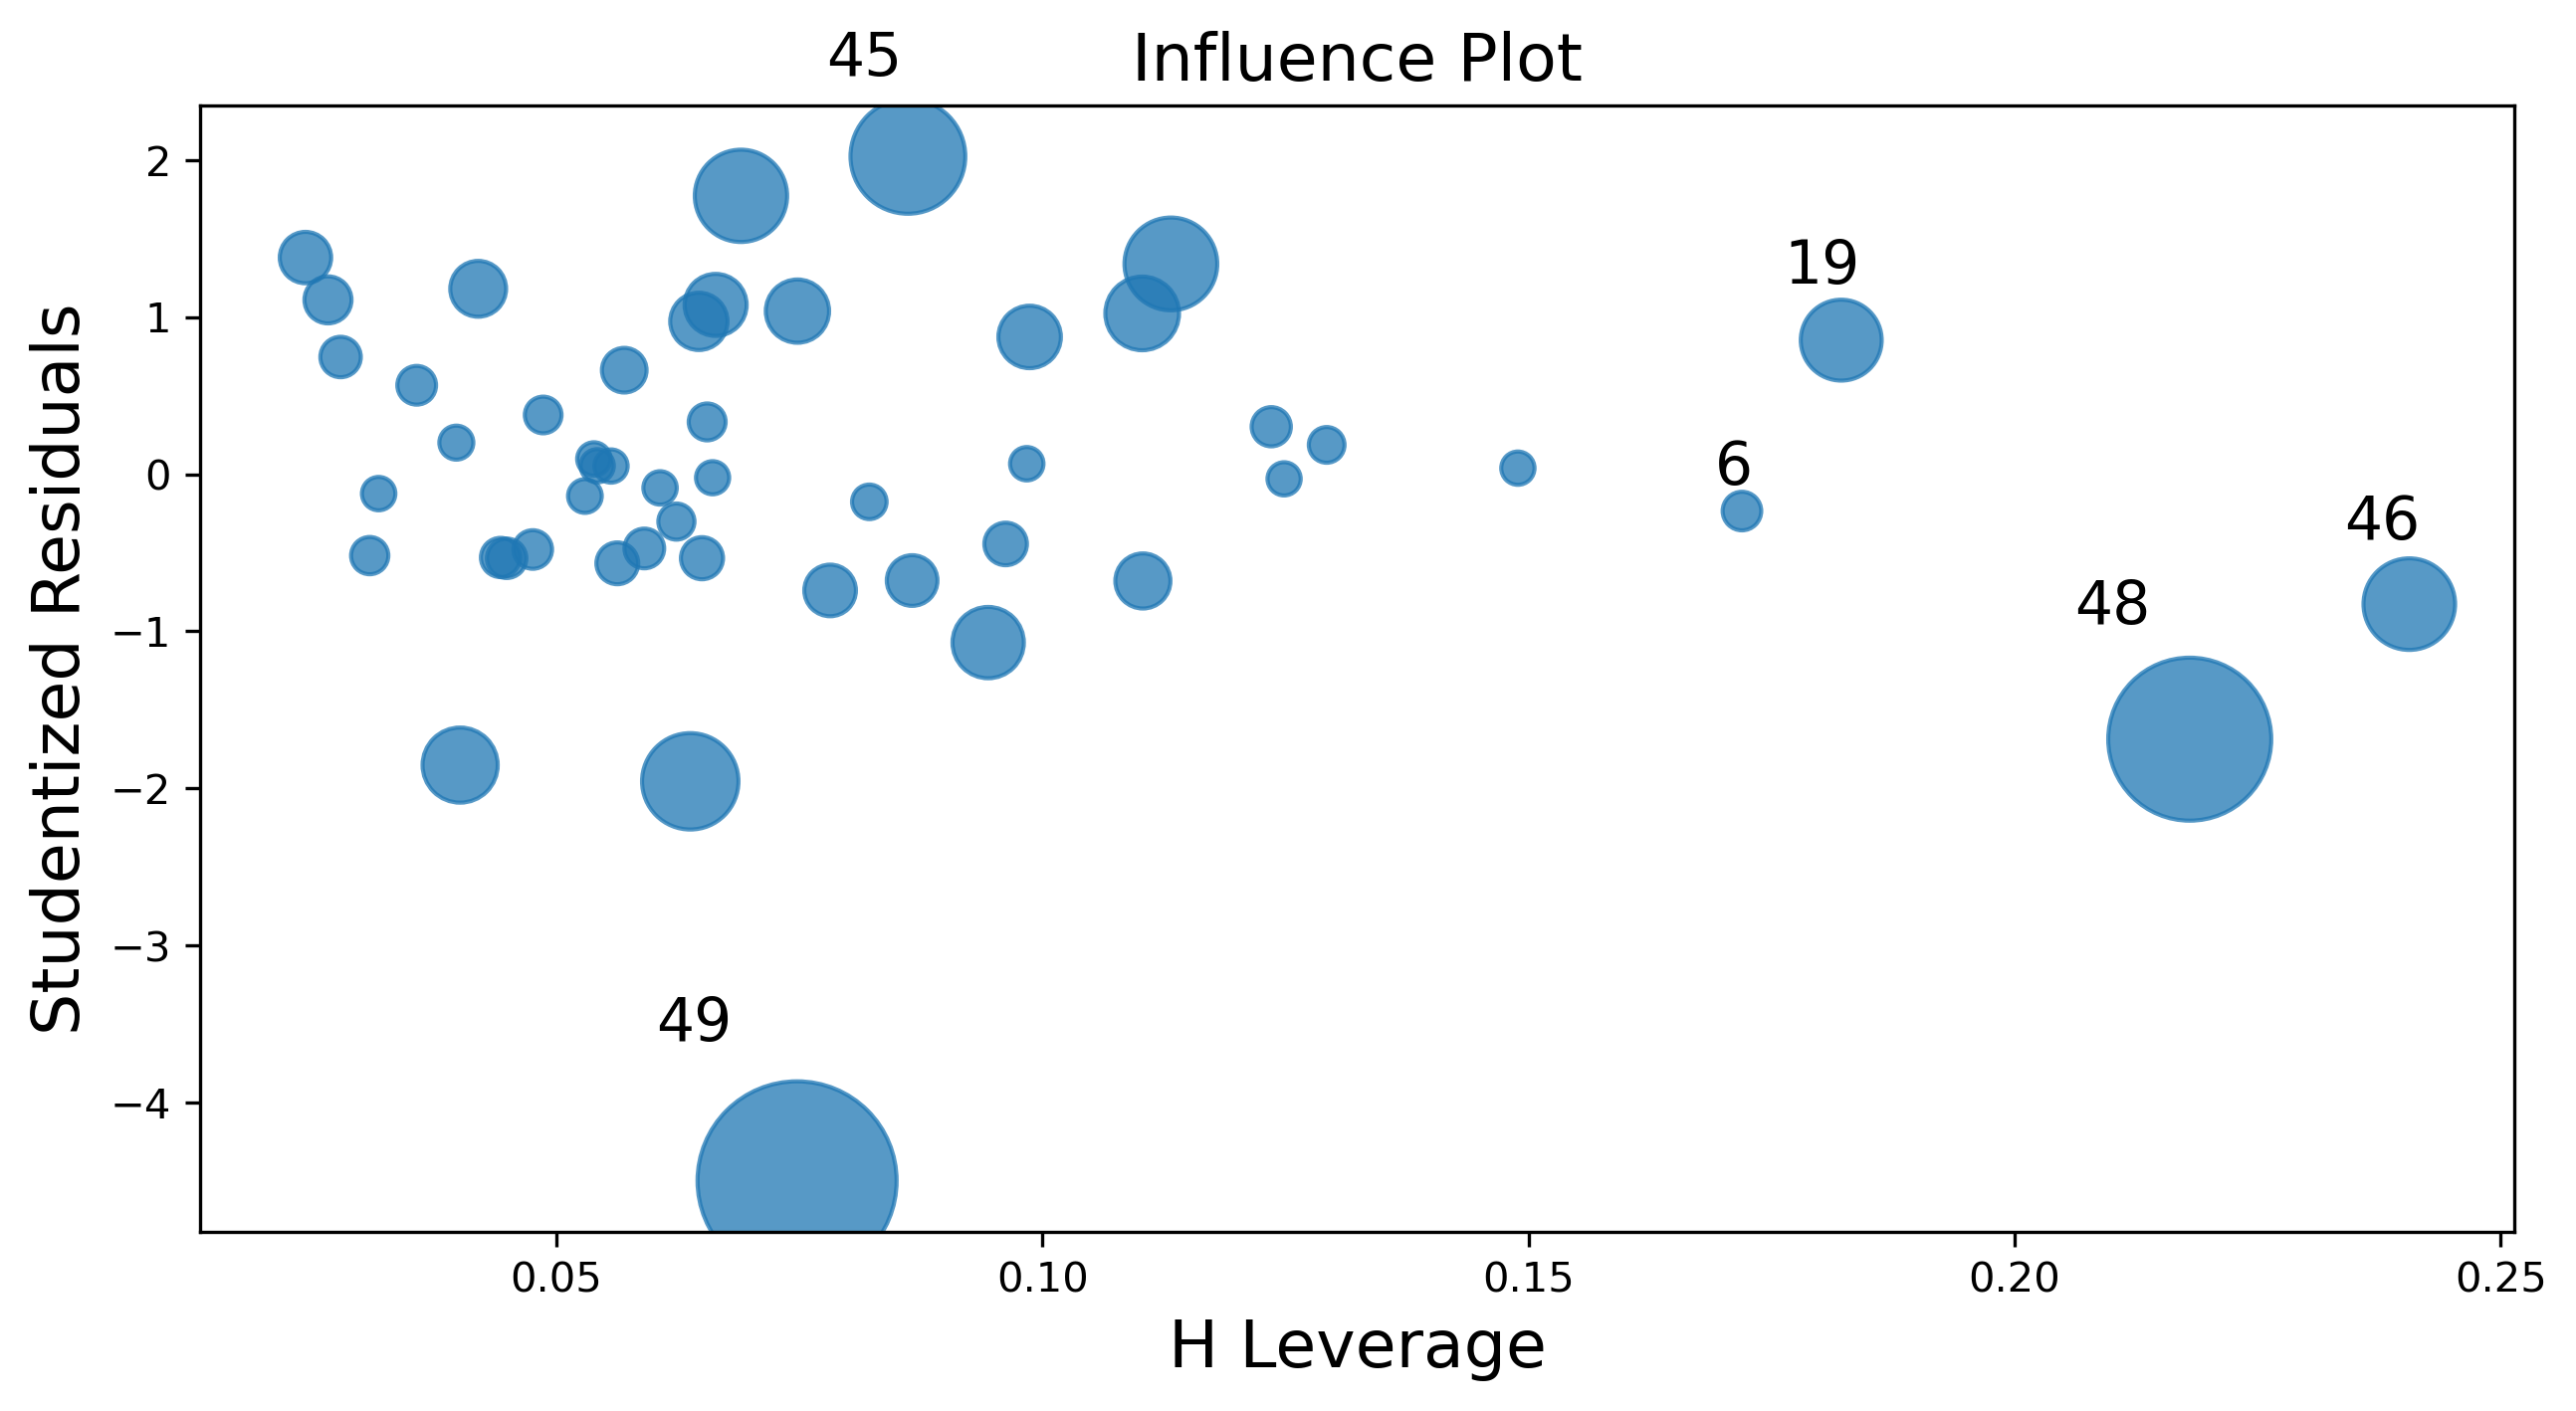

In [94]:
influence_plot(model)
plt.show()

In [95]:
#Leverage cutoff value

k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

## Test for Normality of residuals

In [69]:
import pylab
import scipy.stats as stats

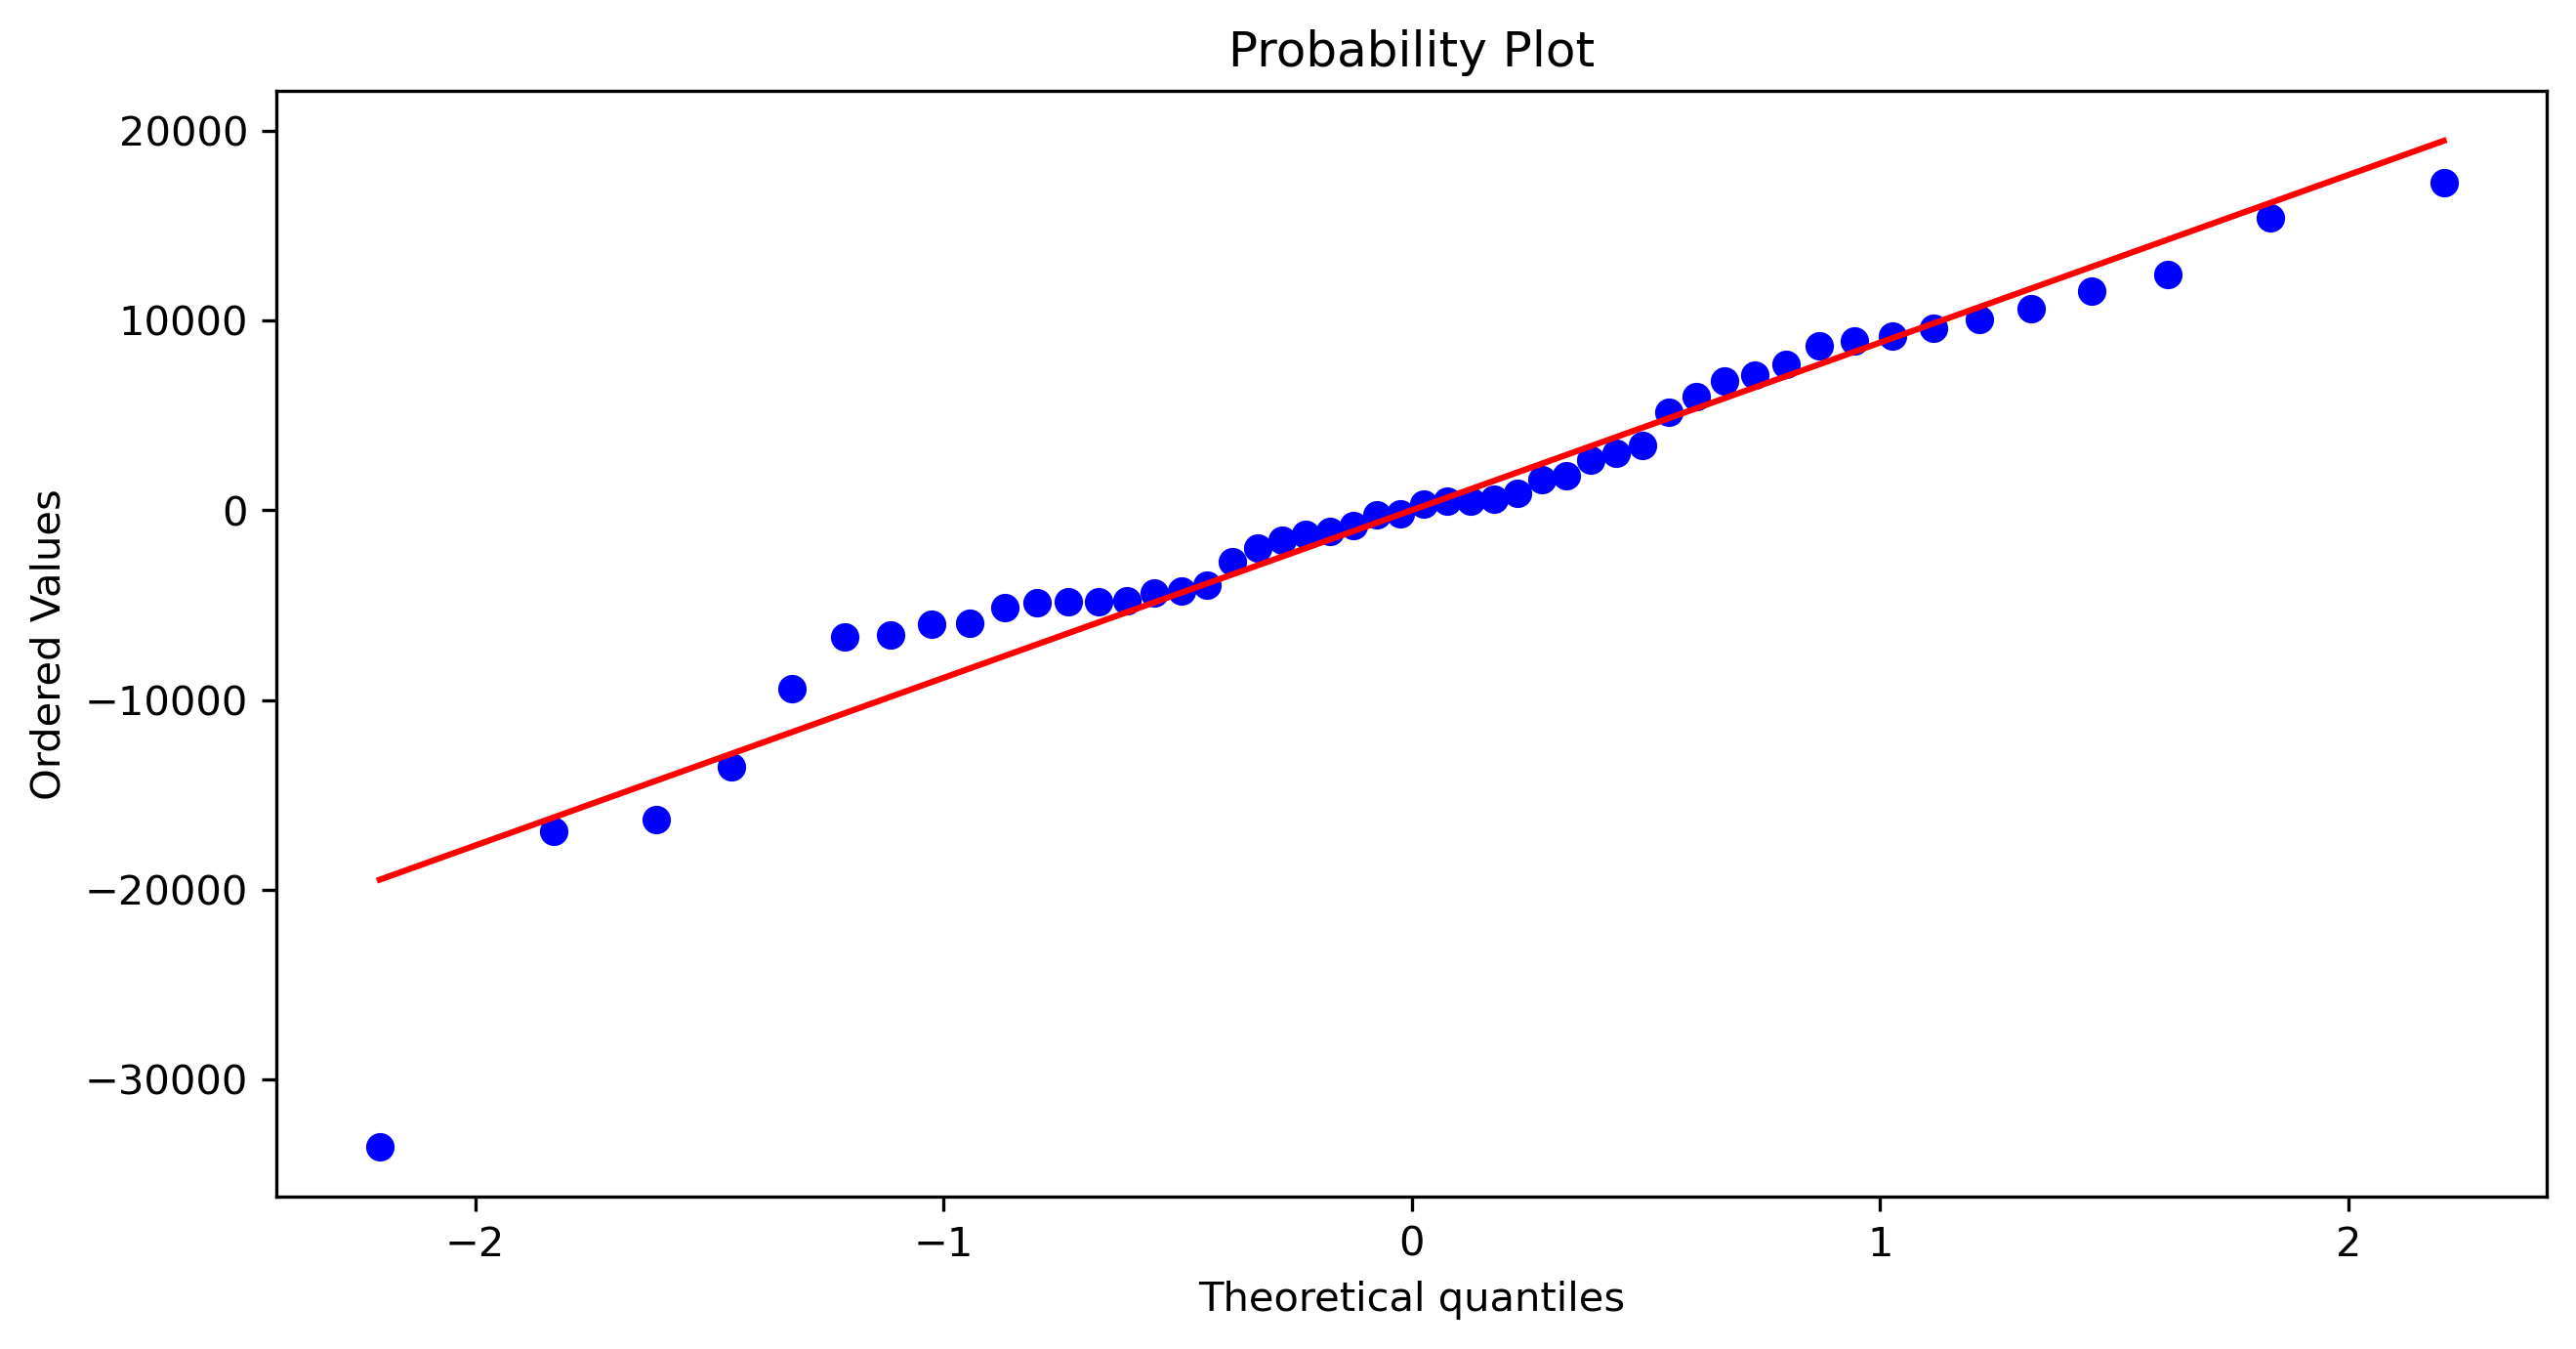

In [73]:
stats.probplot(model.resid,dist = 'norm',plot = pylab)
pylab.show()

In [74]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

## Residual  plot for Homoscedasticity

In [75]:
def standard_values(values) : return (values- values.mean())/values.std()

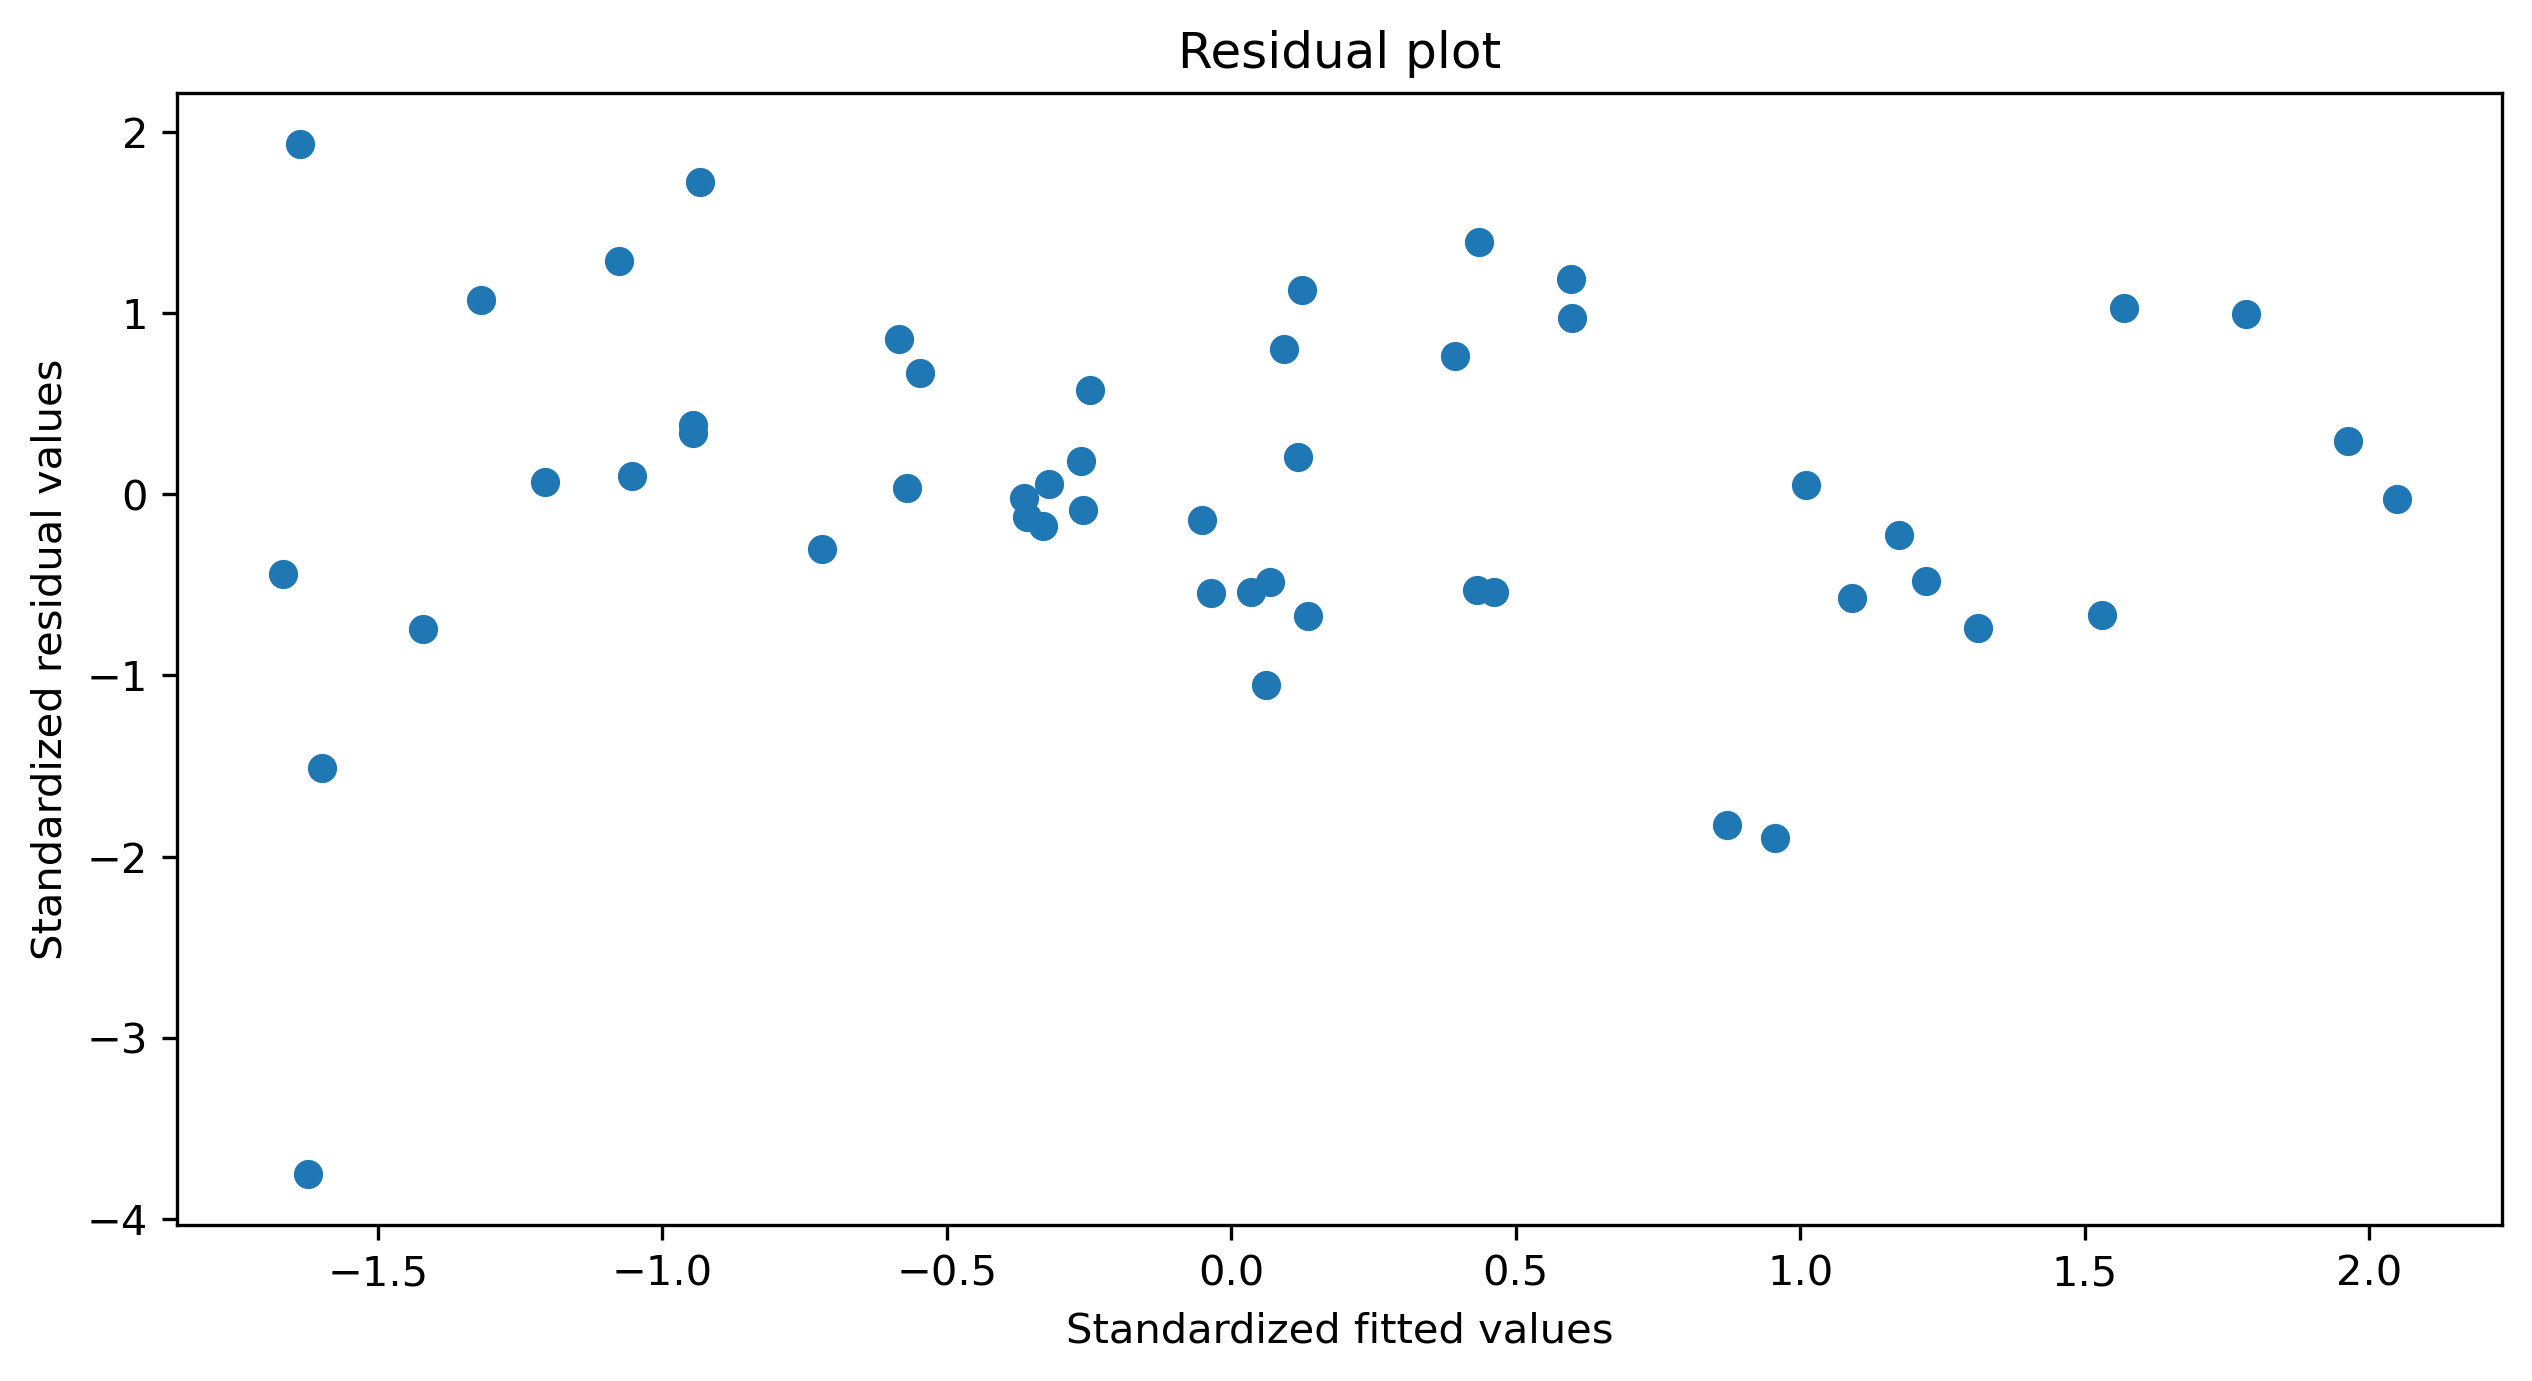

In [76]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Test for Residual vs Regression

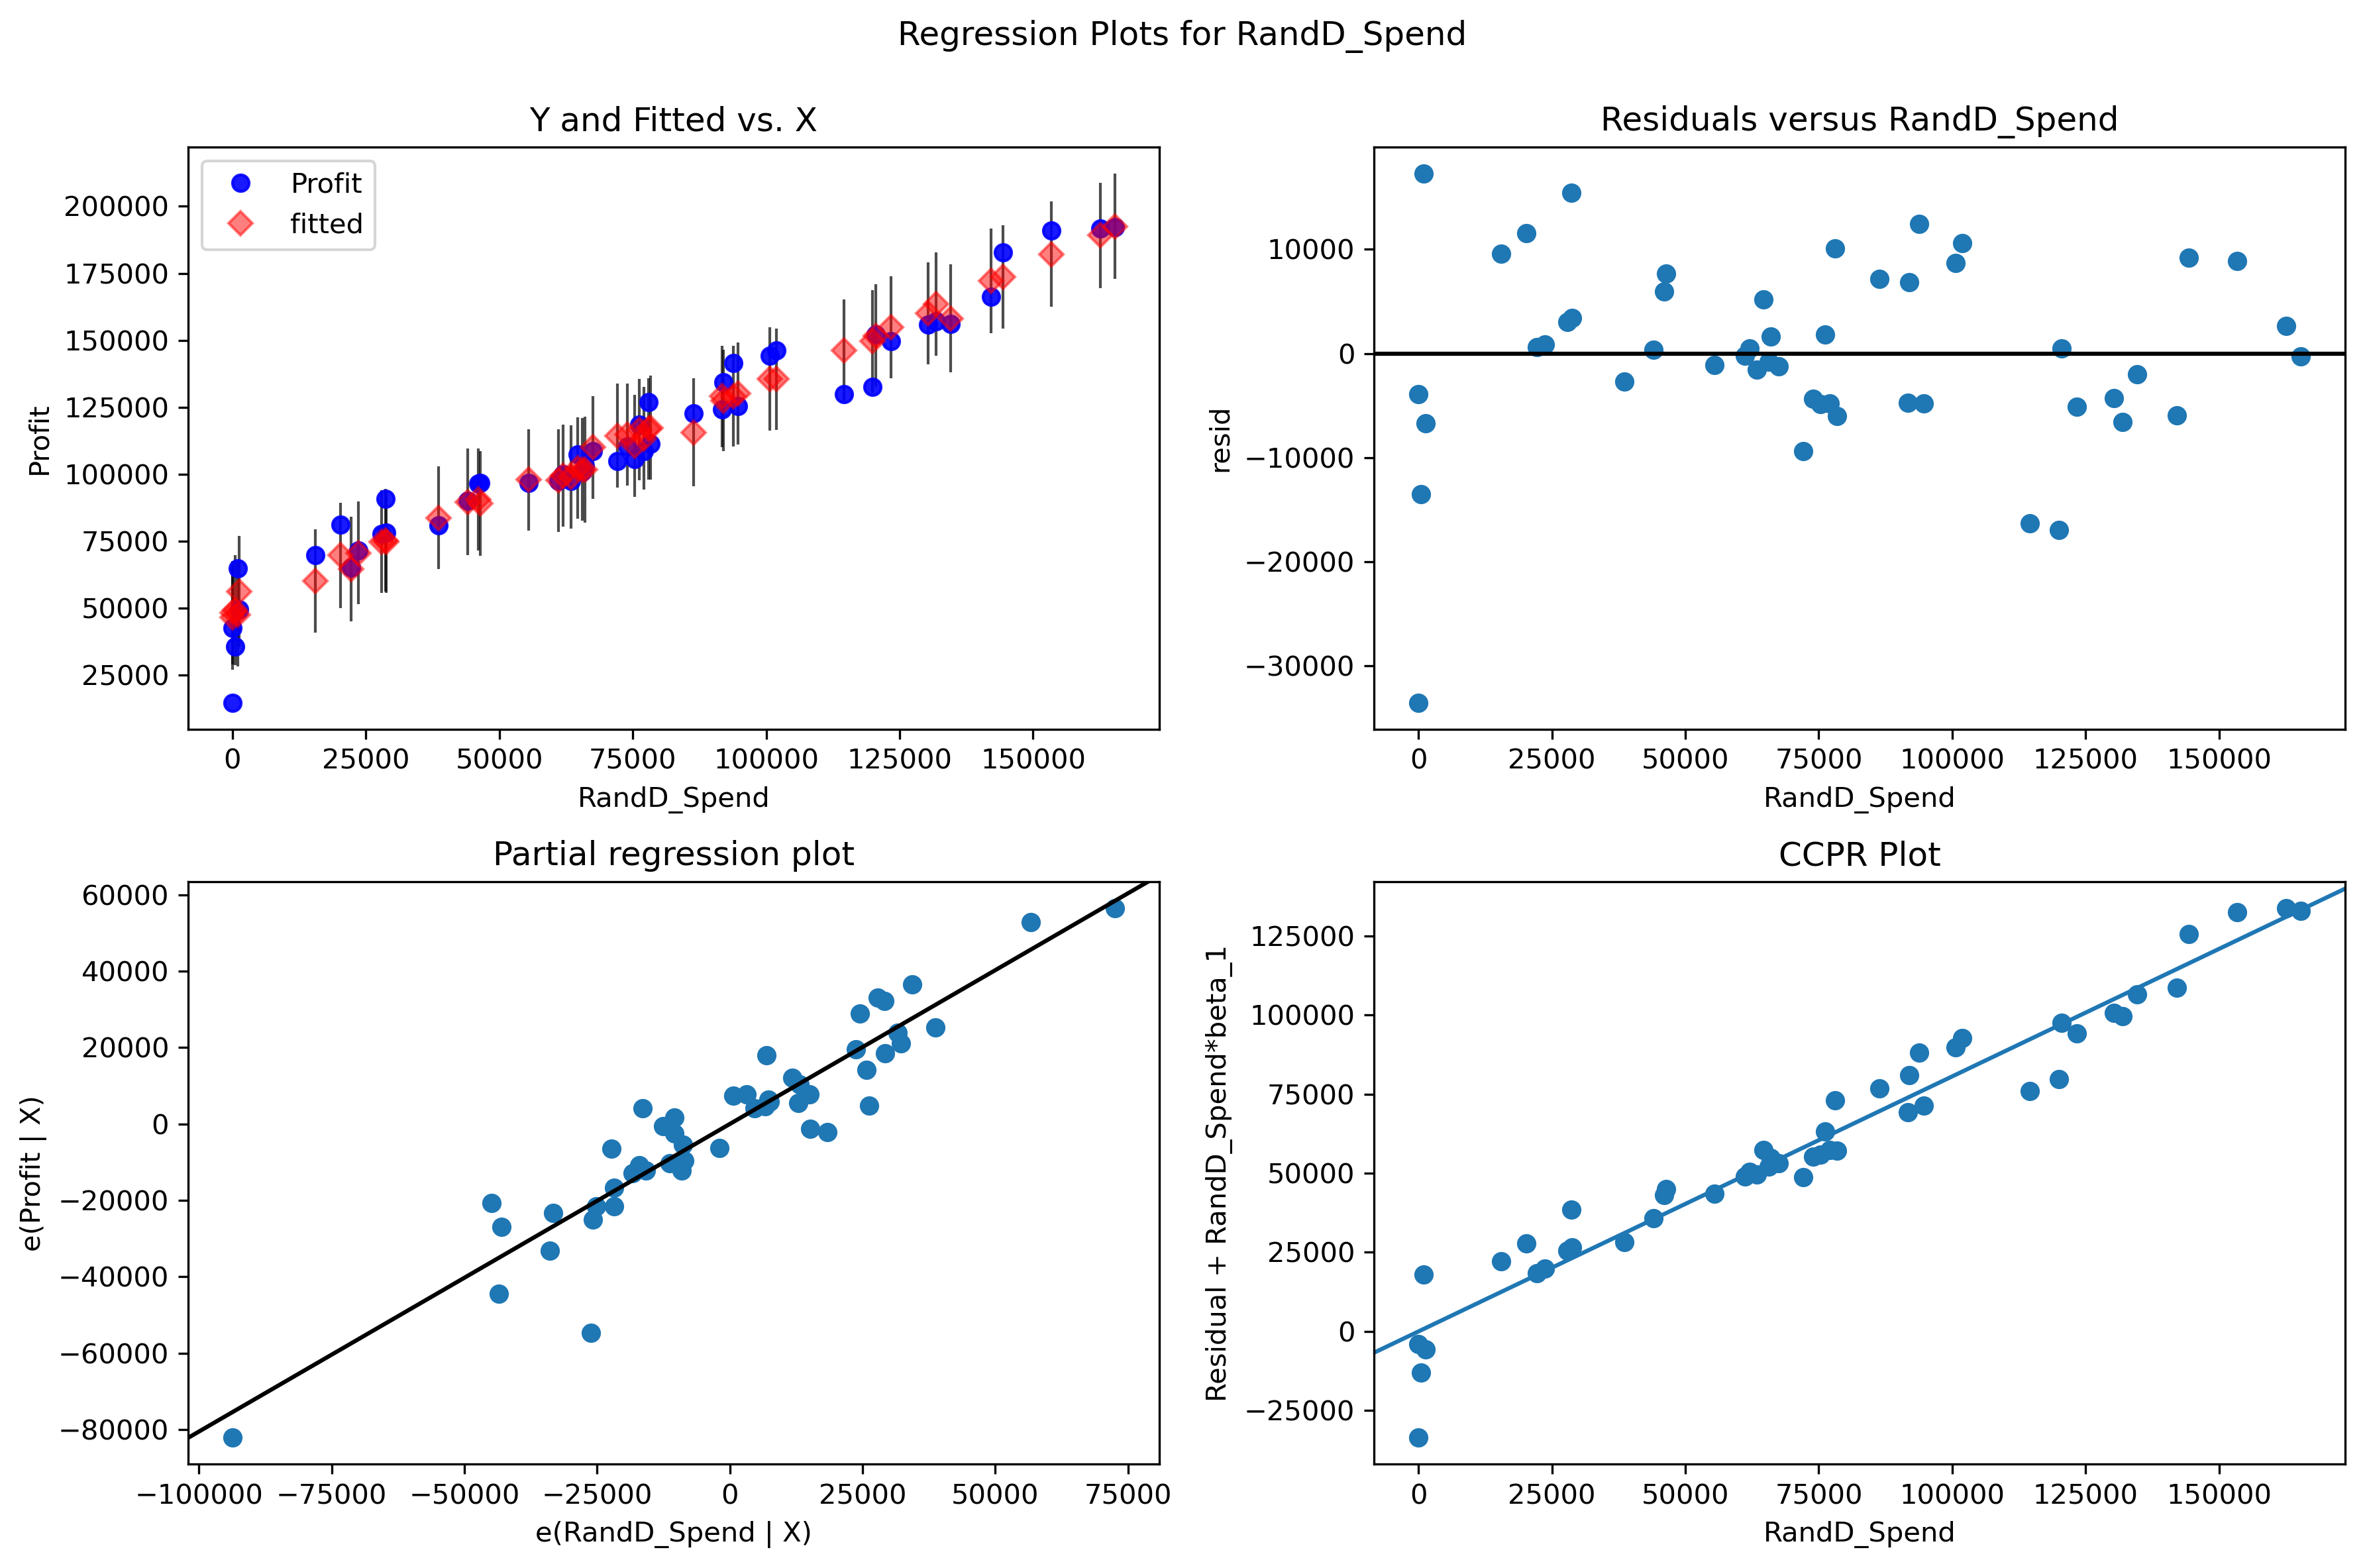

In [77]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'RandD_Spend',fig=fig)
plt.show()

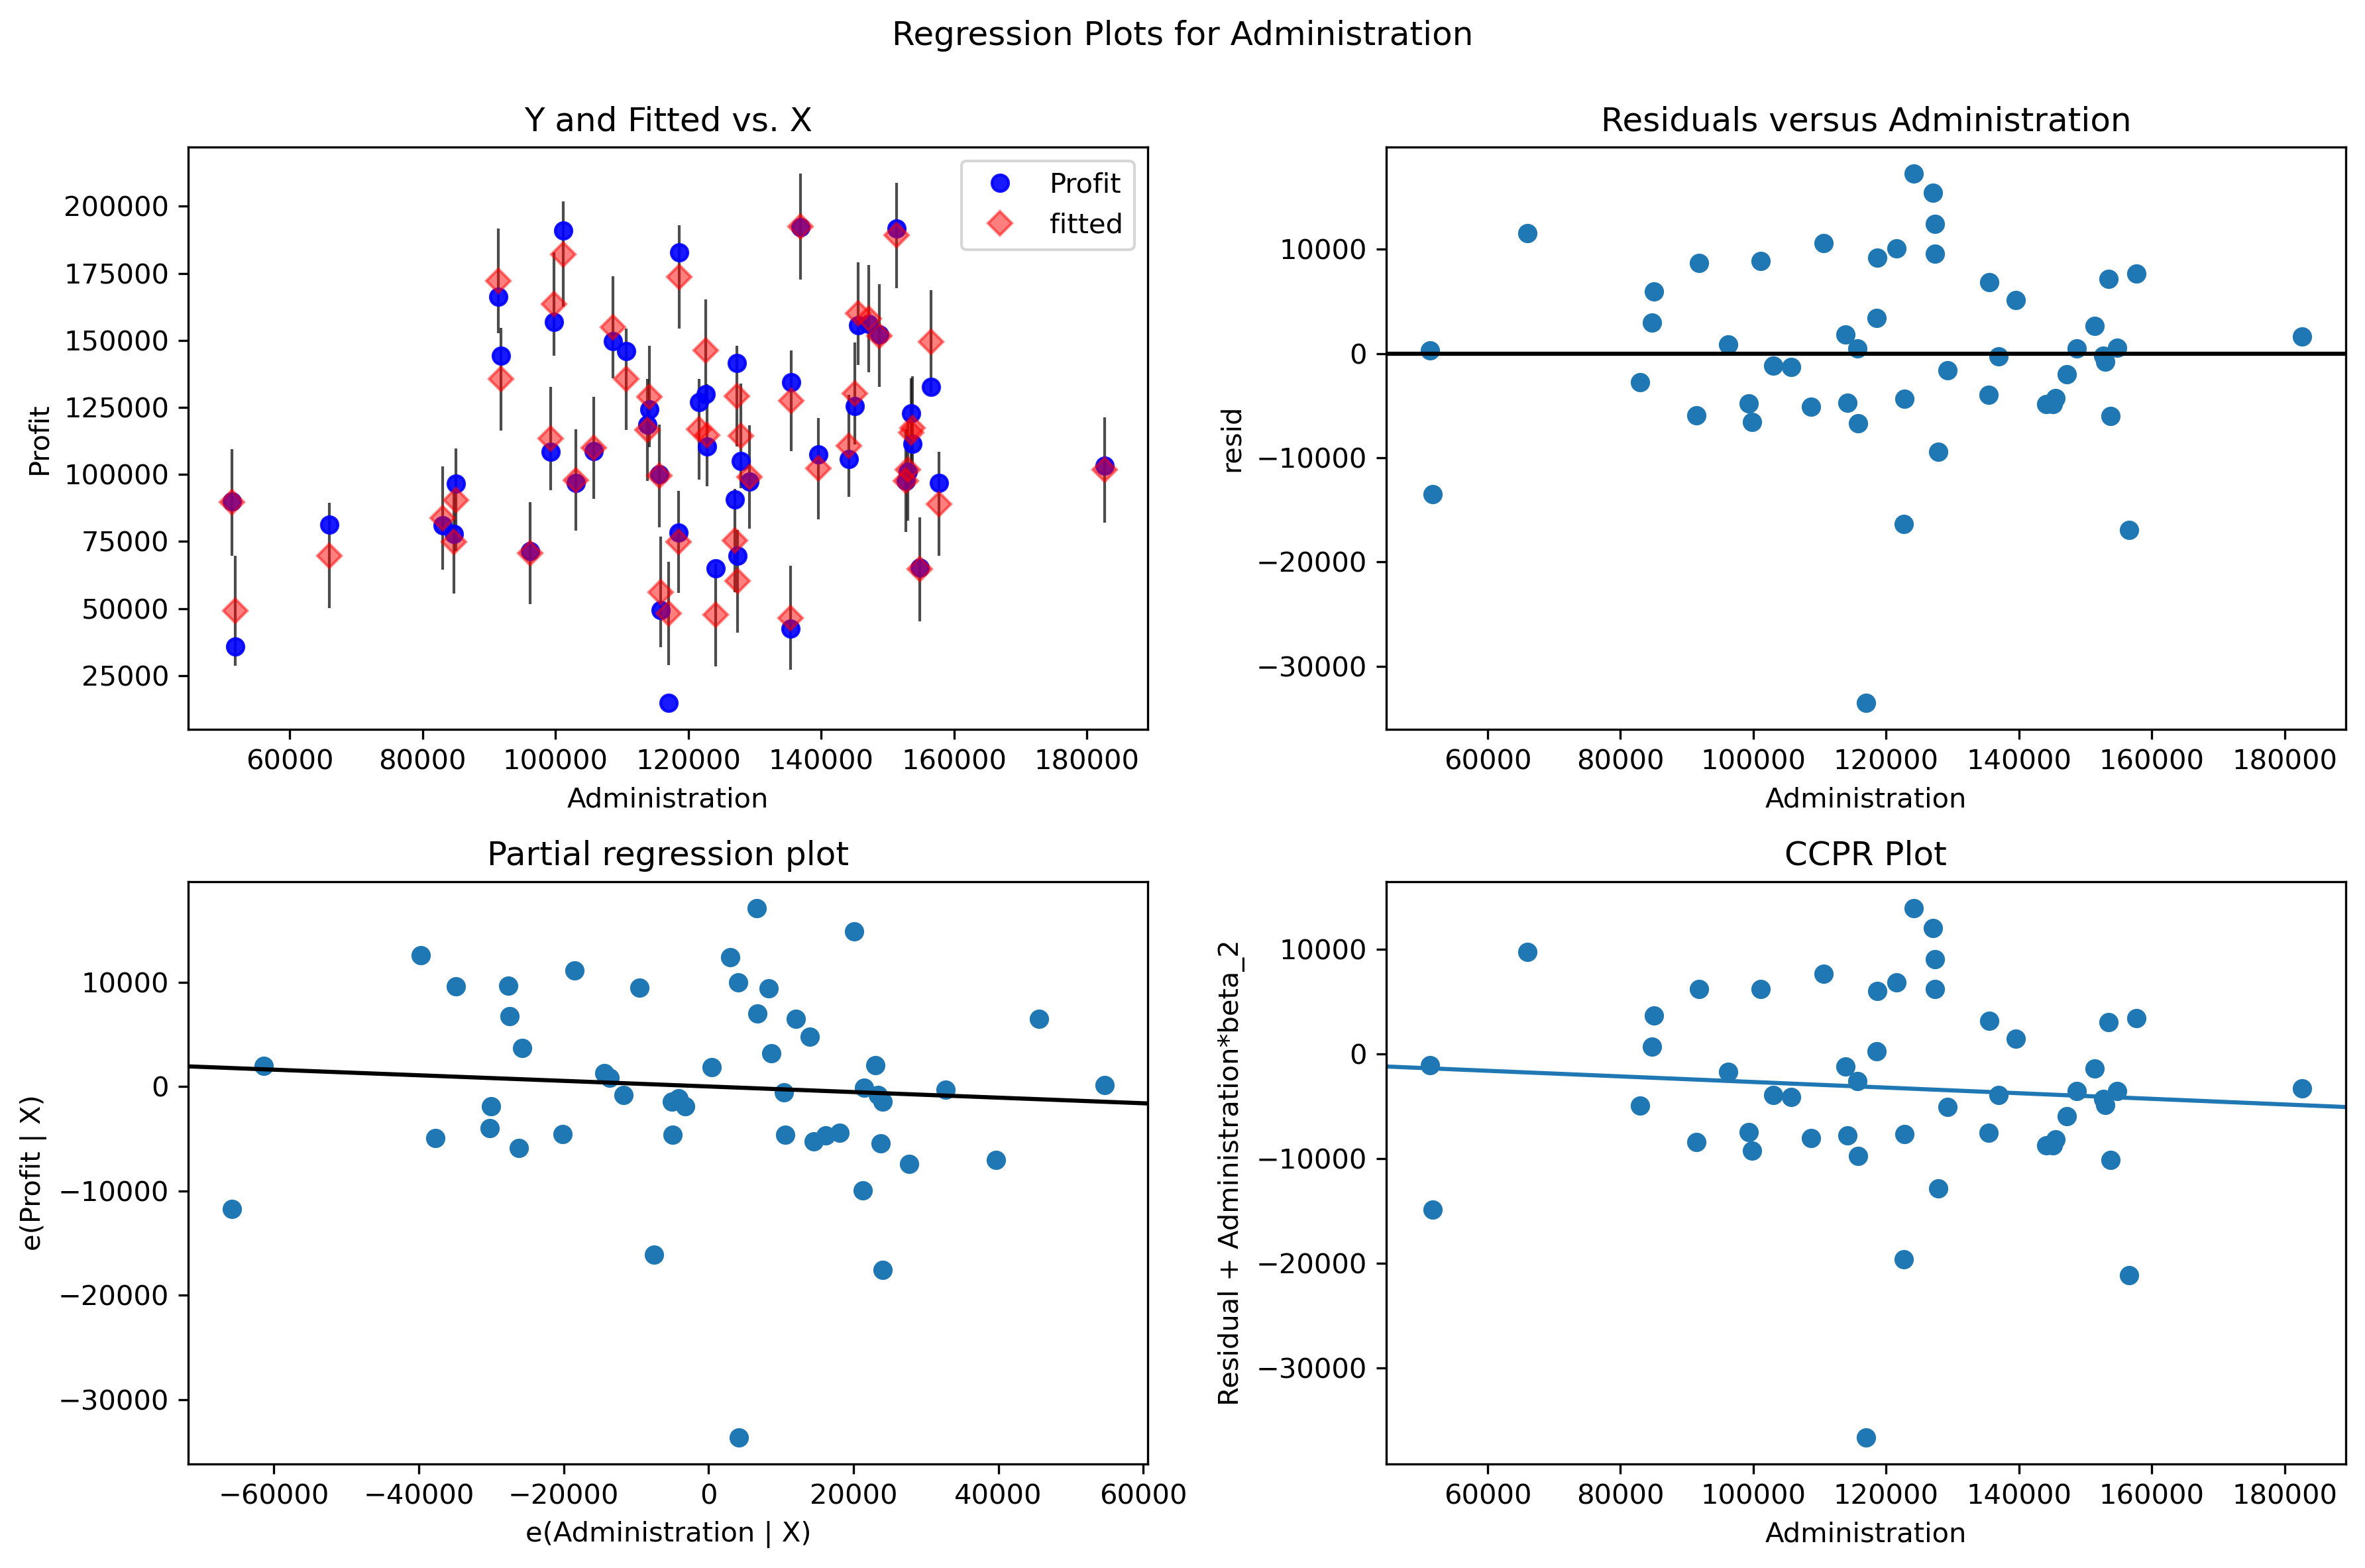

In [78]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

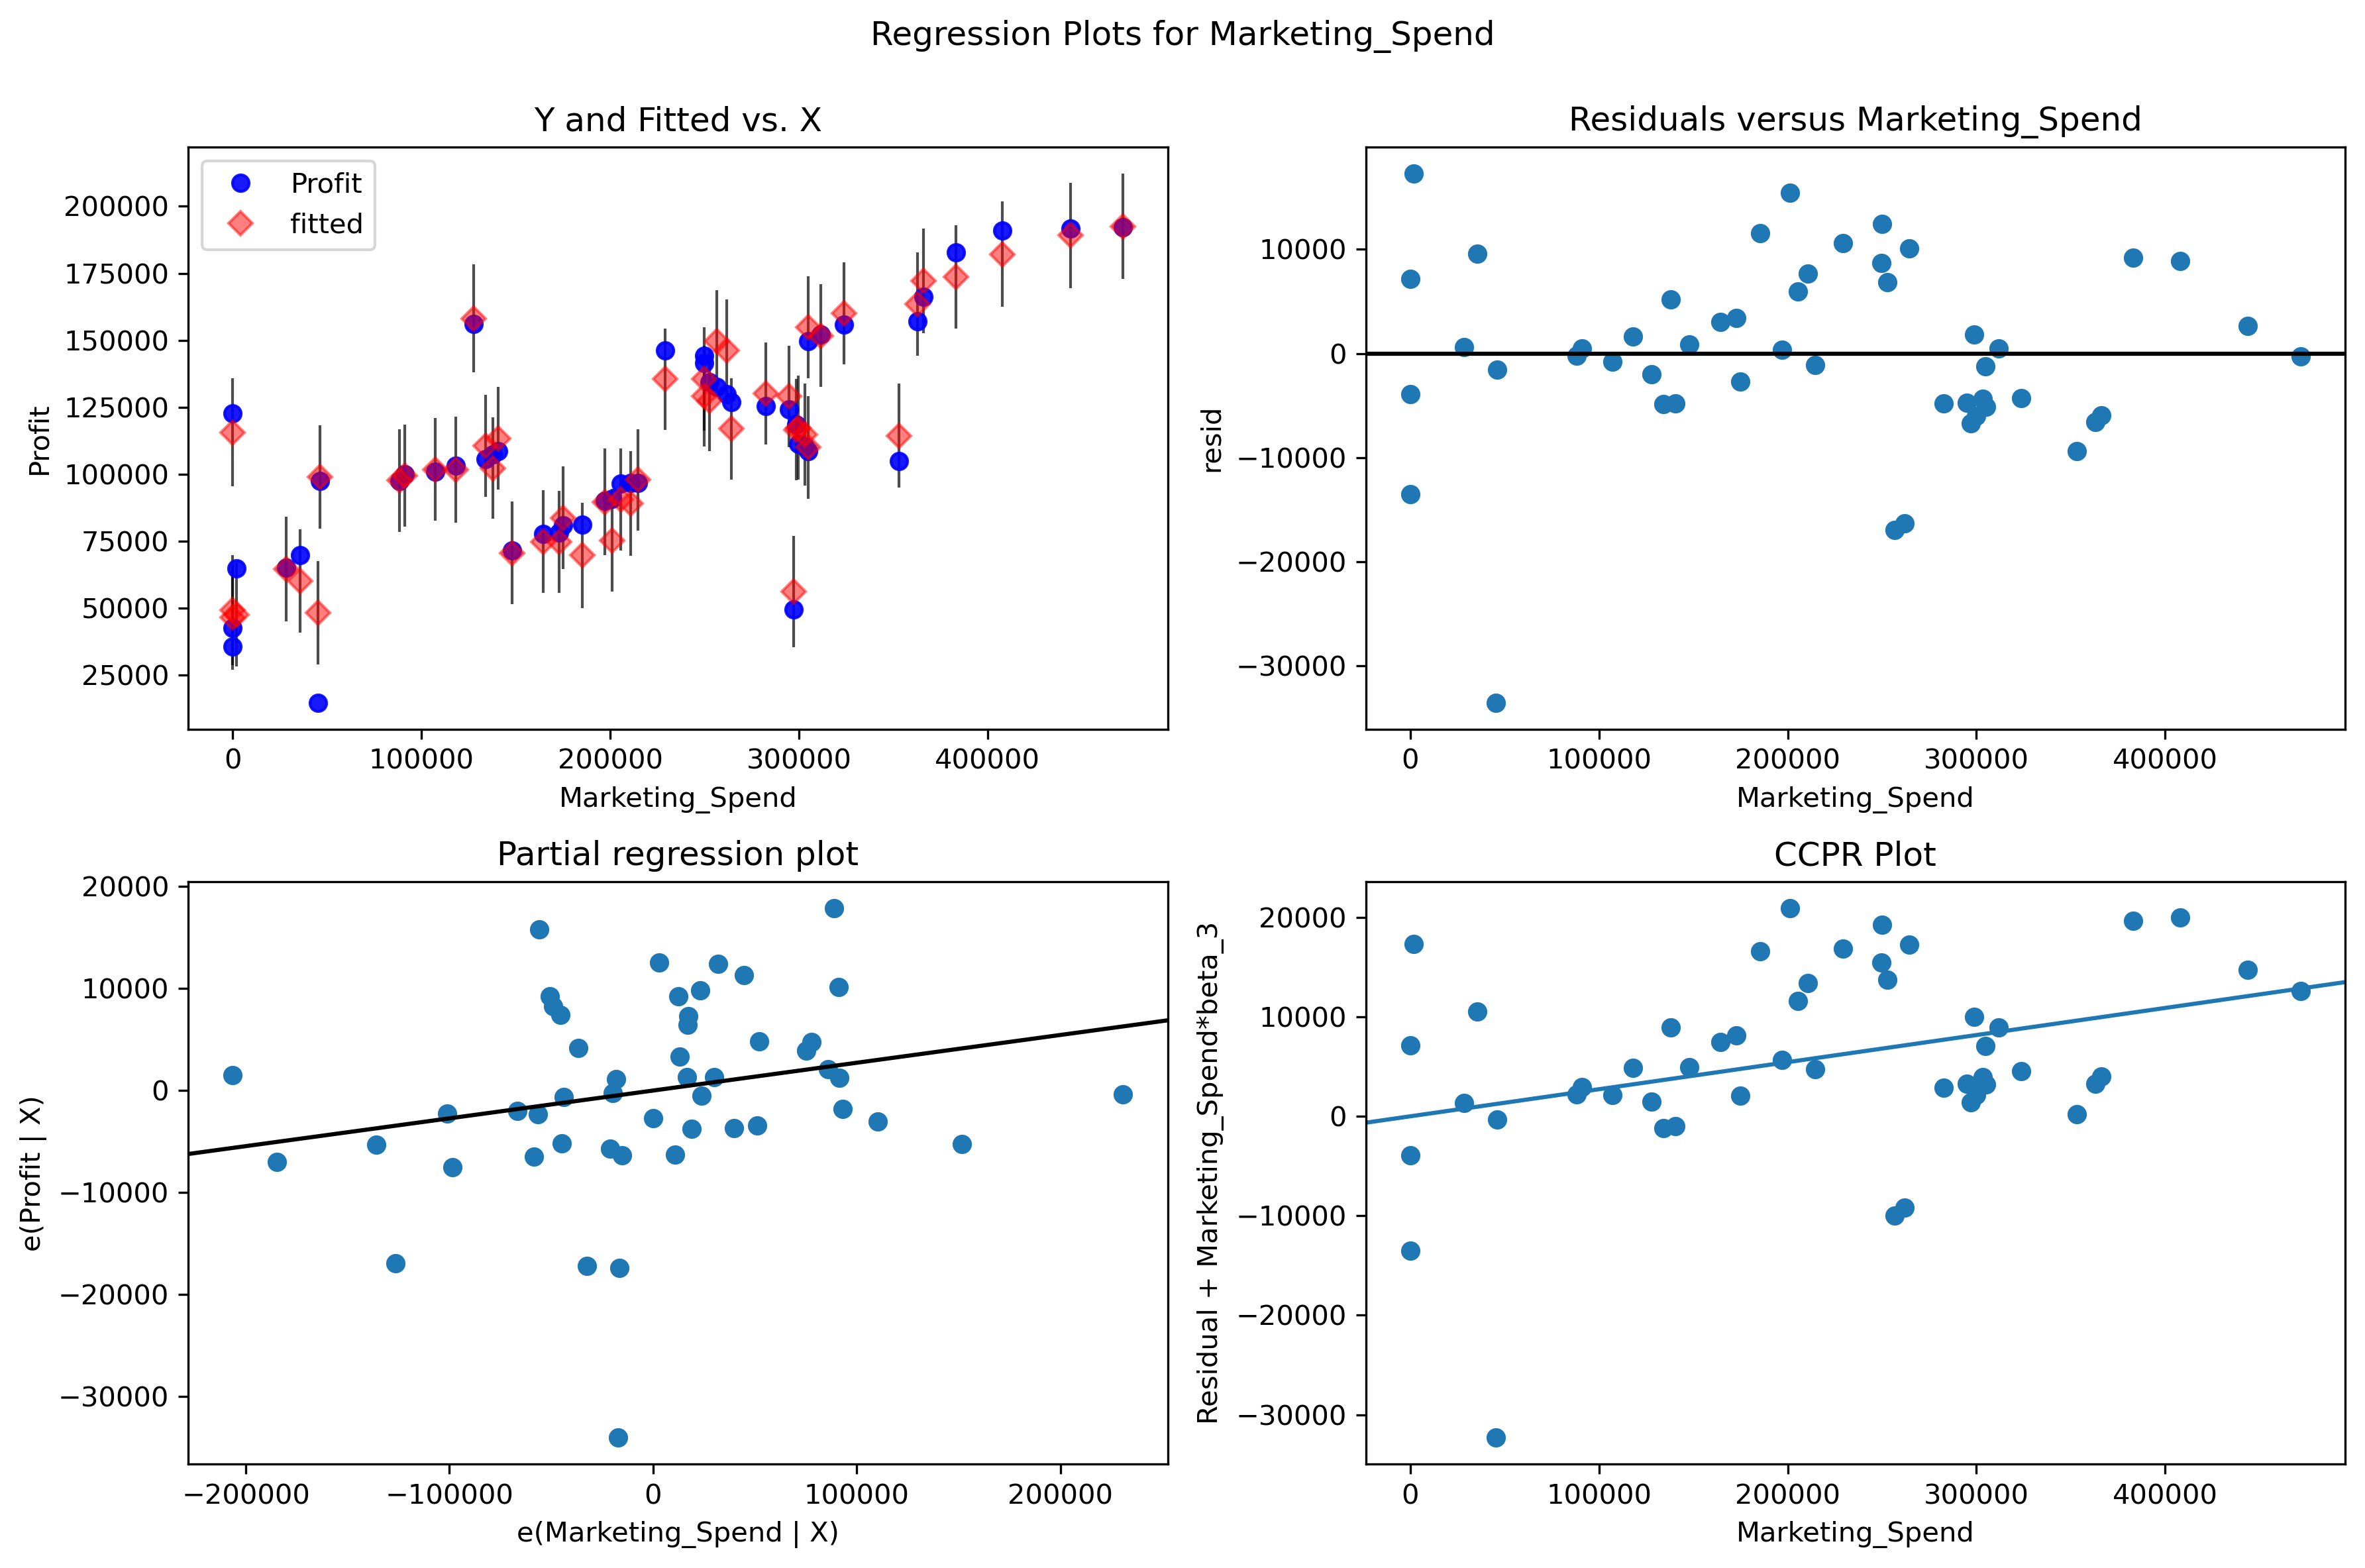

In [79]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

In [22]:
# build model for Administration column

Administration_model = smf.ols('Profit~Administration',data = df).fit()

Administration_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 27 Feb 2023   Prob (F-statistic):              0.162
Time:                        09:09:59   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
Administration_model.rsquared

0.04028714077757245

* Based on p-value and alpha value, Here Administration column is not contributing target column.
* Here R-squared Accuracy is 4%.

In [24]:
# build model for Marketing_Spend column

Marketing_Spend_model = smf.ols('Profit~Marketing_Spend',data = df).fit()

Marketing_Spend_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        09:09:59   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Based on p-value and alpha value, Here Marketing_Spend column is contributing target column and R-squared accuracy is 56%.

In [25]:
Marketing_Spend_model.rsquared

0.5591535746115515

In [26]:
# build model for Administration & Marketing_Spend column

model1 = smf.ols('Profit~Administration+Marketing_Spend',data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           2.50e-10
Time:                        09:09:59   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Based on p-value and alpha value, Here model created using Administration and Marketing_Spend columns, both columns are contributing target column.

* R-squared accuracy is 61%.

In [27]:
model1.rsquared

0.6097229746770663

# Prediction for newdata

In [28]:
newdata = pd.DataFrame({'RandD_Spend':[165359],'Administration':[136900],'Marketing_Spend':[471794]})
newdata

RandD_Spend  Administration  Marketing_Spend
0       165359          136900           471794

In [29]:
model.predict(newdata)

0    192529.35946
dtype: float64

# R^2 value for each prepared Model

In [30]:
R_squared = pd.DataFrame({'Models':['model','Administration_model','Marketing_Spend_model','model1'],'R^2 values':[model.rsquared,Administration_model.rsquared,Marketing_Spend_model.rsquared,model1.rsquared]})

R_squared

Models  R^2 values
0                  model    0.950746
1   Administration_model    0.040287
2  Marketing_Spend_model    0.559154
3                 model1    0.609723

In [31]:
df

RandD_Spend  Administration  Marketing_Spend       State     Profit
0     165349.20       136897.80        471784.10    New York  192261.83
1     162597.70       151377.59        443898.53  California  191792.06
2     153441.51       101145.55        407934.54     Florida  191050.39
3     144372.41       118671.85        383199.62    New York  182901.99
4     142107.34        91391.77        366168.42     Florida  166187.94
5     131876.90        99814.71        362861.36    New York  156991.12
6     134615.46       147198.87        127716.82  California  156122.51
7     130298.13       145530.06        323876.68     Florida  155752.60
8     120542.52       148718.95        311613.29    New York  152211.77
9     123334.88       108679.17        304981.62  California  149759.96
10    101913.08       110594.11        229160.95     Florida  146121.95
11    100671.96        91790.61        249744.55  California  144259.40
12     93863.75       127320.38        249839.44     Florida  141585.52
13     91992.39       135495.07        252664.93  California  134307.35
14    119943.24       156547.42        256512.92     Florida  132602.65
15    114523.61       122616.84        261776.23    New York  129917.04
16     78013.11       121597.55        264346.06  California  126992.93
17     94657.16       145077.58        282574.31    New York  125370.37
18     91749.16       114175.79        294919.57     Florida  124266.90
19     86419.70       153514.11             0.00    New York  122776.86
20     76253.86       113867.30        298664.47  California  118474.03
21     78389.47       153773.43        299737.29    New York  111313.02
22     73994.56       122782.75        303319.26     Florida  110352.25
23     67532.53       105751.03        304768.73     Florida  108733.99
24     77044.01        99281.34        140574.81    New York  108552.04
25     64664.71       139553.16        137962.62  California  107404.34
26     75328.87       144135.98        134050.07     Florida  105733.54
27     72107.60       127864.55        353183.81    New York  105008.31
28     66051.52       182645.56        118148.20     Florida  103282.38
29     65605.48       153032.06        107138.38    New York  101004.64
30     61994.48       115641.28         91131.24     Florida   99937.59
31     61136.38       152701.92         88218.23    New York   97483.56
32     63408.86       129219.61         46085.25  California   97427.84
33     55493.95       103057.49        214634.81     Florida   96778.92
34     46426.07       157693.92        210797.67  California   96712.80
35     46014.02        85047.44        205517.64    New York   96479.51
36     28663.76       127056.21        201126.82     Florida   90708.19
37     44069.95        51283.14        197029.42  California   89949.14
38     20229.59        65947.93        185265.10    New York   81229.06
39     38558.51        82982.09        174999.30  California   81005.76
40     28754.33       118546.05        172795.67  California   78239.91
41     27892.92        84710.77        164470.71     Florida   77798.83
42     23640.93        96189.63        148001.11  California   71498.49
43     15505.73       127382.30         35534.17    New York   69758.98
44     22177.74       154806.14         28334.72  California   65200.33
45      1000.23       124153.04          1903.93    New York   64926.08
46      1315.46       115816.21        297114.46     Florida   49490.75
47         0.00       135426.92             0.00  California   42559.73
48       542.05        51743.15             0.00    New York   35673.41
49         0.00       116983.80         45173.06  California   14681.40

# Toyota Corolla Data

In [32]:
df1 = pd.read_csv('ToyotaCorolla.csv',encoding='windows-1252')

df1.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [33]:
df1.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [34]:
df1 = df1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [35]:
#dataset description

df1.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [36]:
#check for missing values

df1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
x = sc.fit_transform(df1)
x

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.14042519,
        -1.65690726,  0.78939926]])

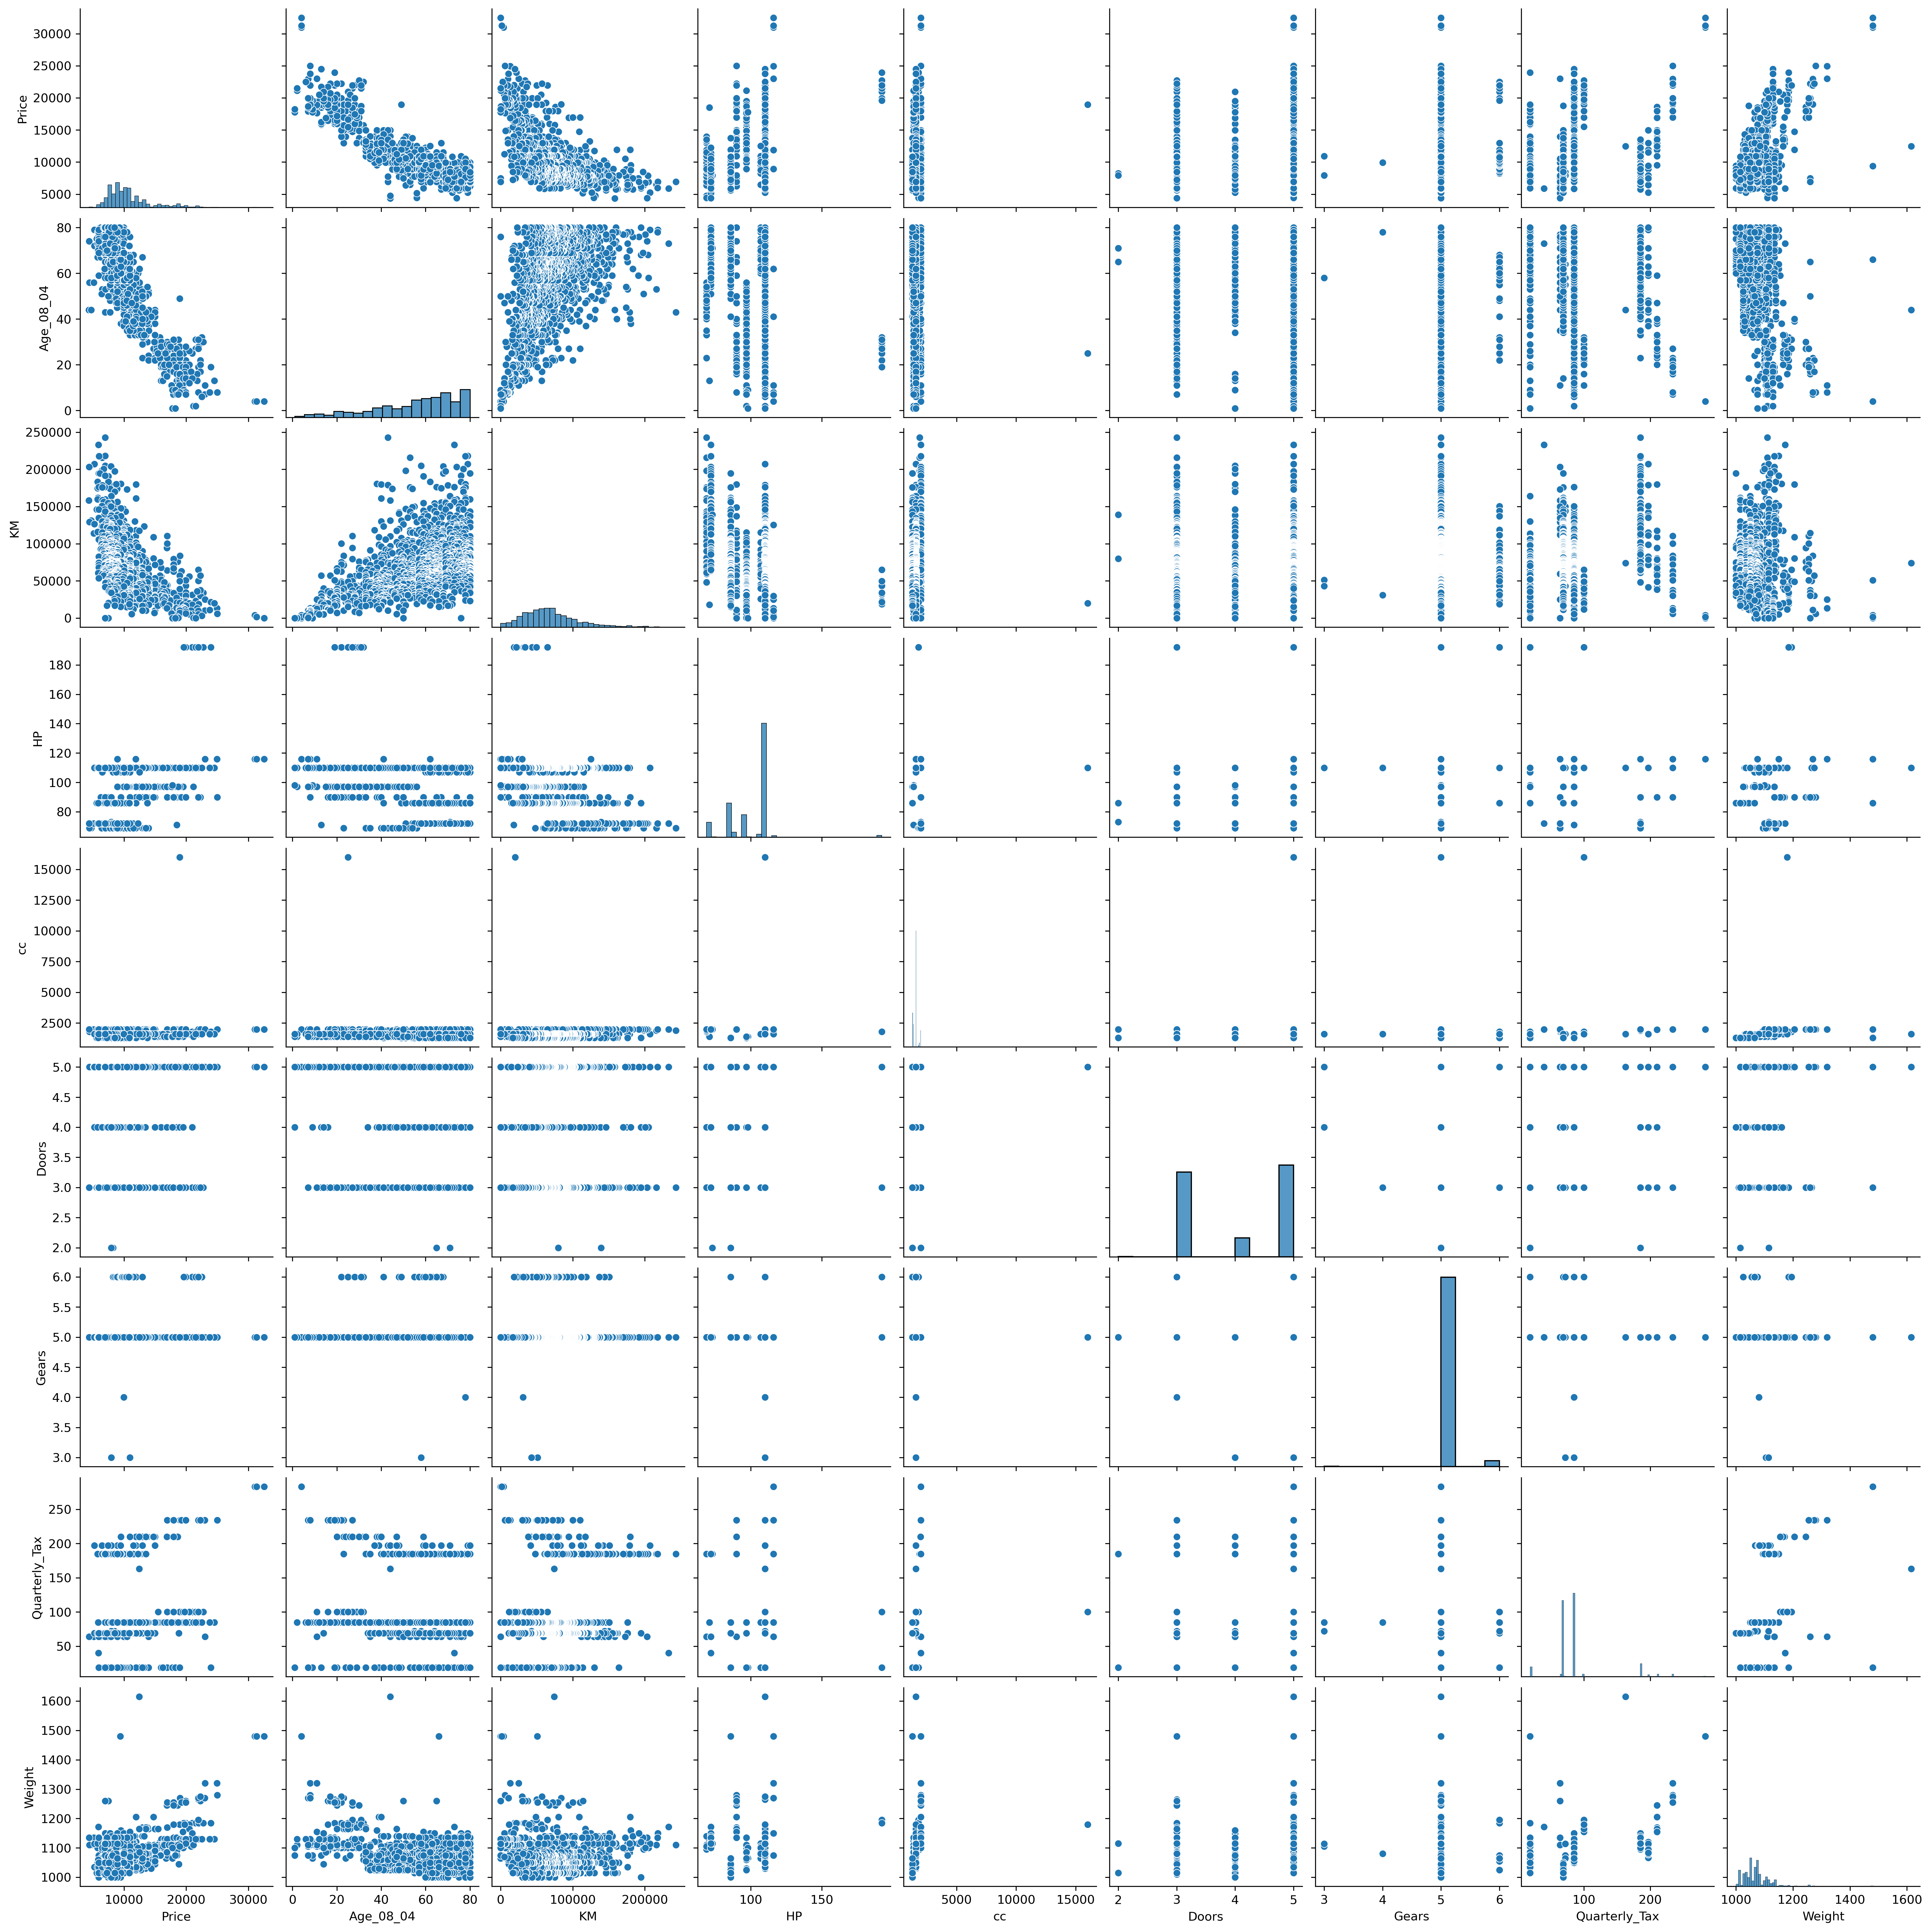

In [40]:
#scatter matrix , correlation matrix
#pair plot, pd.plotting.scatter_matrix

sns.pairplot(df1)

<AxesSubplot:>

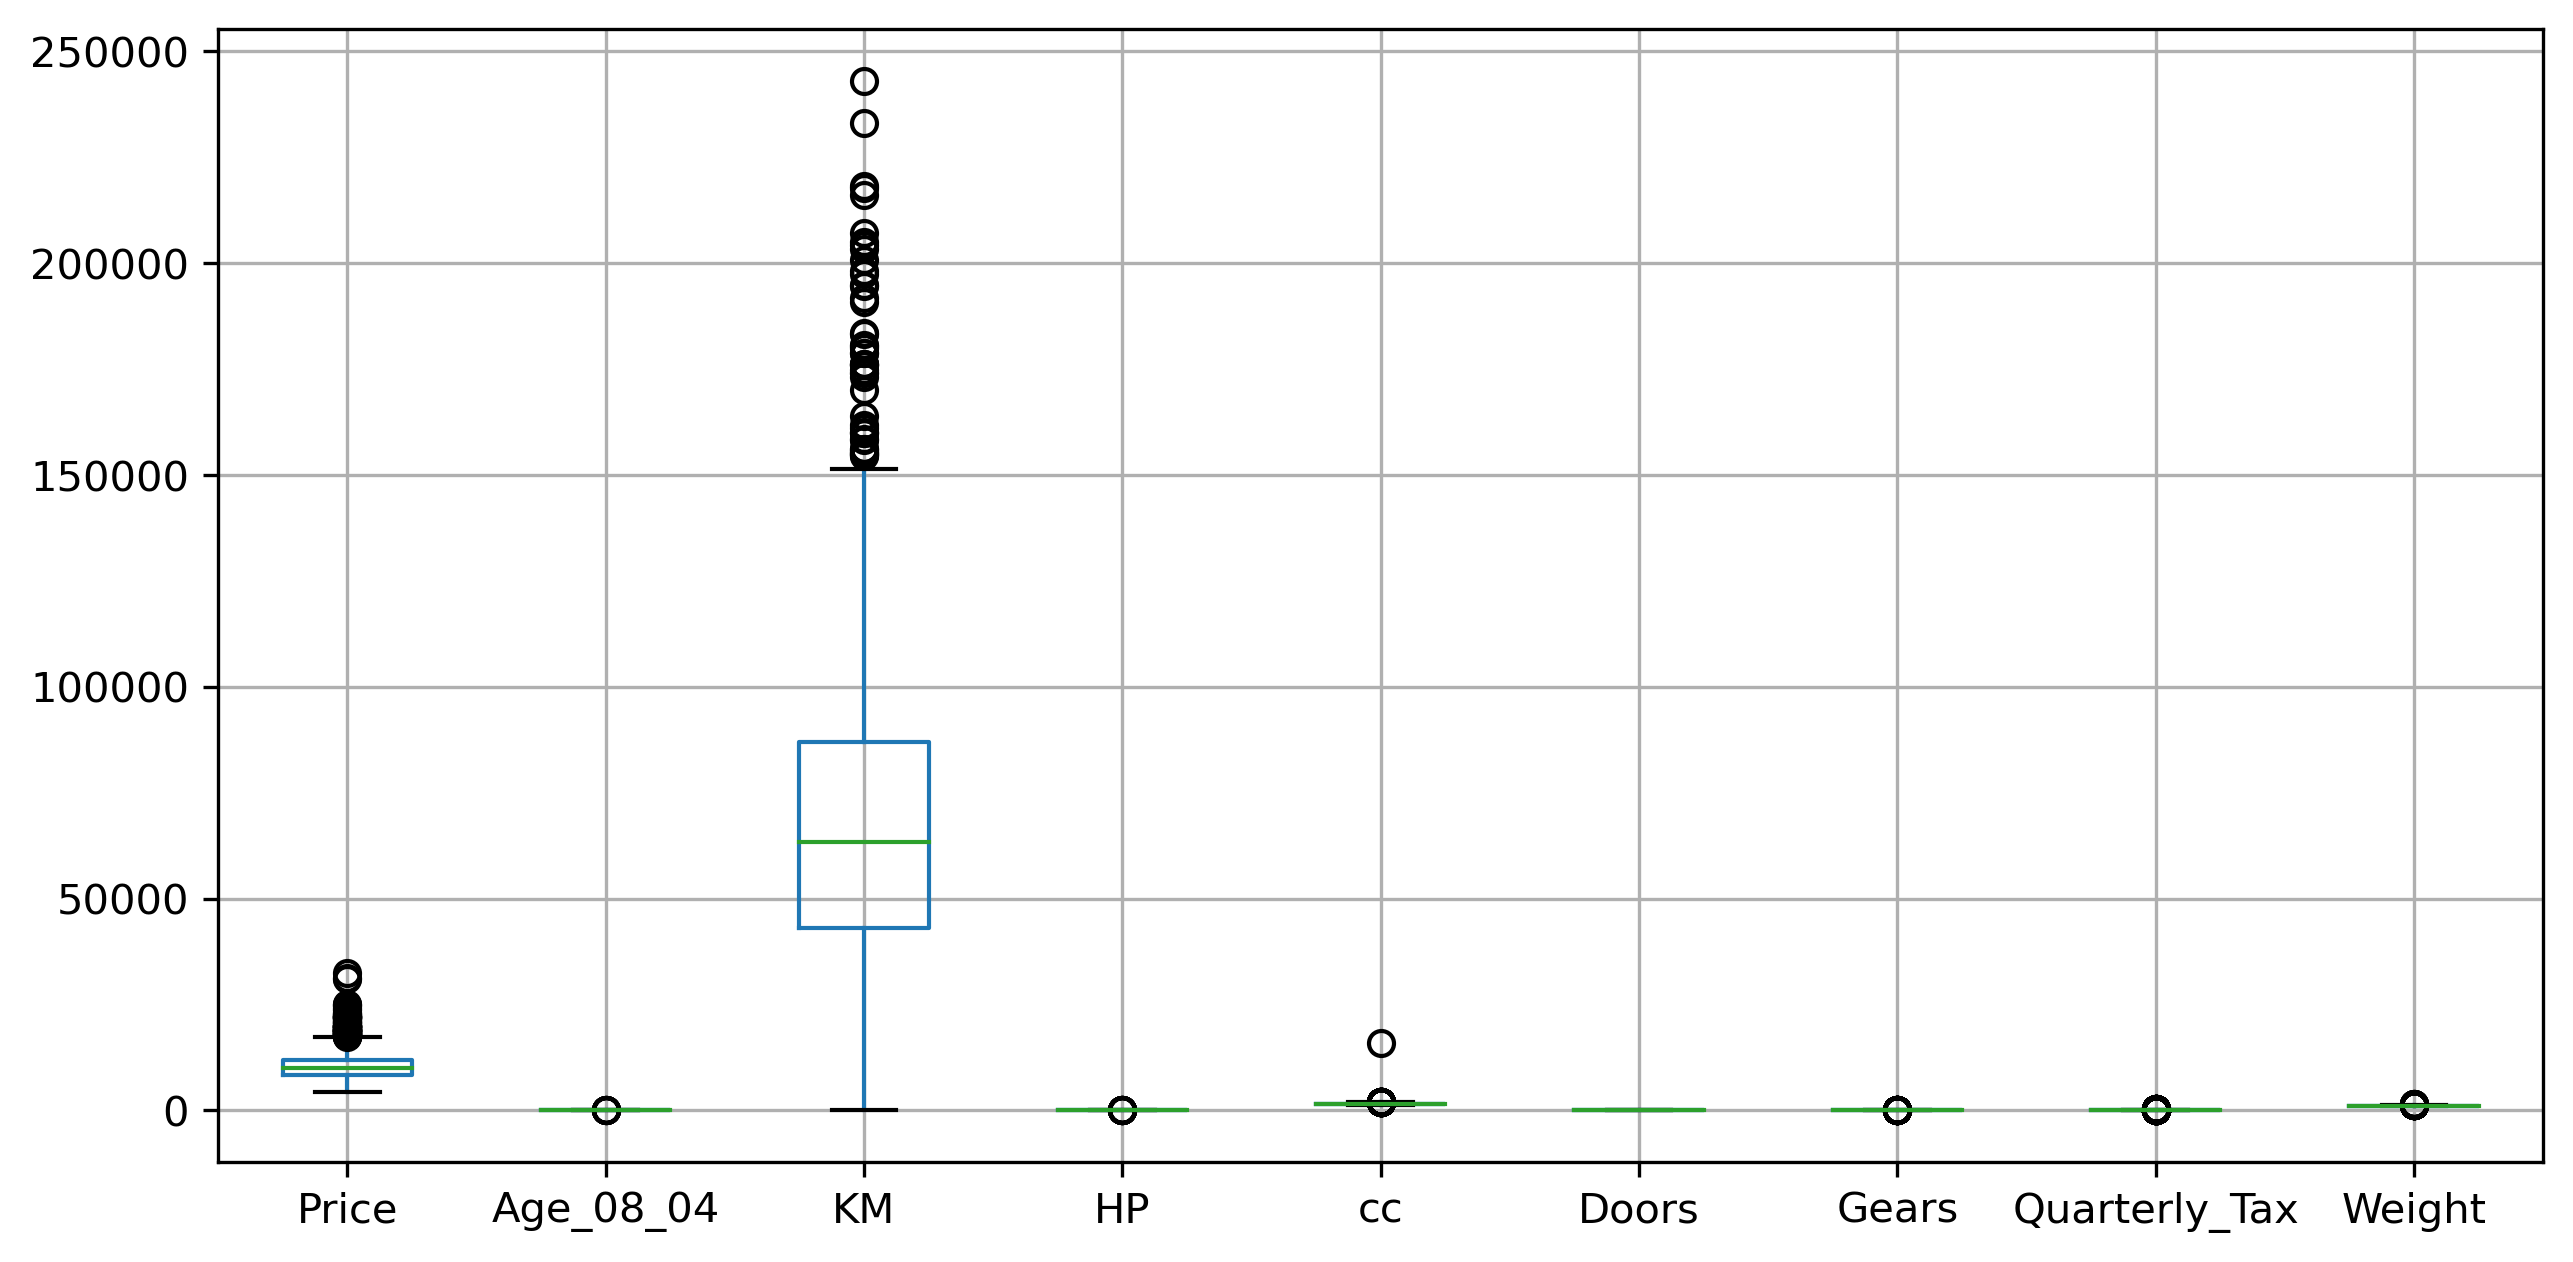

In [41]:
# Checking Outliers
df1.boxplot()

In [42]:
#Correlation analysis

df1.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

<AxesSubplot:>

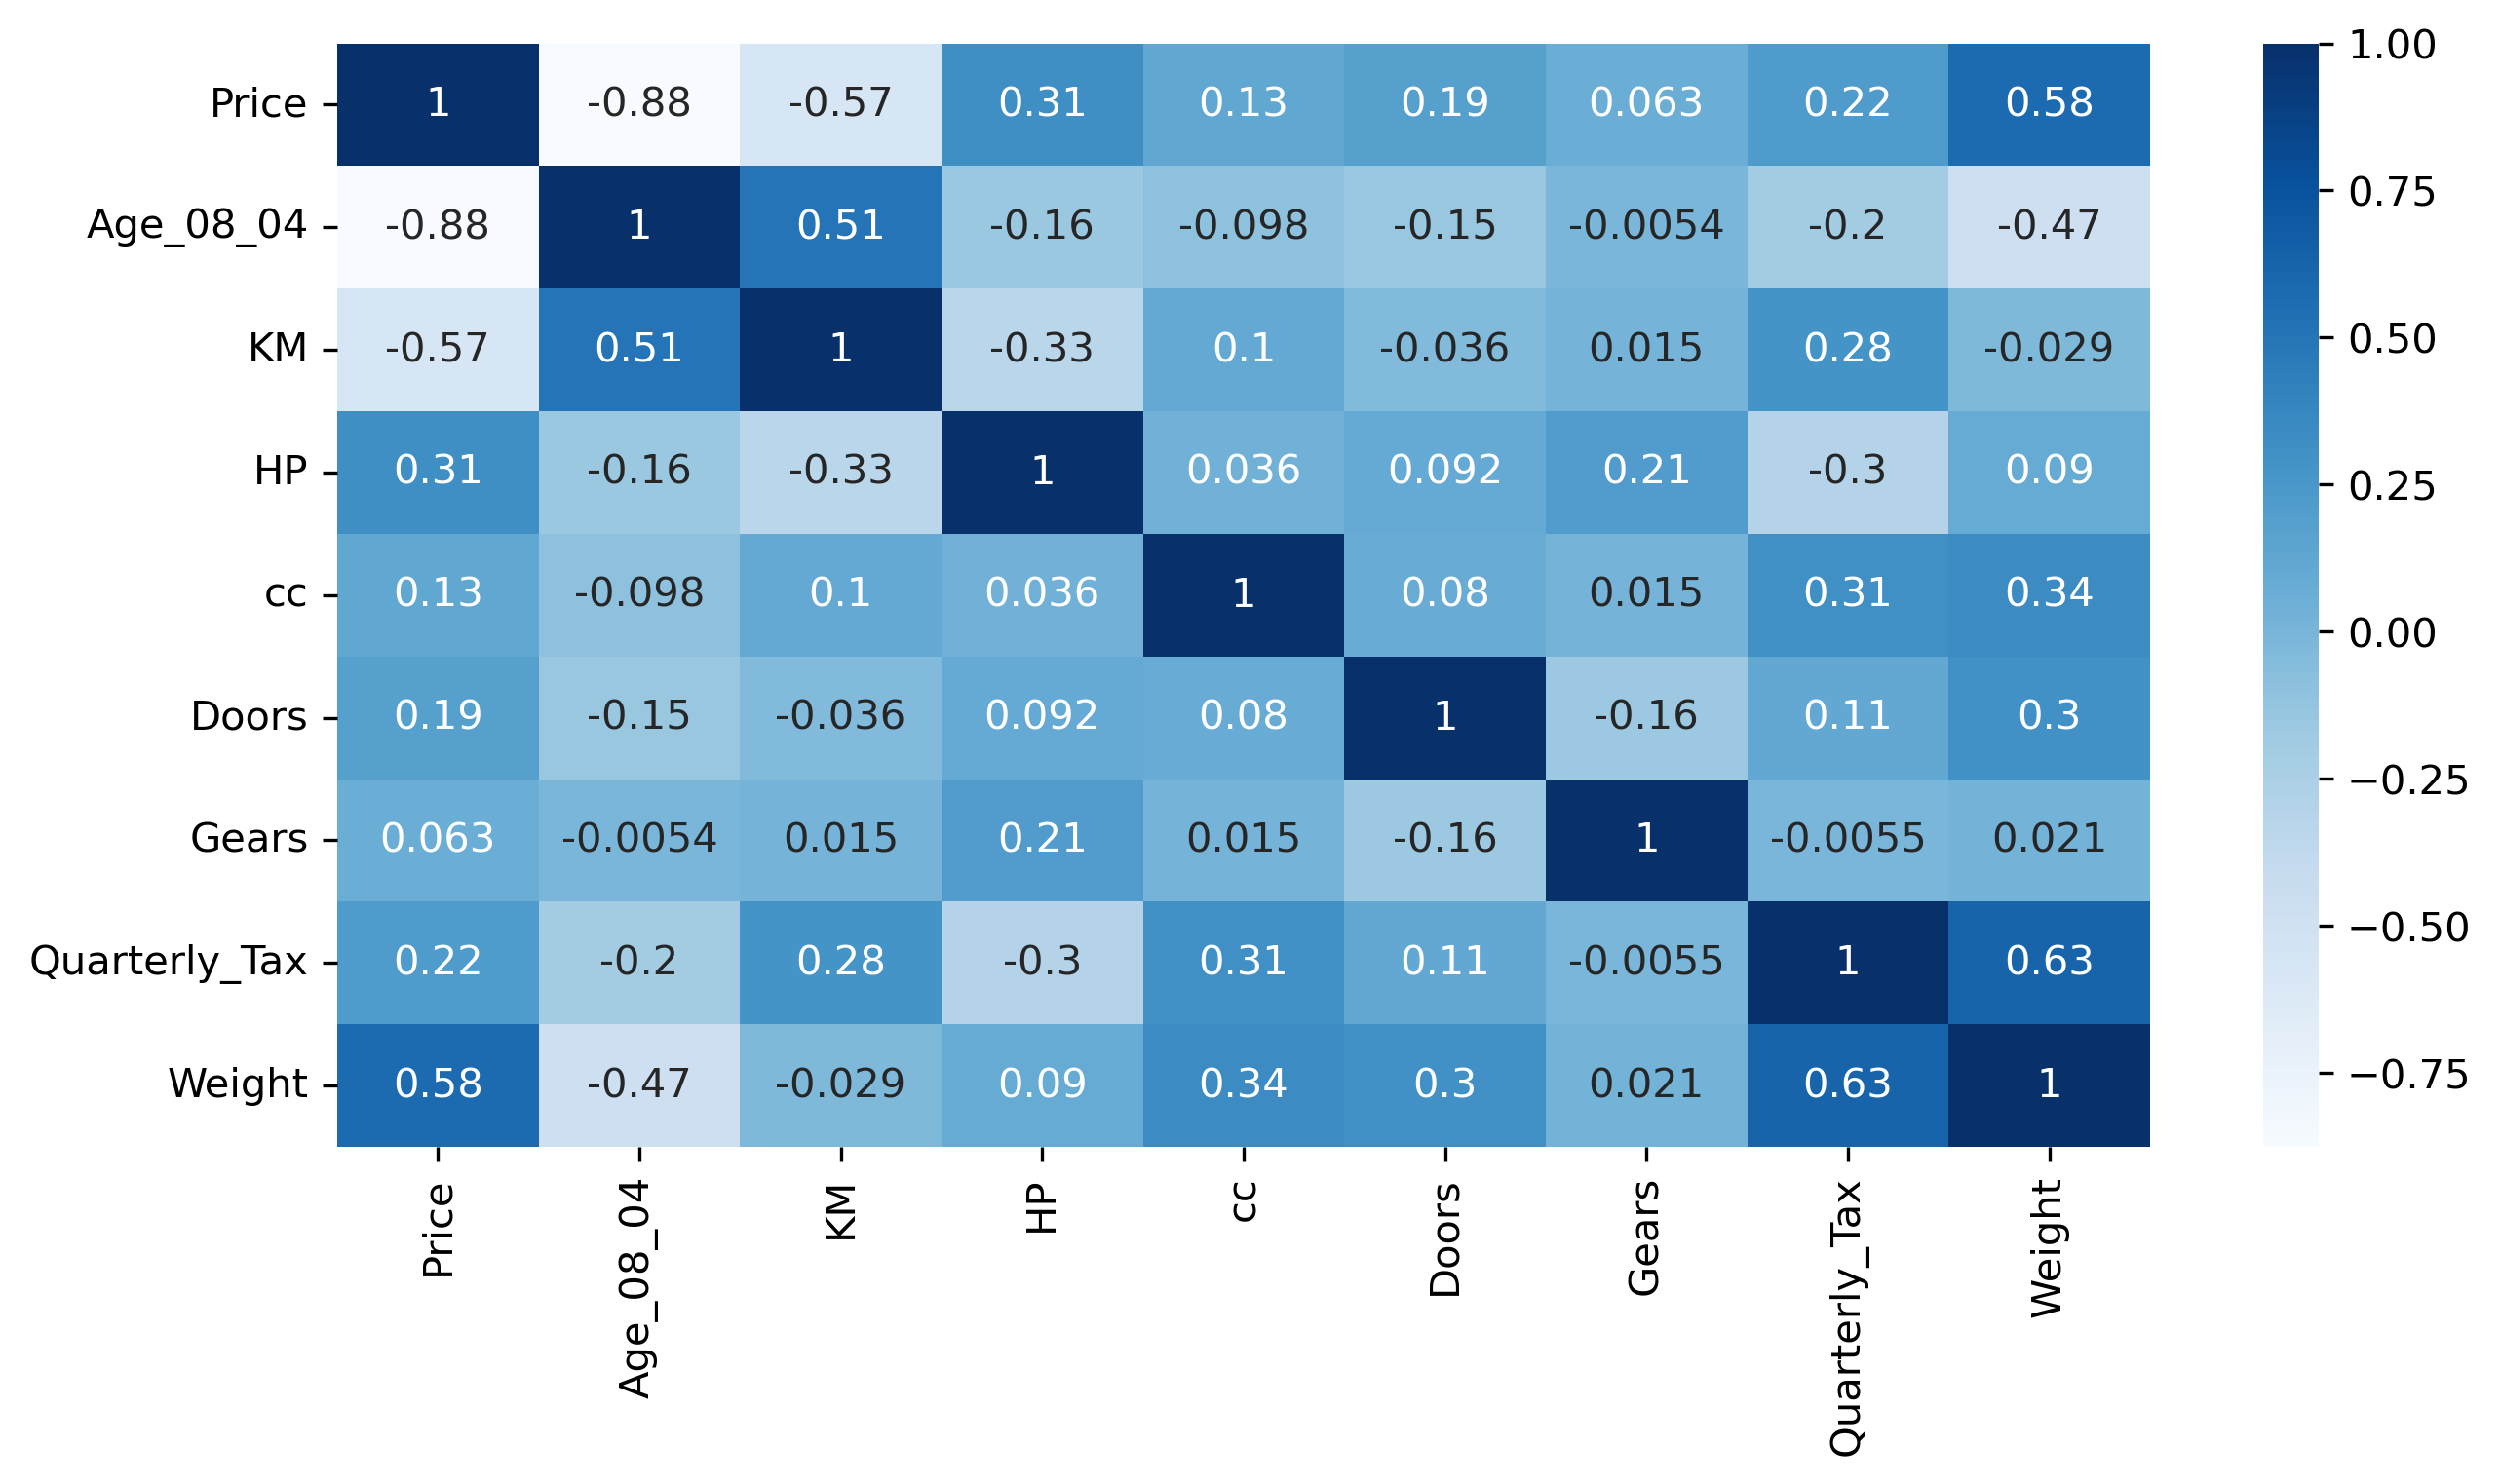

In [43]:
sns.heatmap(df1.corr(),annot = True,cmap= 'Blues')

# Preparing a Model

In [44]:
# Build model

import statsmodels.formula.api as smf

model_TC = smf.ols('Price~Age_08_04+ KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df1).fit()
model_TC.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [45]:
model_TC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:10:36   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model_TC.rsquared

0.8637627463428192

* Here R-squared Accuracy is 86.4%.

* Based on p-value and alpha value, Here Age_08_04,KM,HP,Gears,Quartely_Tax,Weight columns are contributing target column but cc and Doors columns are not contributing target column.

* So, build models seperately for cc and Doors columns.

In [47]:
#sqrt transformation
df1['sqrt_Price'] = df1['Price']**(1/2)

In [48]:
sqrt_model_TC = smf.ols('sqrt_Price~Age_08_04+ KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df1).fit()
sqrt_model_TC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1158.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:10:36   Log-Likelihood:                -4581.8
No. Observations:                1436   AIC:                             9182.
Df Residuals:                    1427   BIC:                             9229.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.2233      6.202      7.614      0.000      35.056      59.390
Age_08_04        -0.5574      0.011    -48.489      0.000      -0.580      -0.535
KM               -0.0001    5.5e-06    -18.290      0.000      -0.000   -8.99e-05
HP                0.1403      0.012     11.329      0.000       0.116       0.165
cc               -0.0003      0.000     -0.879      0.379      -0.001       0.000
Doors             0.2938      0.176      1.671      0.095      -0.051       0.639
Gears             3.1956      0.866      3.690      0.000       1.497       4.894
Quarterly_Tax     0.0247      0.006      4.289      0.000       0.013       0.036
Weight            0.0560      0.005     11.940      0.000       0.047       0.065
==============================================================================
Omnibus:                      141.809   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.257
Skew:                          -0.437   Prob(JB):                    1.30e-112
Kurtosis:                       5.802   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
sqrt_model_TC.rsquared

0.8664911454229616

In [50]:
# build model for cc column

cc_model = smf.ols('Price~cc',data = df1).fit()

cc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.55e-06
Time:                        09:10:36   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# build model for Doors column

Doors_model = smf.ols('Price~Doors',data = df1).fit()

Doors_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.46e-12
Time:                        09:10:36   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# build model for cc+Doors column

model2 = smf.ols('Price~cc+Doors',data = df1).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.15e-15
Time:                        09:10:36   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
newmodel_TC = smf.ols('sqrt_Price~Age_08_04+ KM+HP+Gears+Quarterly_Tax+Weight',data = df1).fit()
newmodel_TC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1541.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:10:36   Log-Likelihood:                -4583.6
No. Observations:                1436   AIC:                             9181.
Df Residuals:                    1429   BIC:                             9218.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.8794      6.194      7.730      0.000      35.729      60.030
Age_08_04        -0.5575      0.012    -48.482      0.000      -0.580      -0.535
KM               -0.0001   5.49e-06    -18.349      0.000      -0.000      -9e-05
HP                0.1407      0.012     11.435      0.000       0.117       0.165
Gears             2.9300      0.851      3.445      0.001       1.261       4.599
Quarterly_Tax     0.0233      0.006      4.093      0.000       0.012       0.035
Weight            0.0573      0.004     12.783      0.000       0.049       0.066
==============================================================================
Omnibus:                      146.377   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.526
Skew:                          -0.450   Prob(JB):                    1.15e-117
Kurtosis:                       5.862   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Based on the above values, cc and Doors columns are not contributing to the target column. So, building new model by deleting those two columns didn't reduce accuracy value.

## Cooks Distance plot( For Detecting influencers/outliers)

In [54]:
np.set_printoptions(suppress=True)

In [55]:
influence1 = newmodel_TC.get_influence()

In [56]:
Cooks = influence1.cooks_distance

In [57]:
print(Cooks[0])

[0.00647119 0.00312793 0.00480966 ... 0.00002332 0.00183179 0.01635377]


In [58]:
len(Cooks[0])

1436

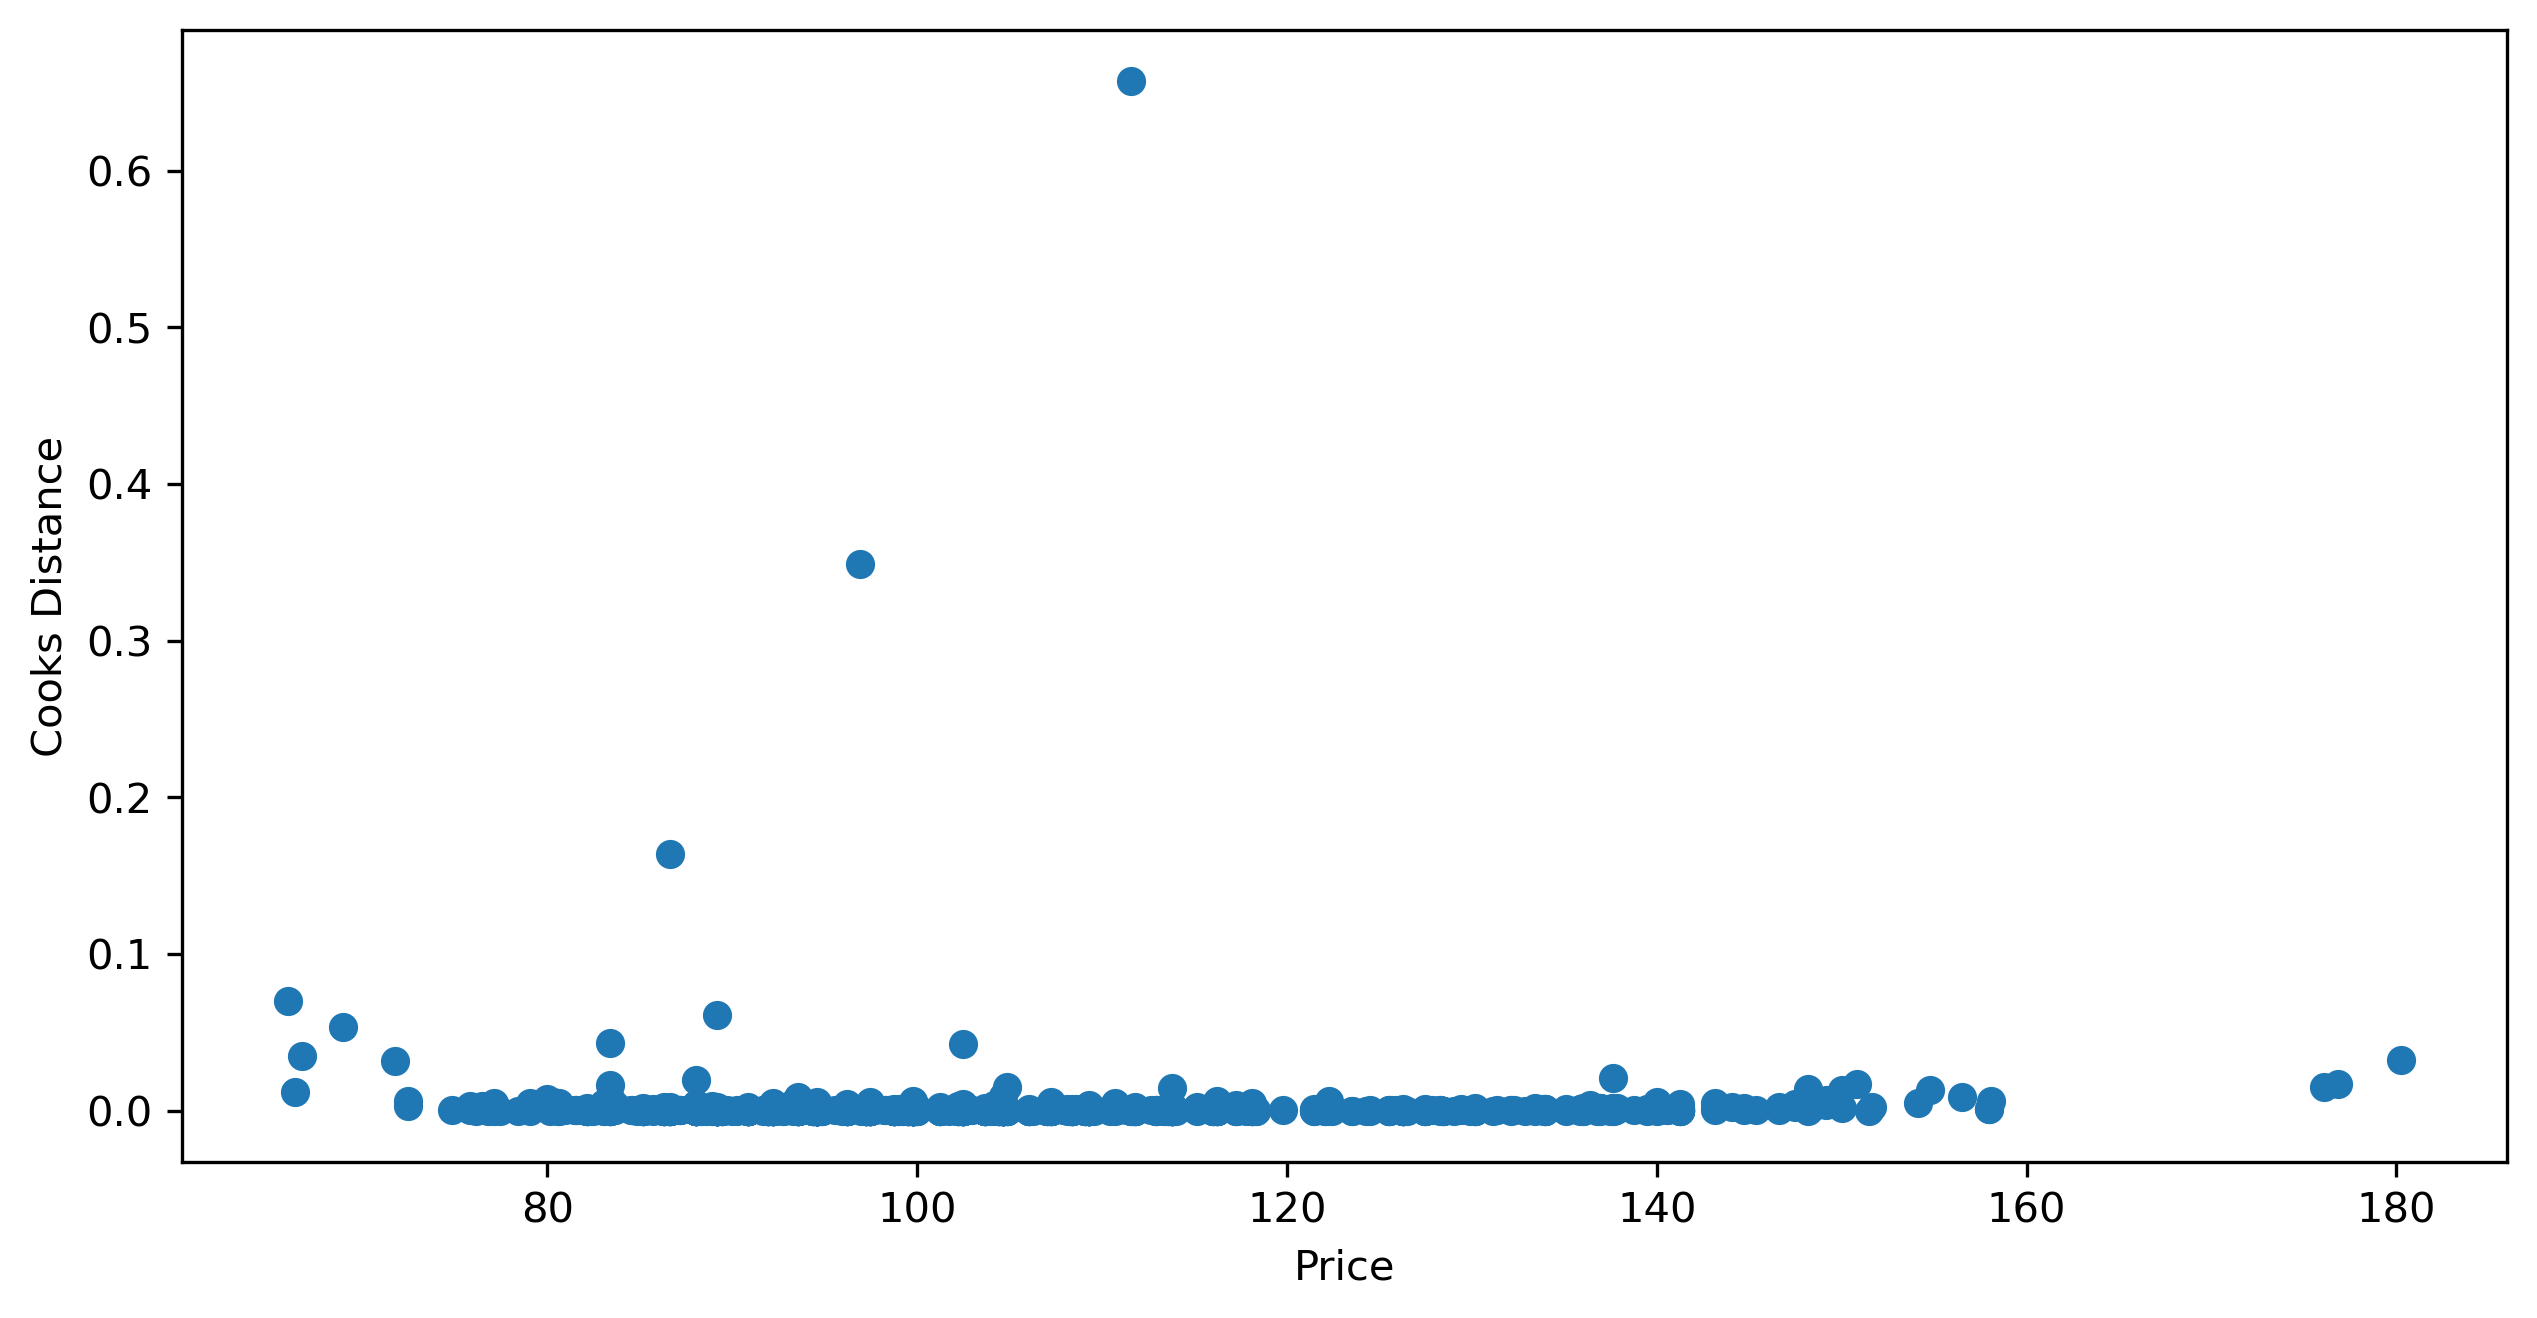

In [59]:
plt.scatter(df1.sqrt_Price,Cooks[0])
plt.xlabel('Price')
plt.ylabel('Cooks Distance')
plt.show()

In [129]:
np.argmax(Cooks[0]),np.max(Cooks[0])

(221, 0.6572676708439994)

In [61]:
df1[df1.index.isin([221])]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  \
221  12450         44  74172  110  1600      5      5            163    1615   

     sqrt_Price  
221  111.579568

## High Influence plots(Calculating leverage_cutoff value)

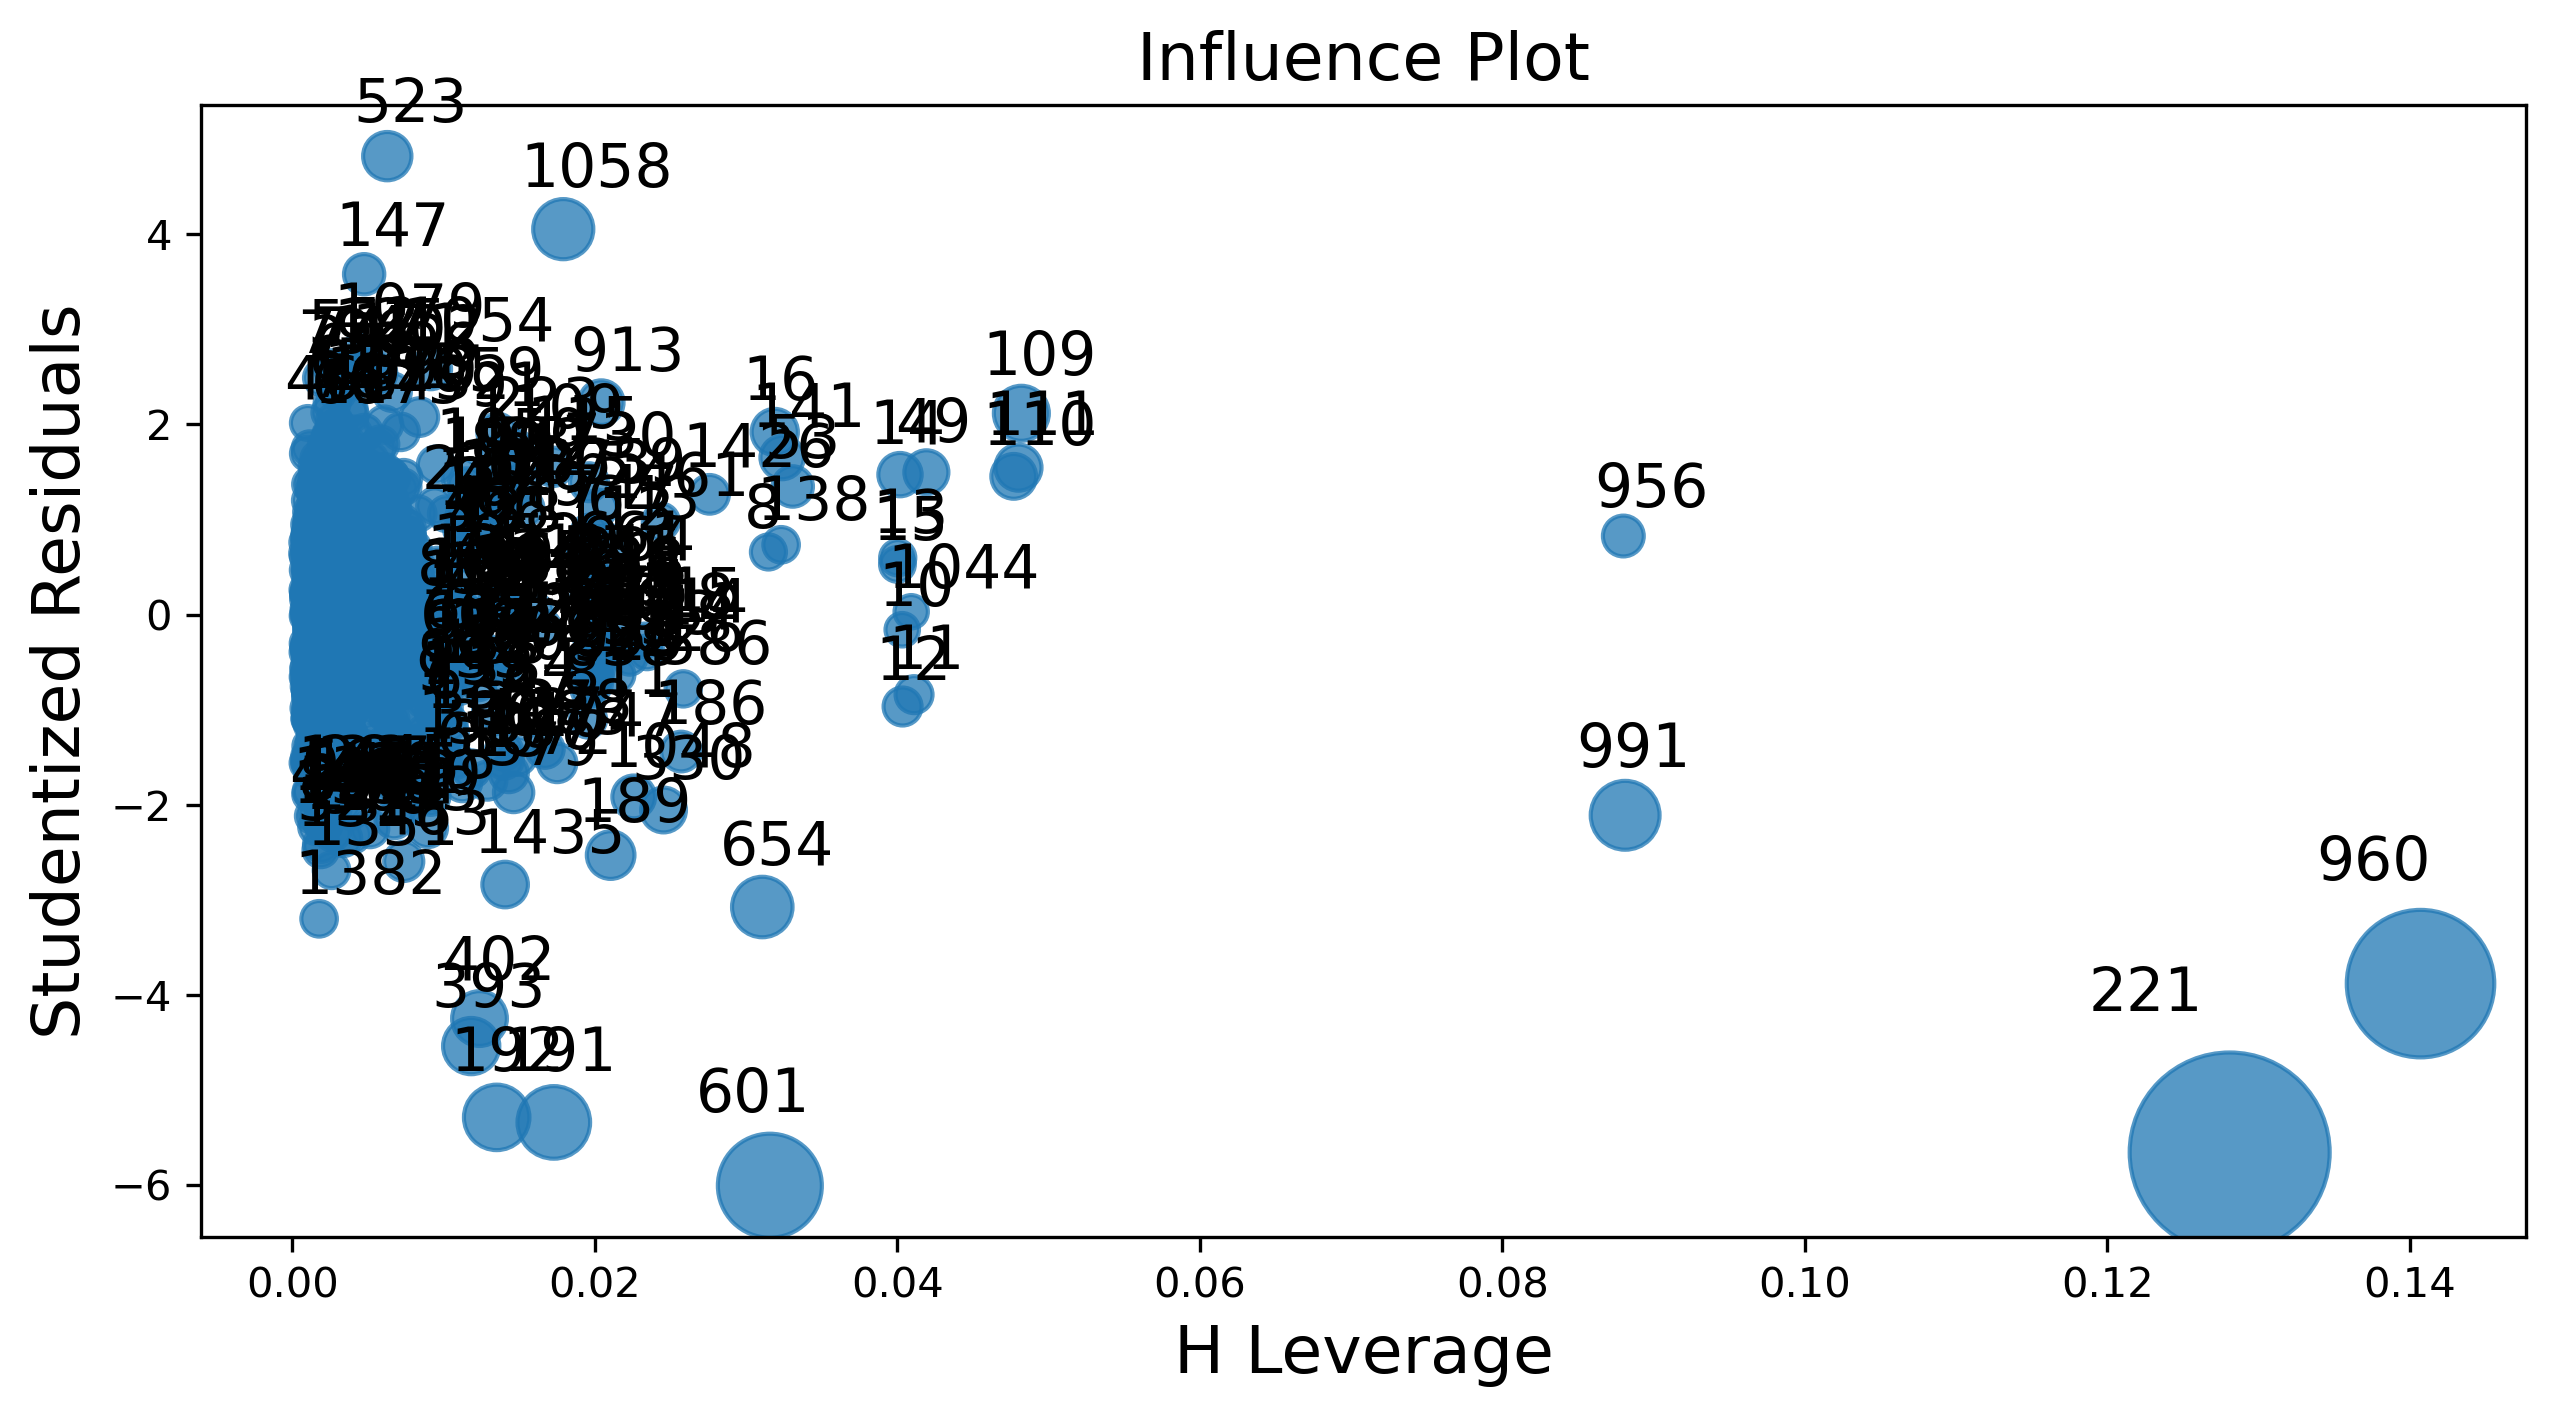

<Figure size 6000x6000 with 0 Axes>

In [133]:
fig = influence_plot(newmodel_TC)

fig=plt.figure(figsize=(20,20))

In [149]:
#Leverage cutoff value

k1 = df1.shape[1]
n1 = df1.shape[0]
leverage_cutoff_01 = (3*(k1+1))/n1
leverage_cutoff_01

0.02298050139275766

In [126]:
df1[df1.index.isin([221])]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  \
221  12450         44  74172  110  1600      5      5            163    1615   

     sqrt_Price  
221  111.579568

## Test for Normality of residuals

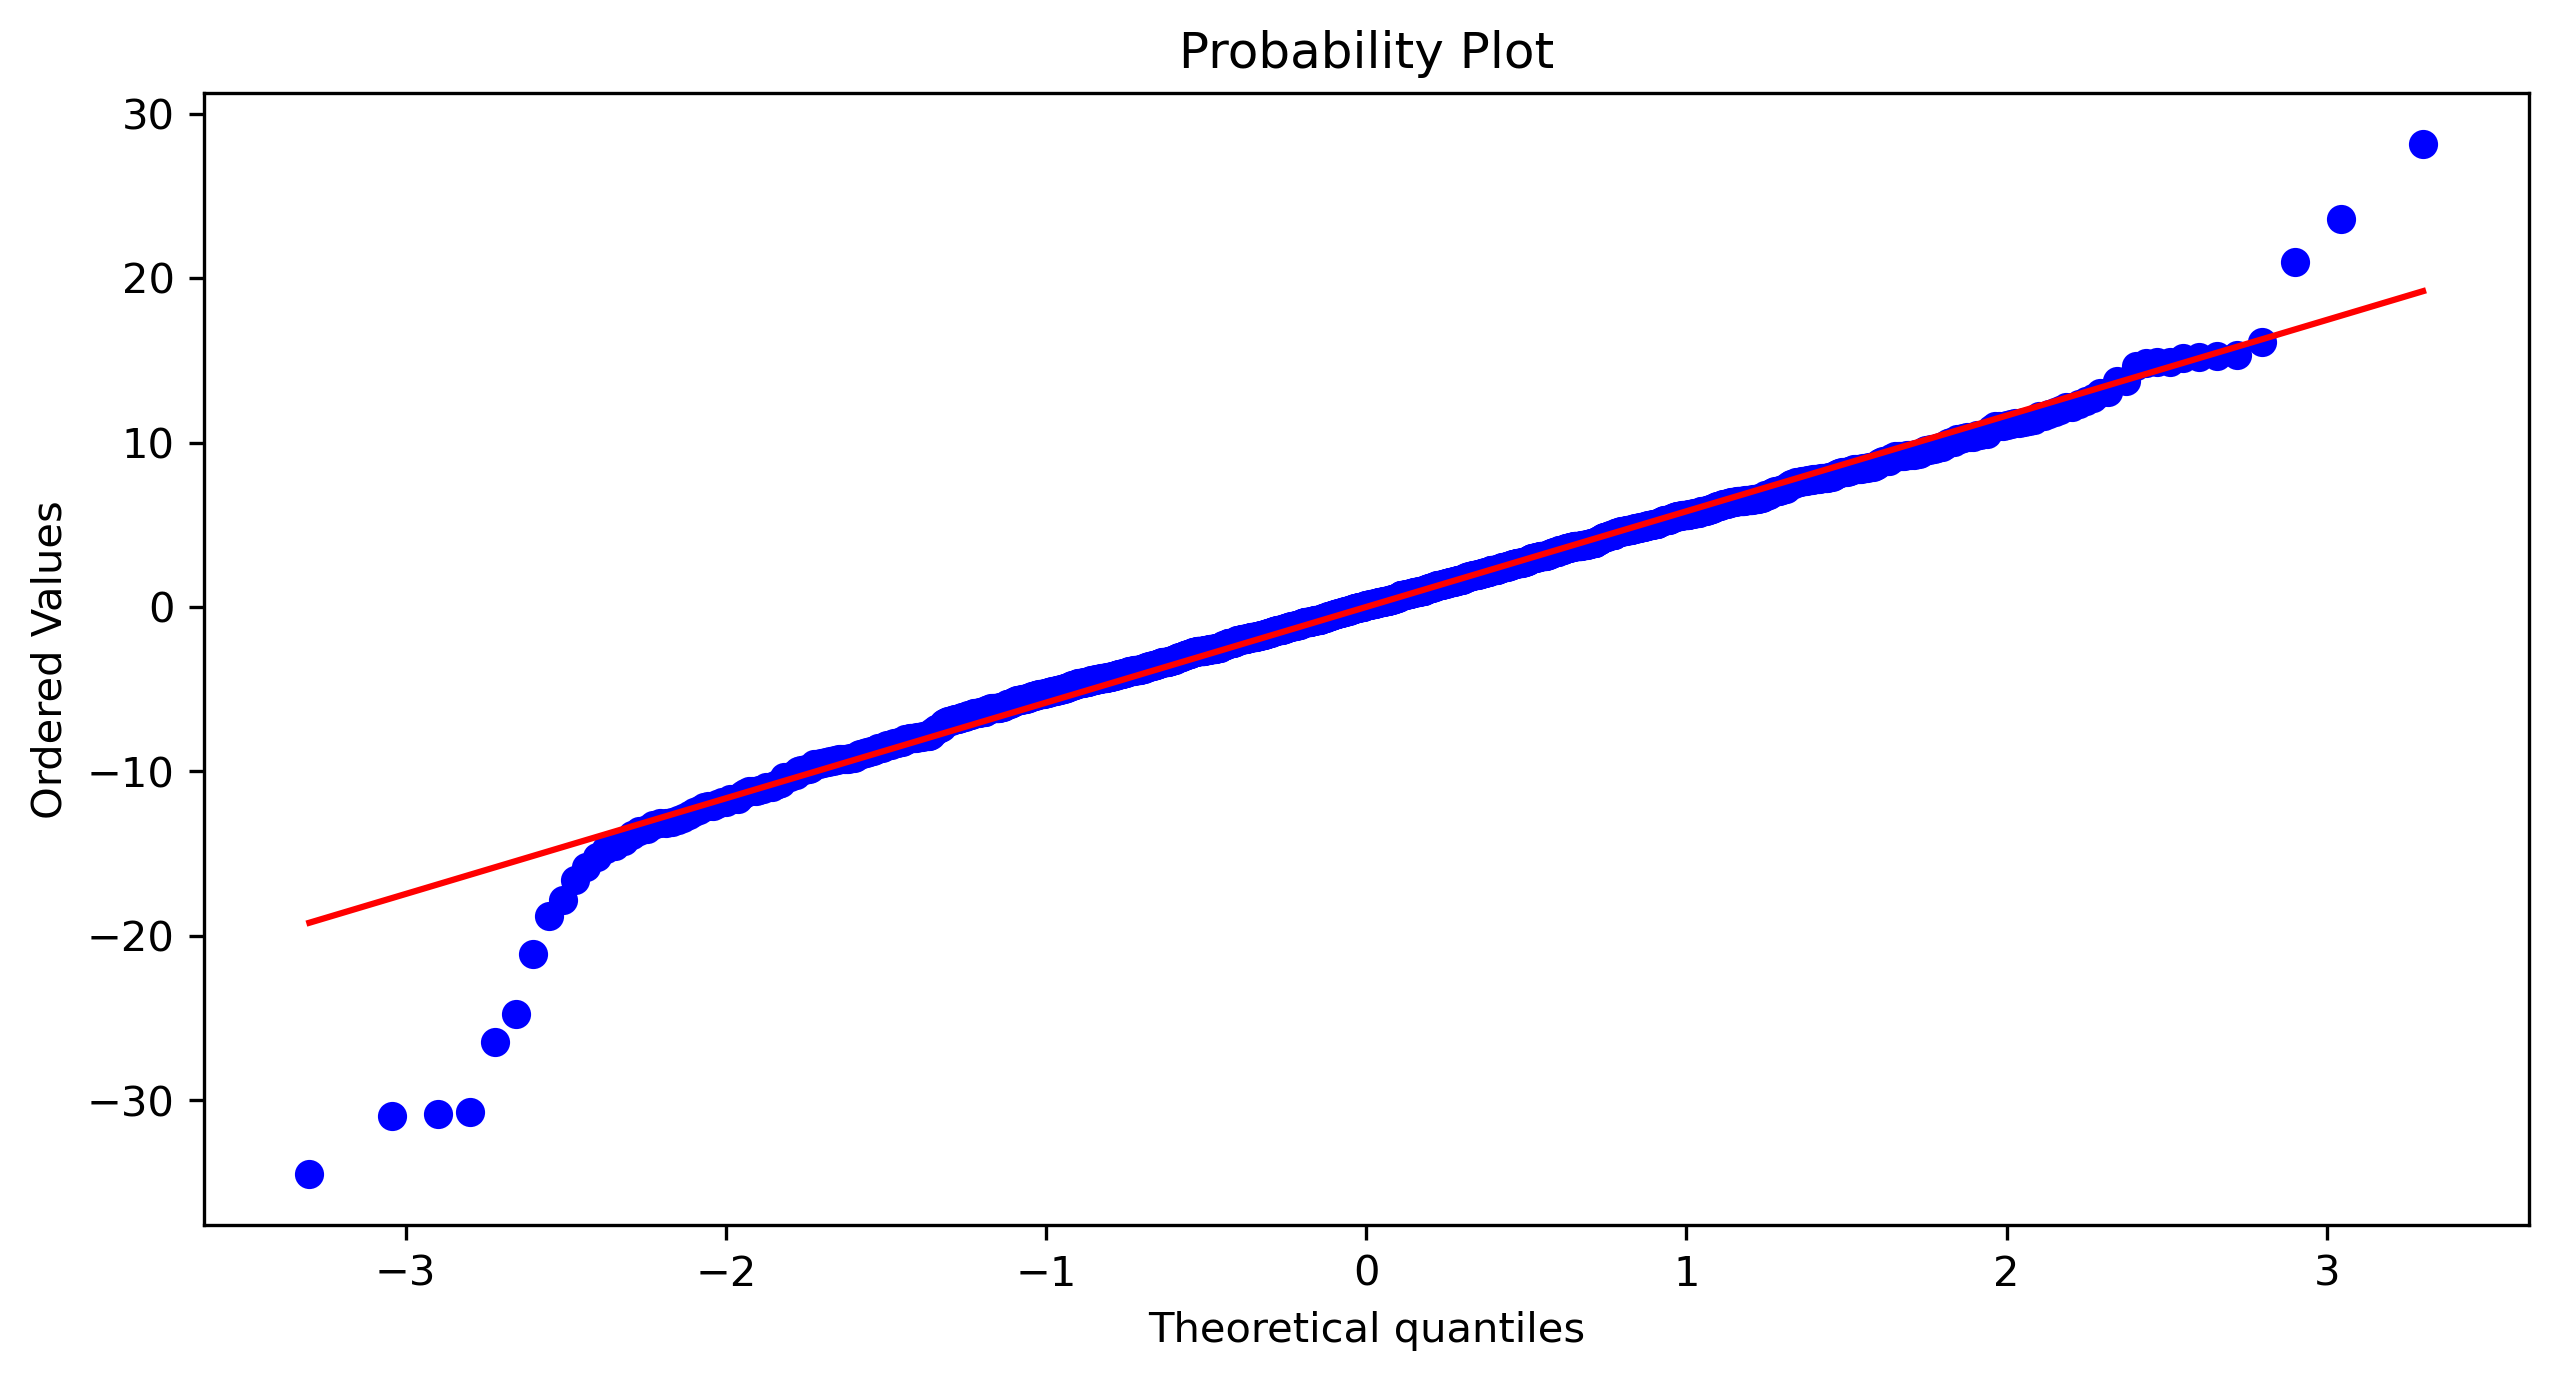

In [134]:
stats.probplot(newmodel_TC.resid,dist = 'norm',plot = pylab)
pylab.show()

In [147]:
list(np.where(newmodel_TC.resid<-30))

[array([191, 192, 221, 601], dtype=int64)]

In [152]:
list(np.where(newmodel_TC.resid>20))

[array([ 147,  523, 1058], dtype=int64)]

## Residual plot for Homoscedasticity

In [154]:
def standard_values(values) : return (values- values.mean())/values.std()

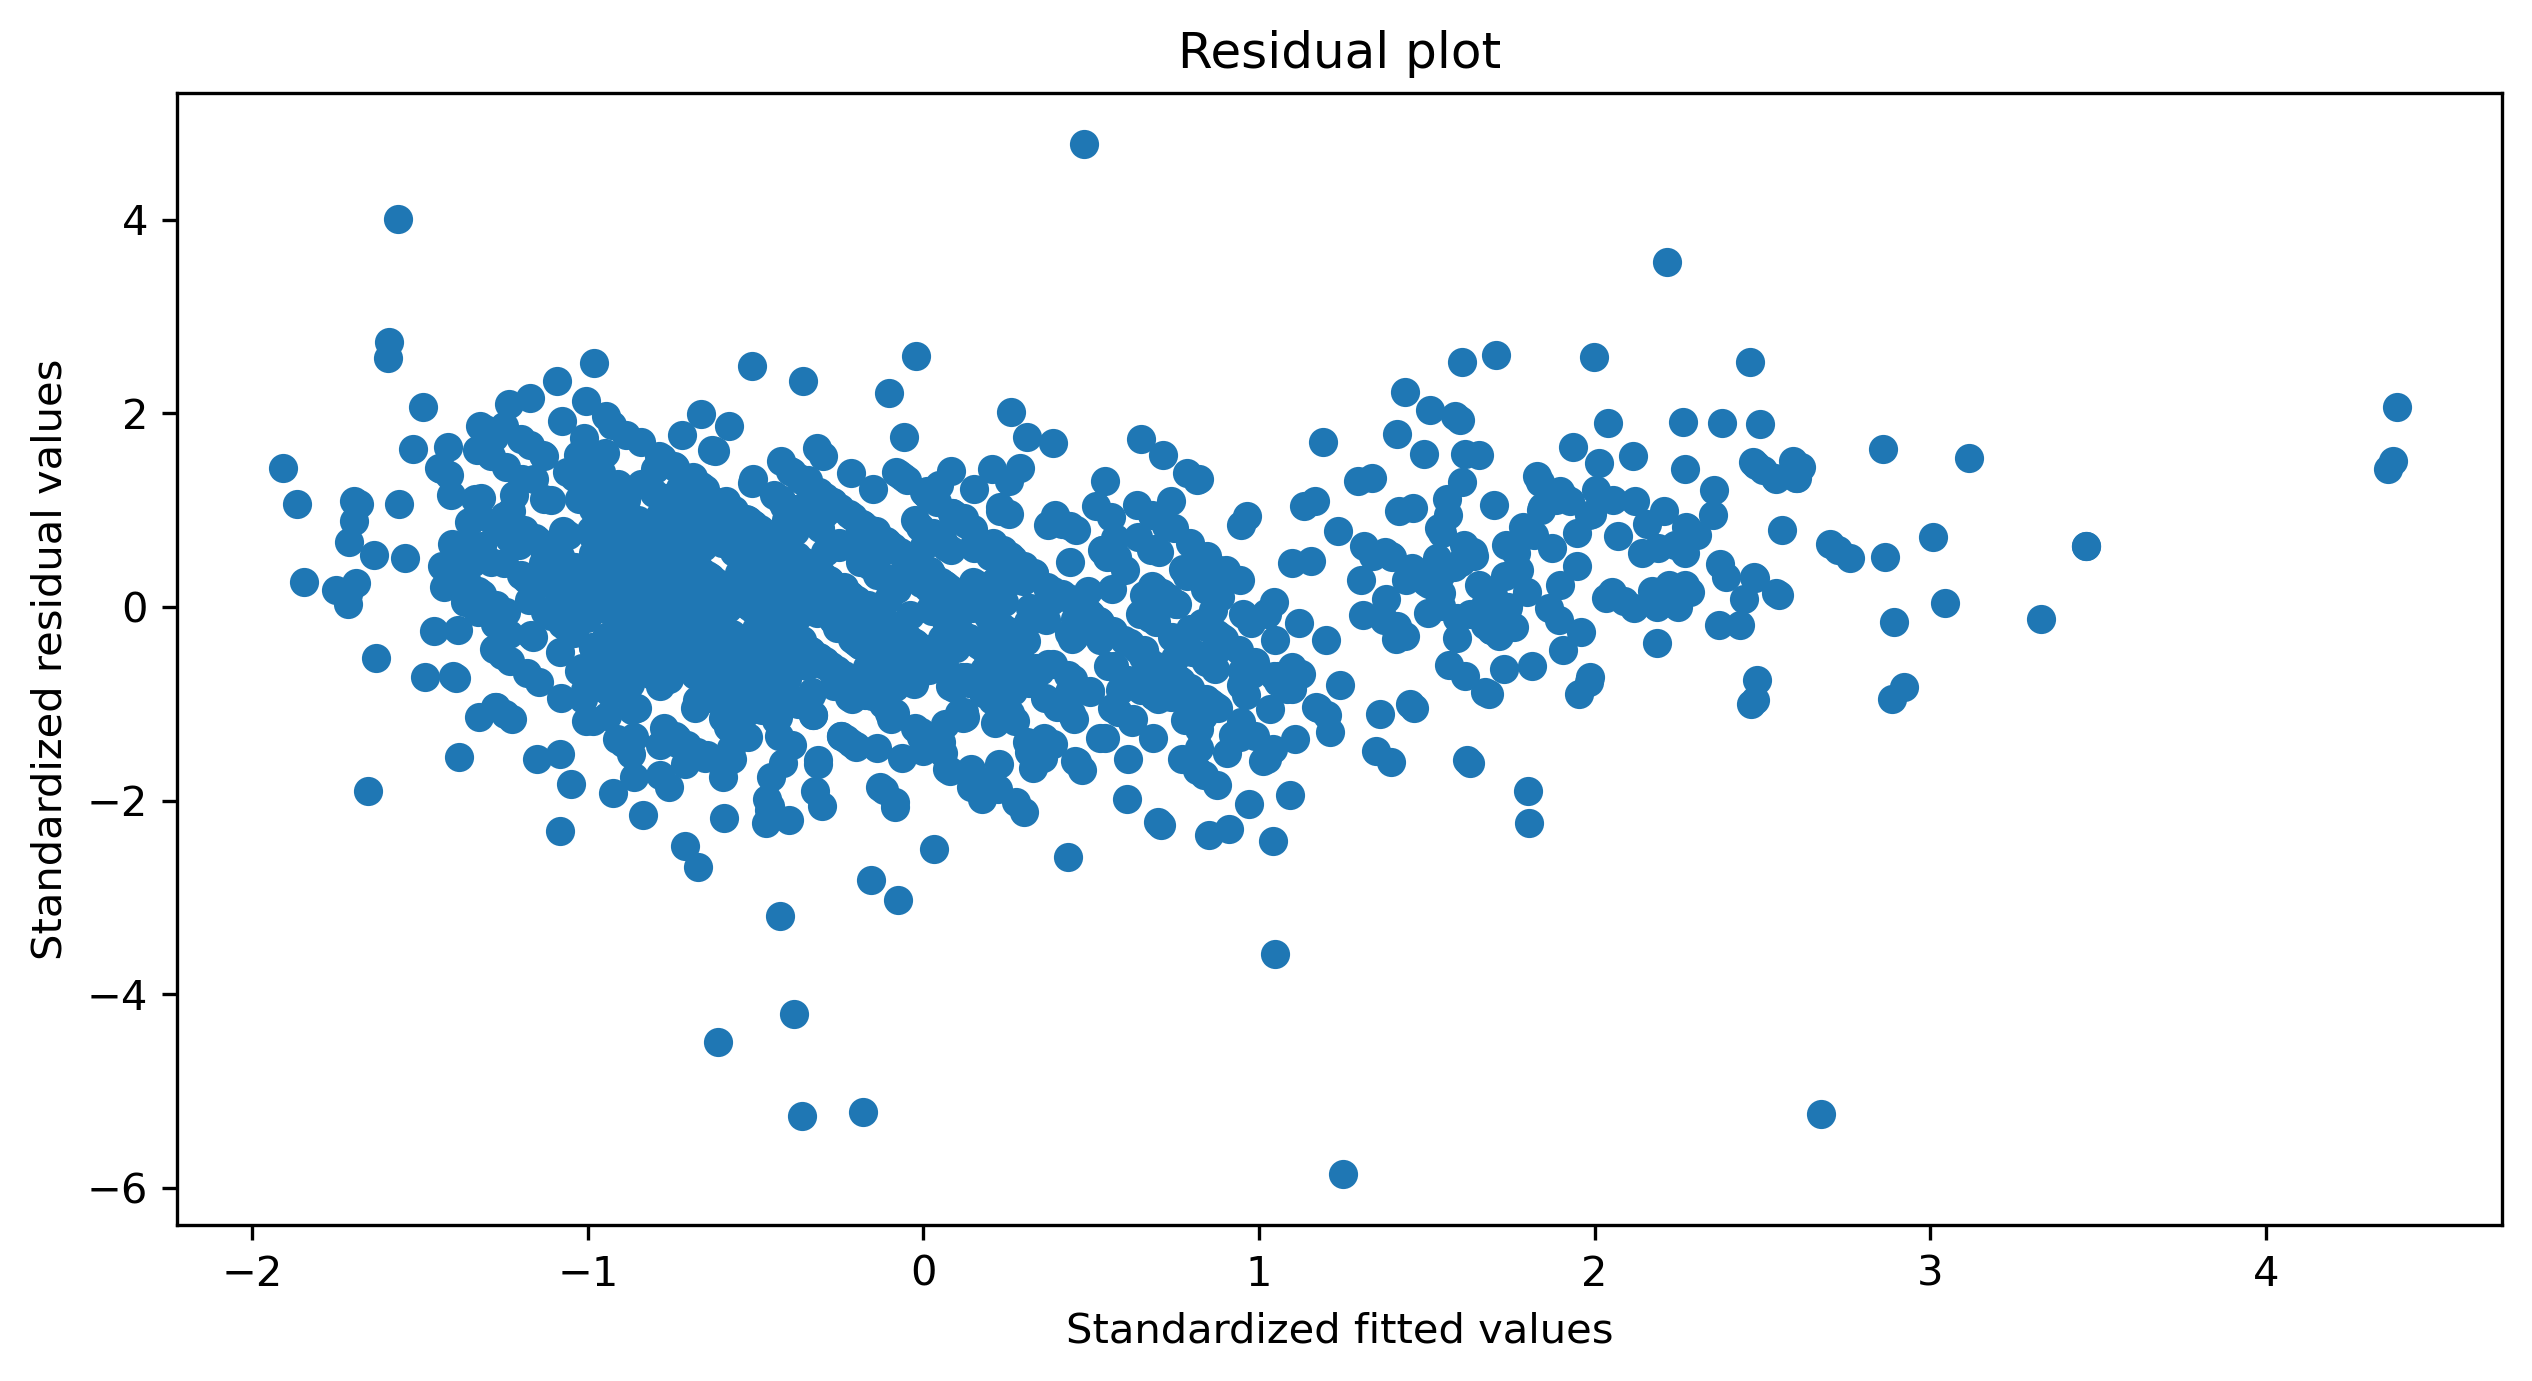

In [155]:
plt.scatter(standard_values(newmodel_TC.fittedvalues),standard_values(newmodel_TC.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Test for Residual vs Regression

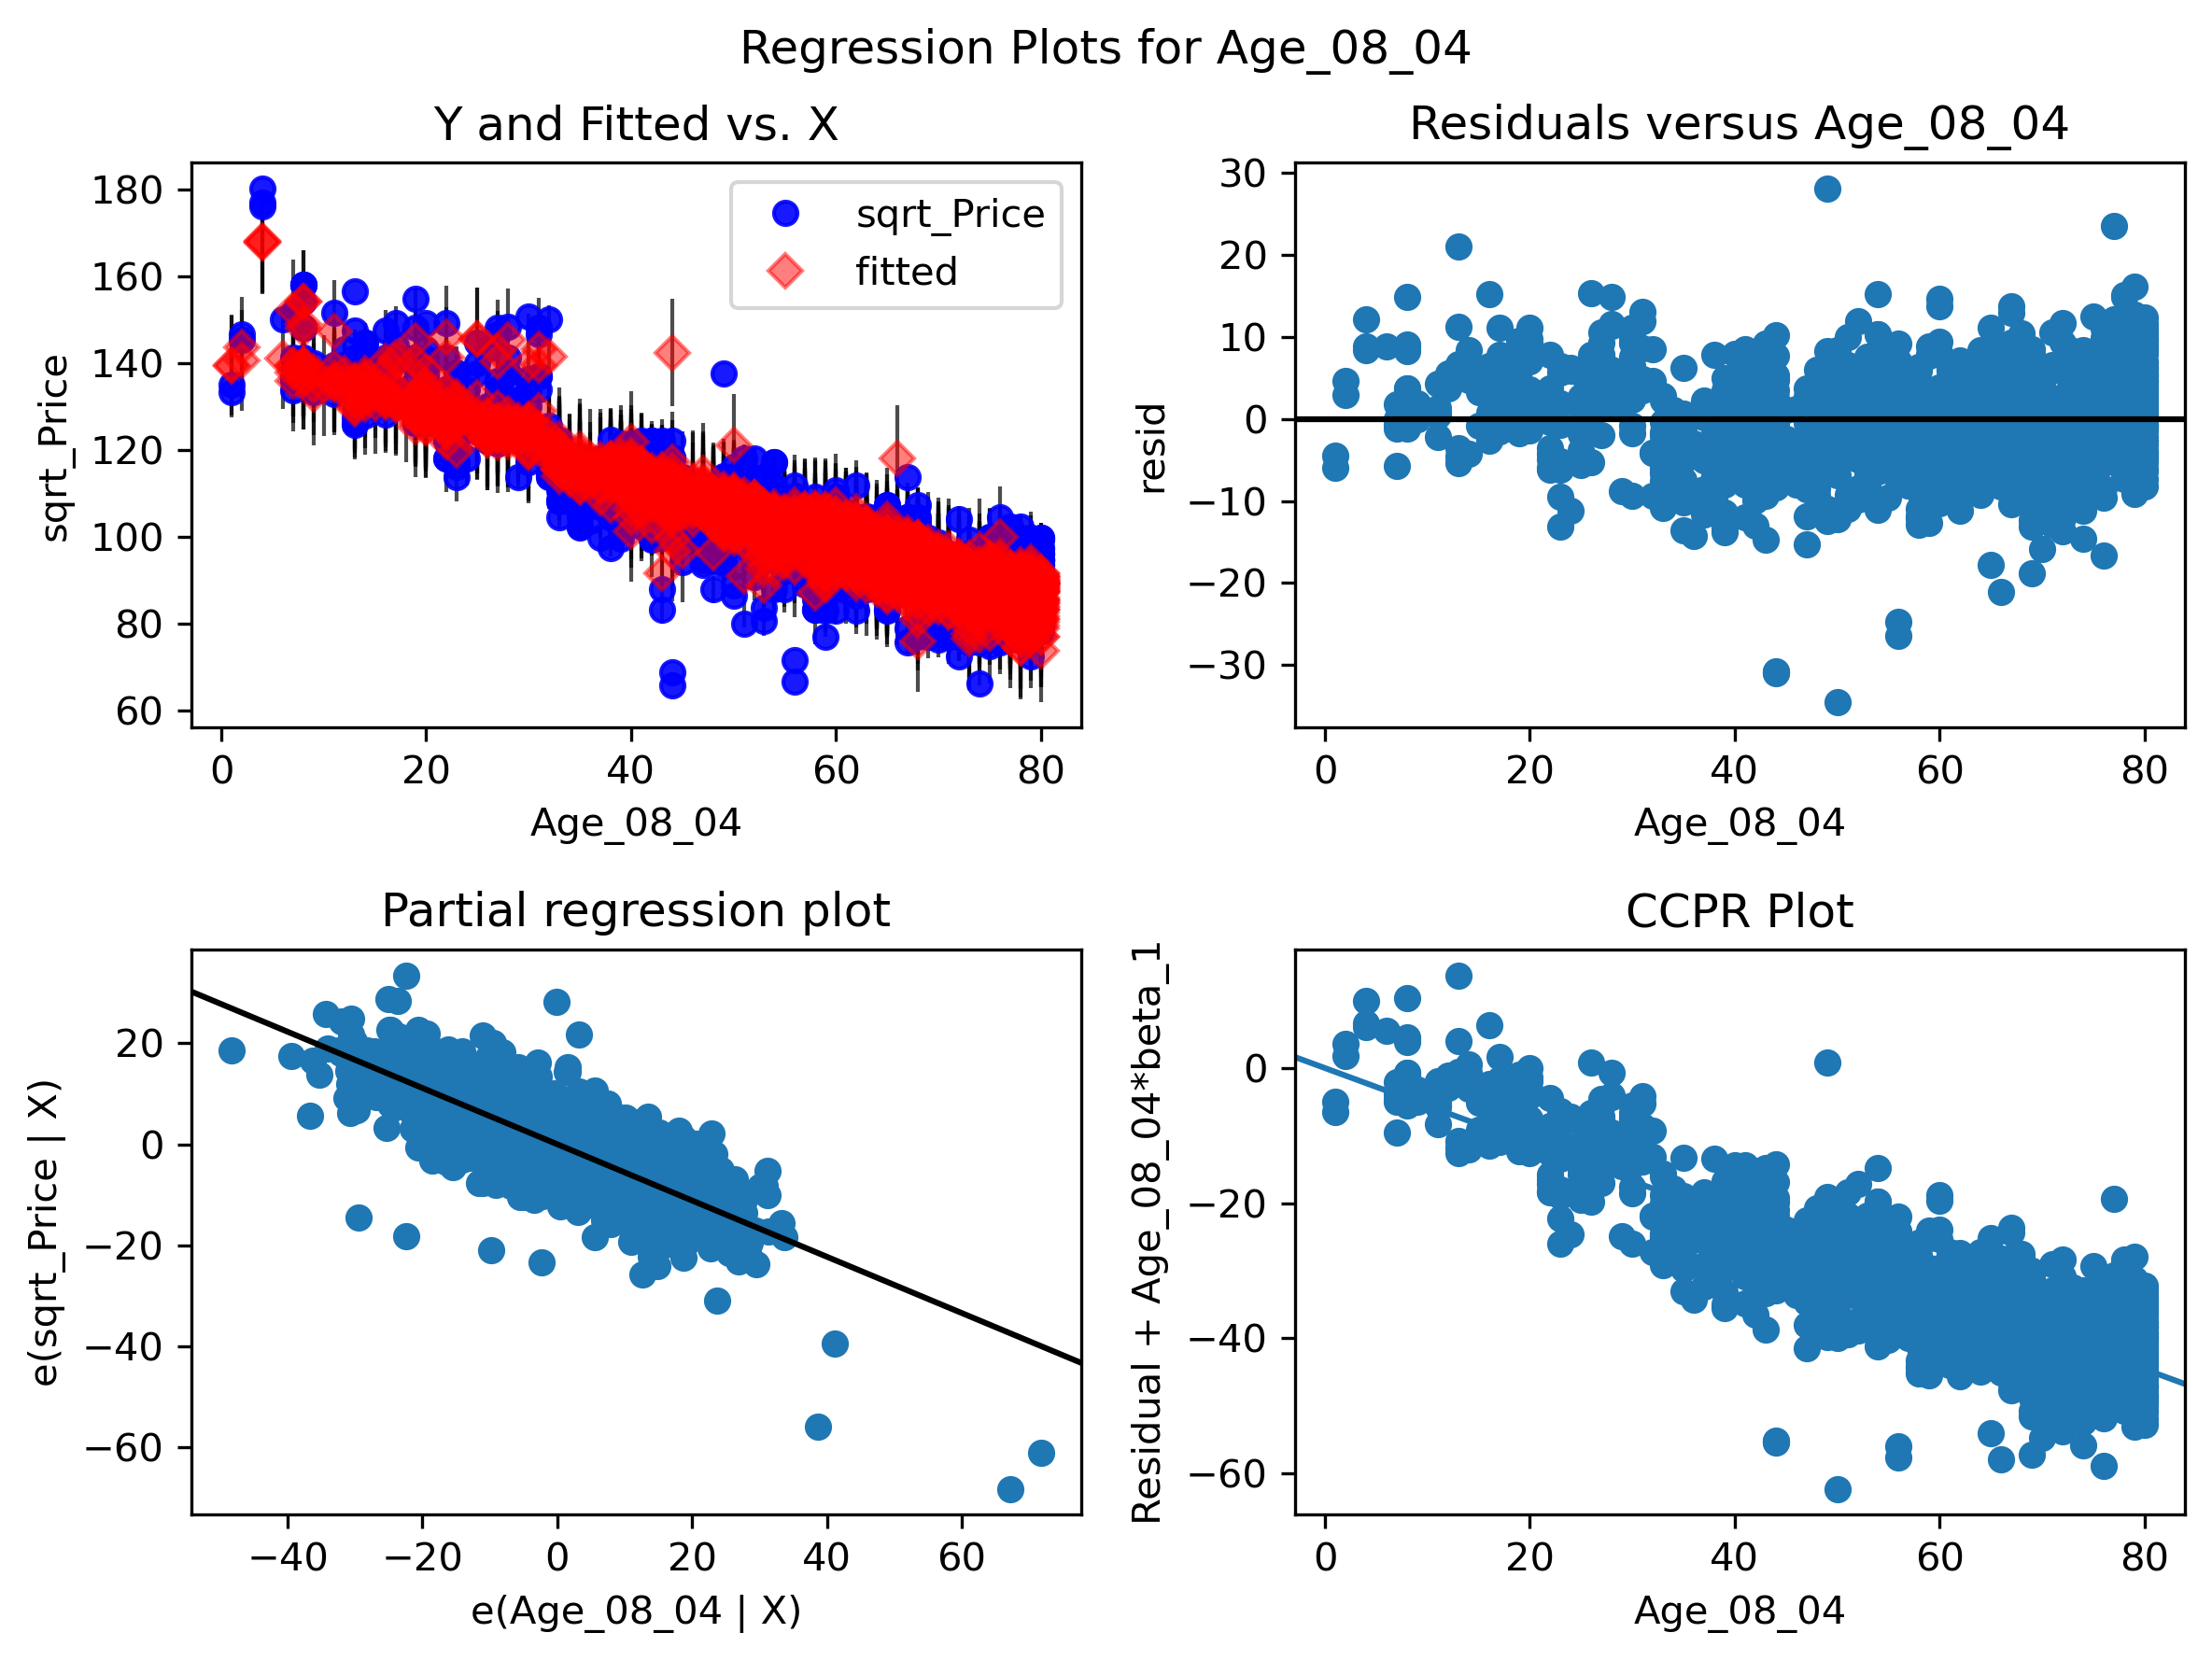

In [159]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(newmodel_TC,'Age_08_04',fig=fig)
plt.show()

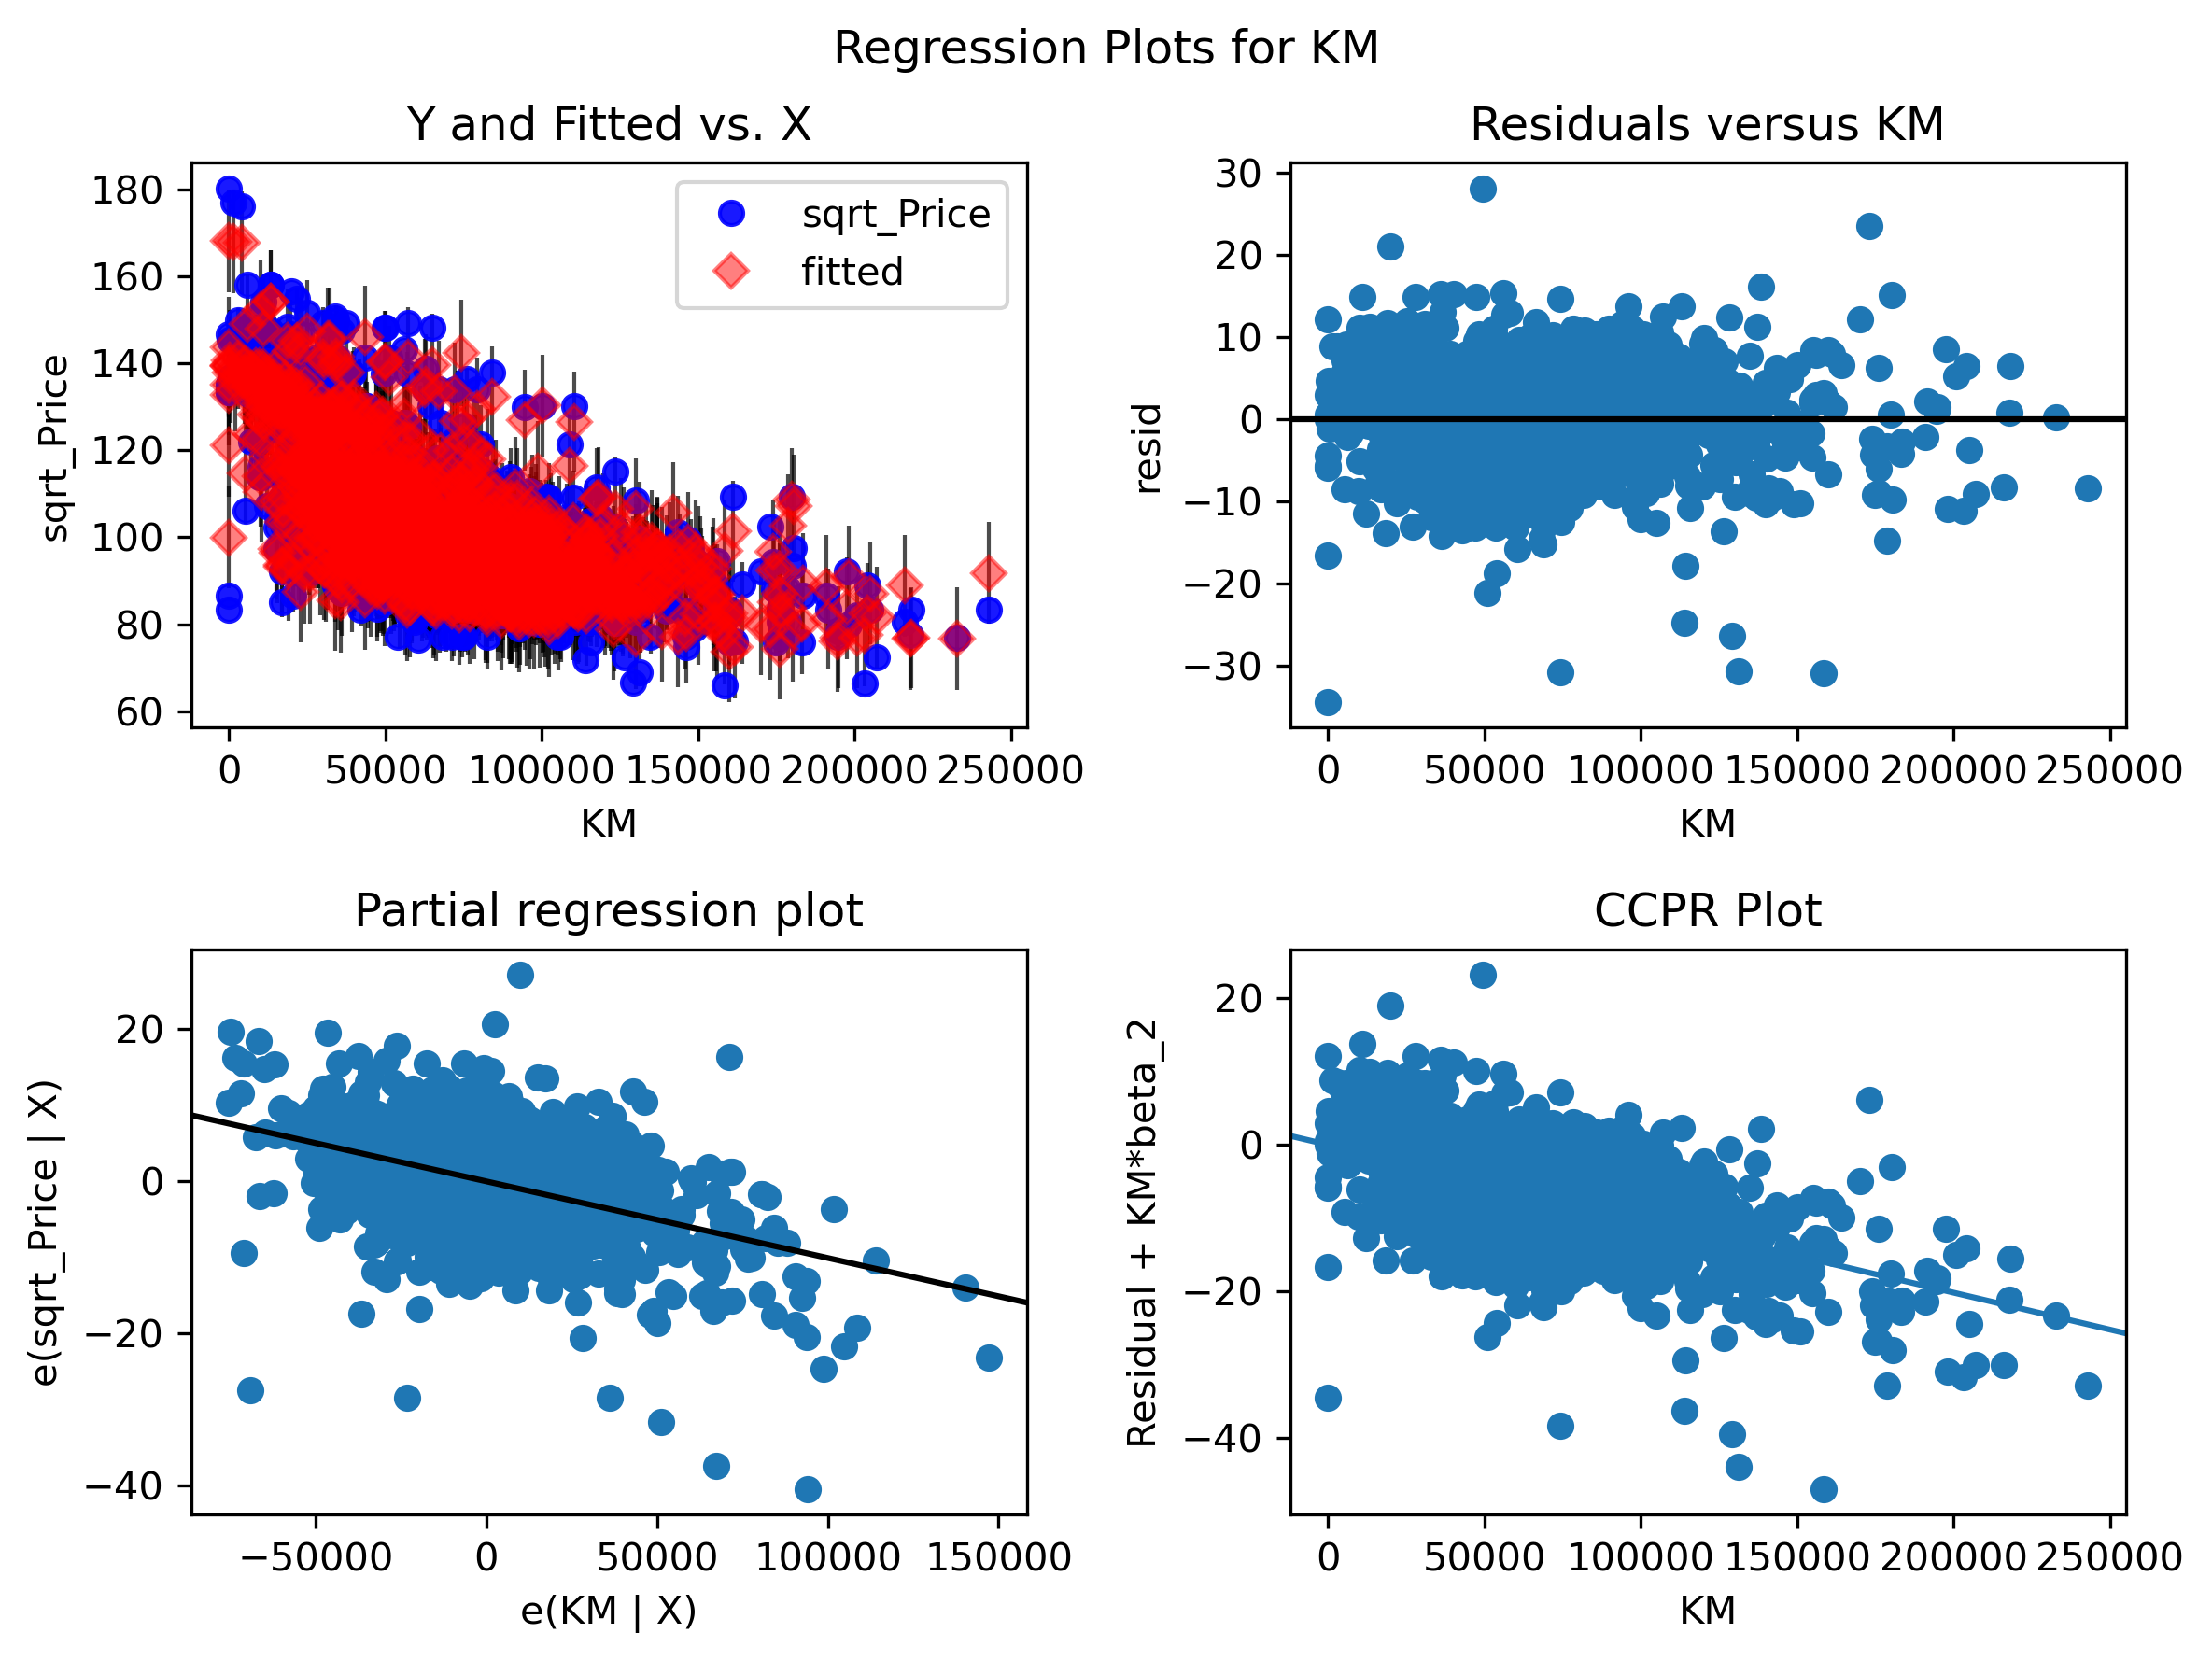

In [160]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(newmodel_TC,'KM',fig=fig)
plt.show()

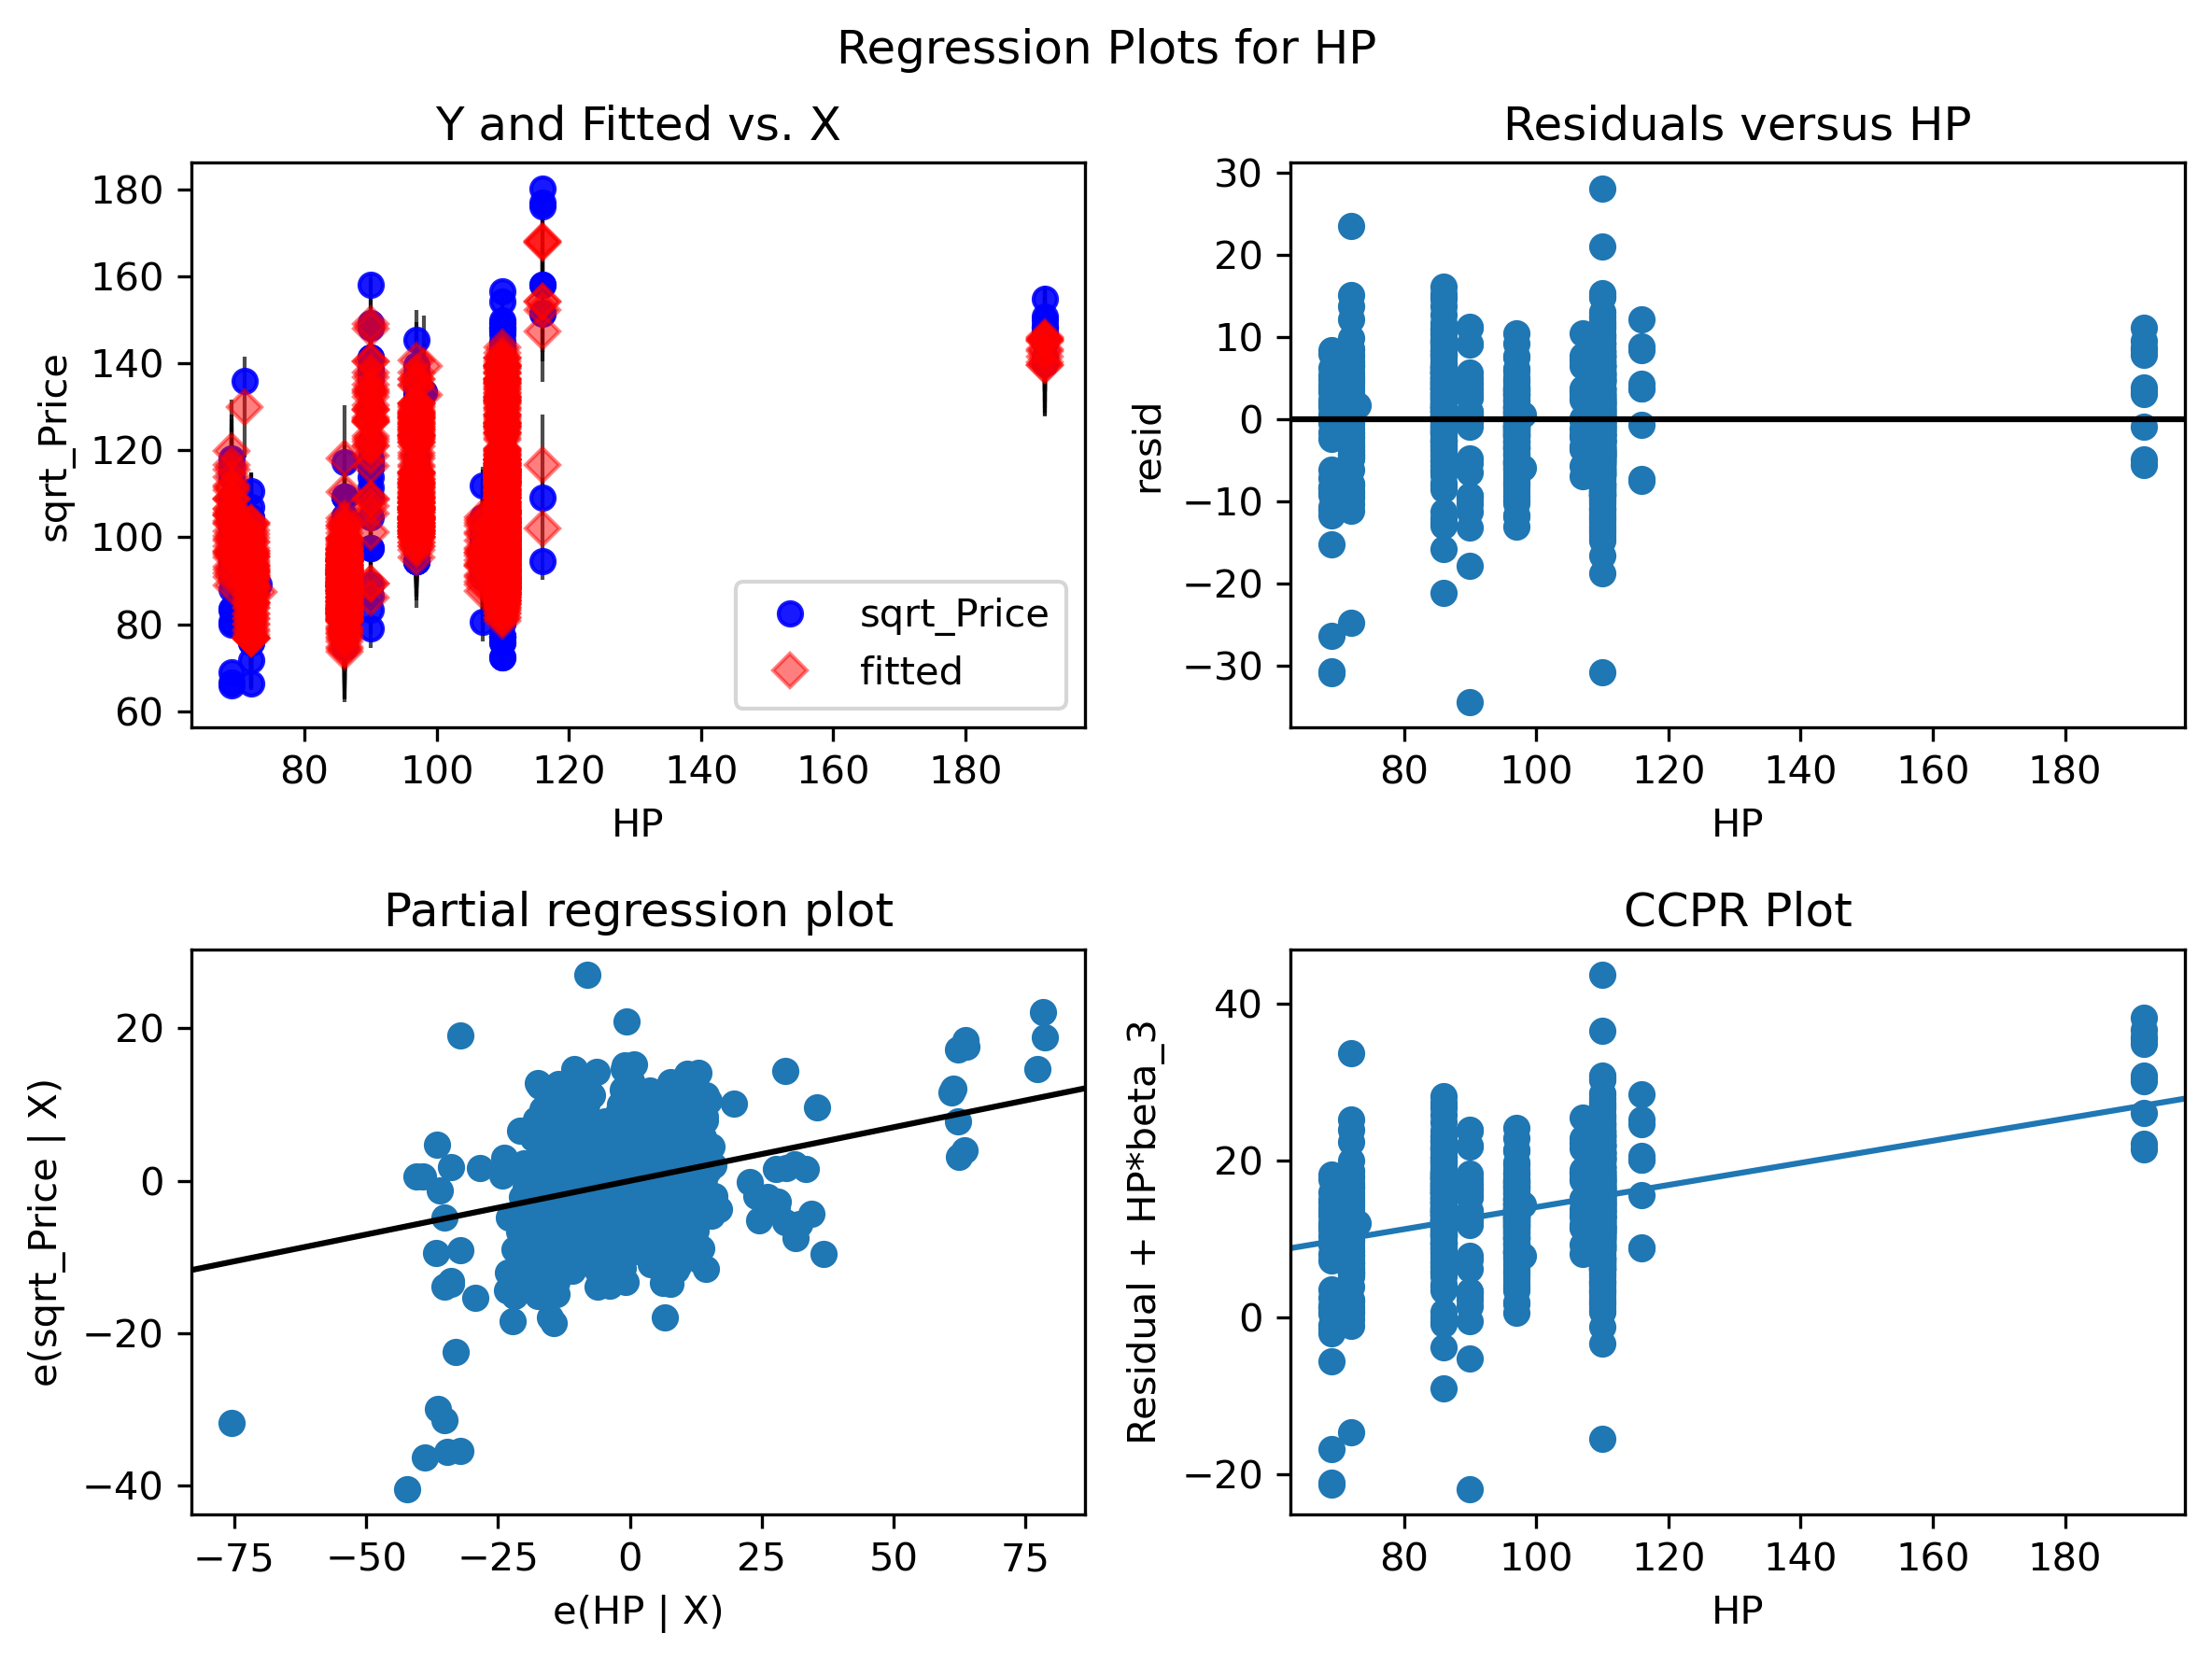

In [161]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(newmodel_TC,'HP',fig=fig)
plt.show()

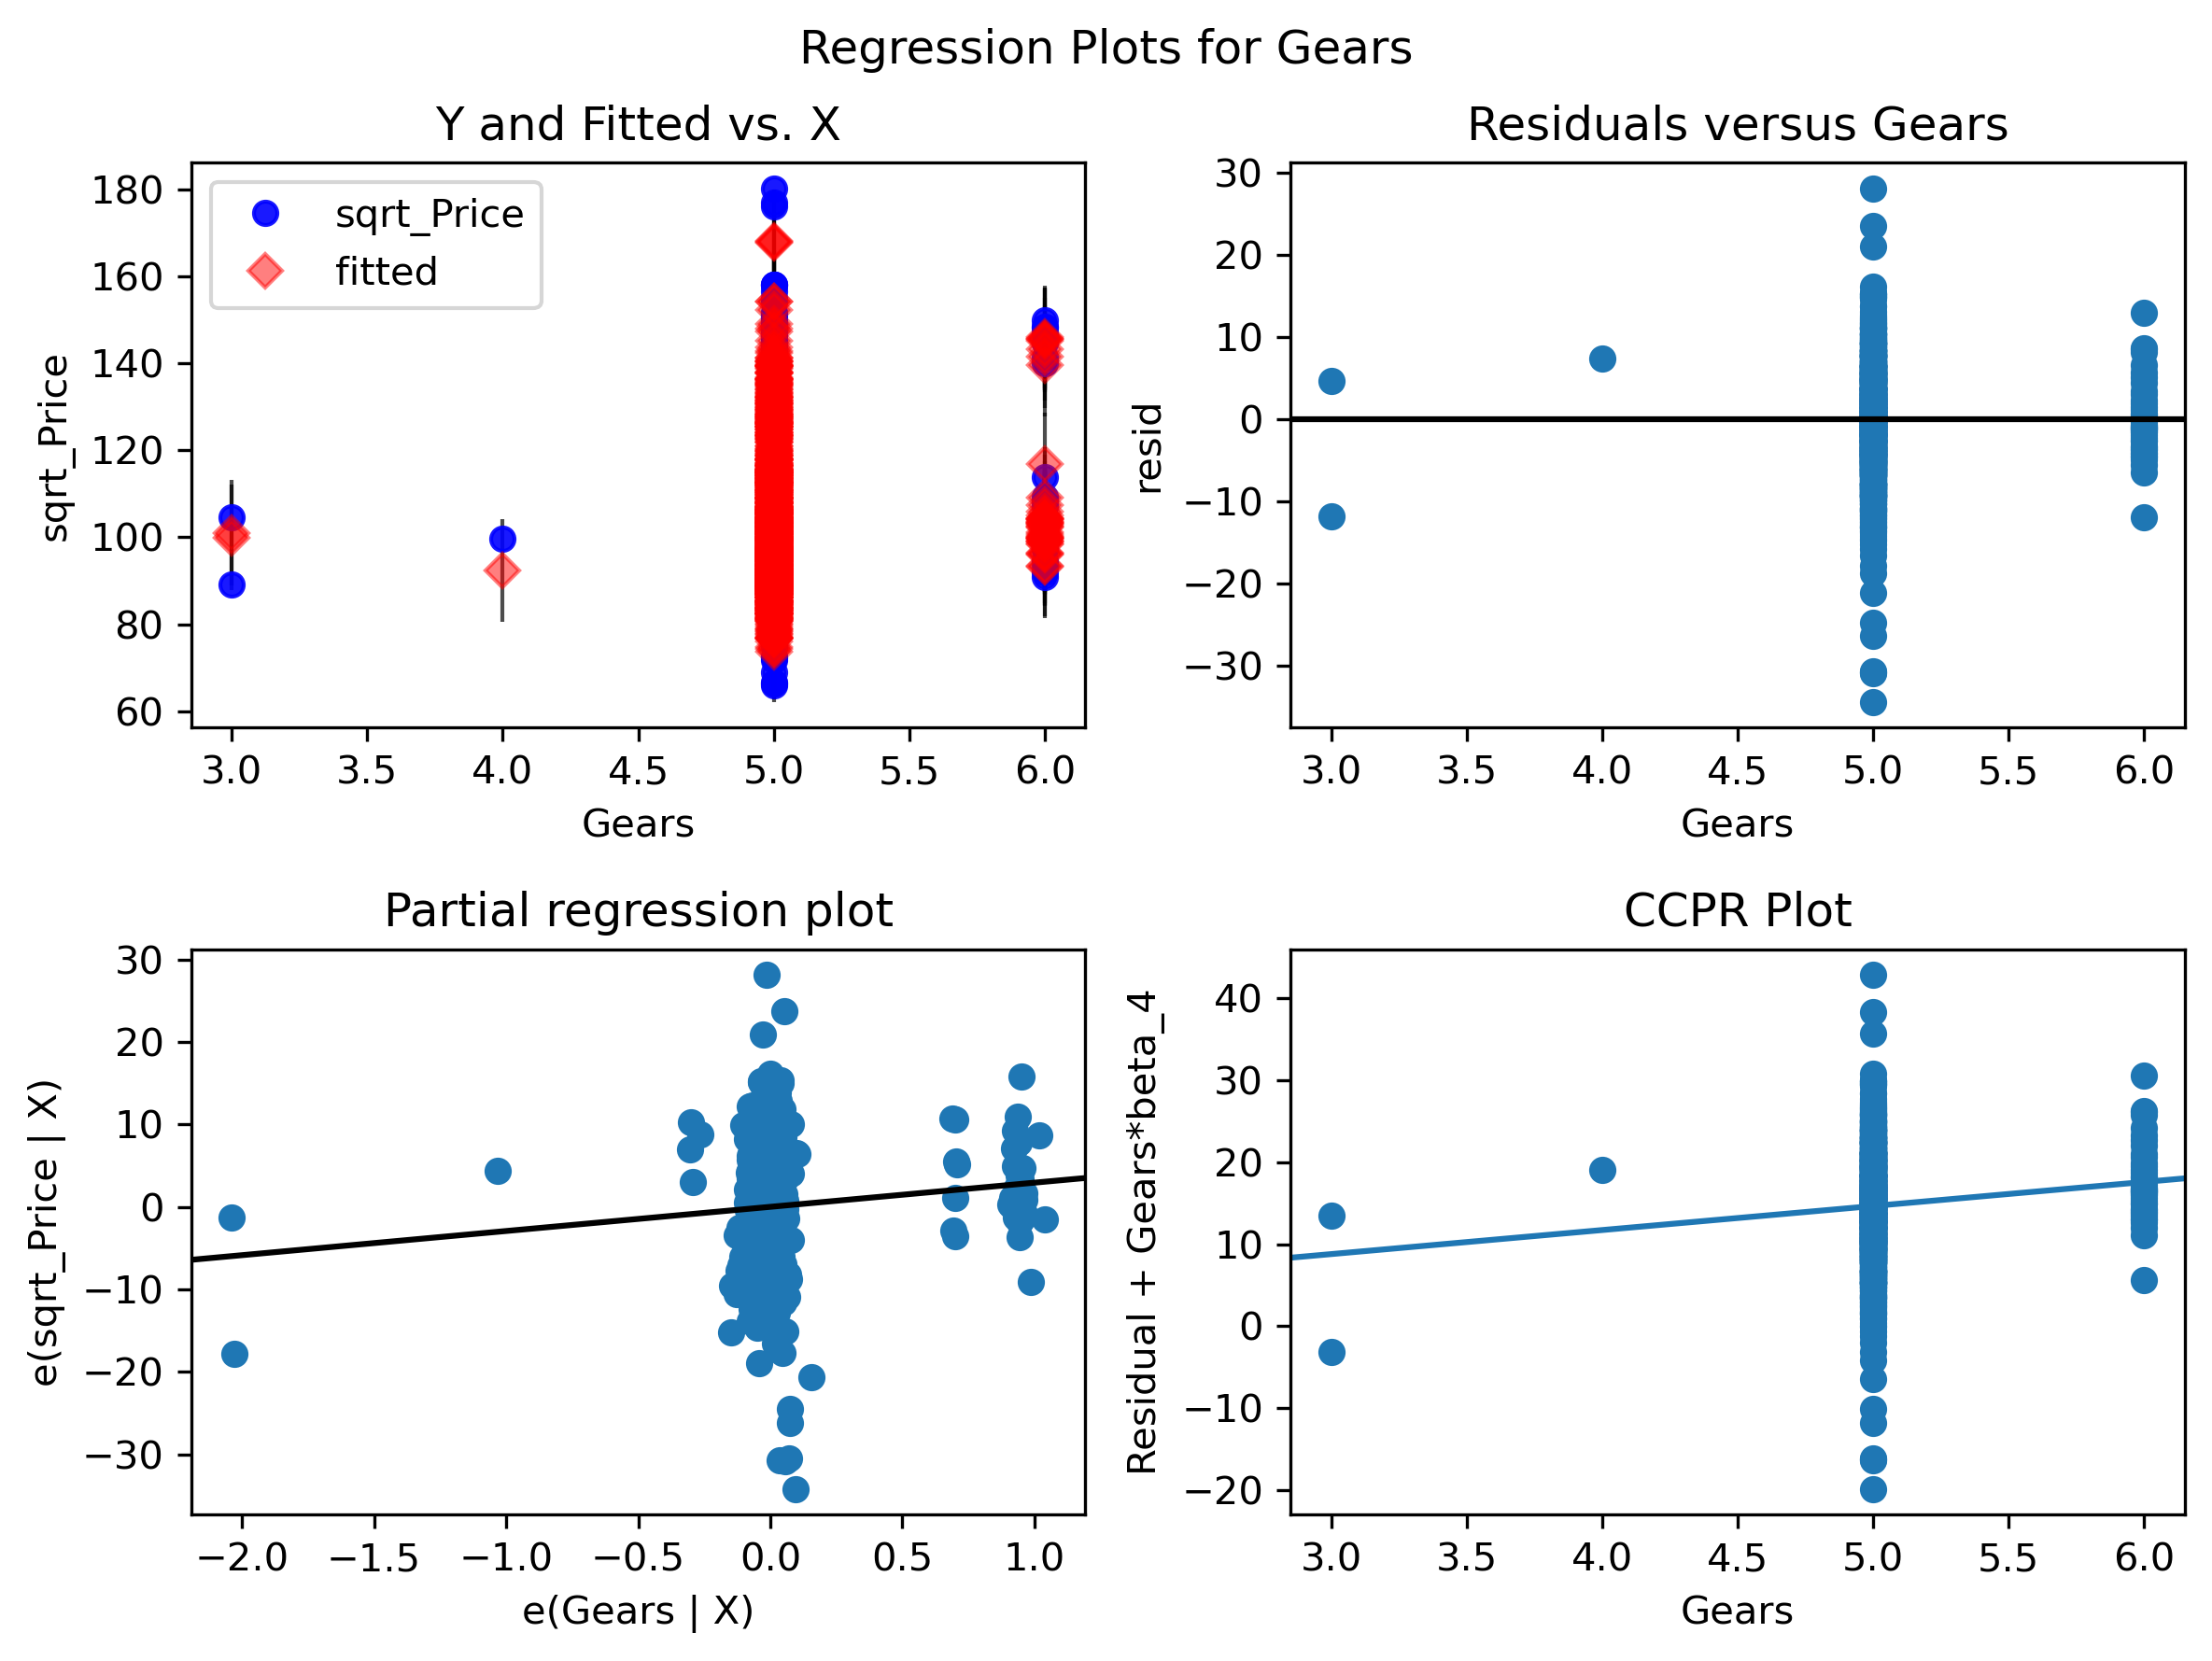

In [162]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(newmodel_TC,'Gears',fig=fig)
plt.show()

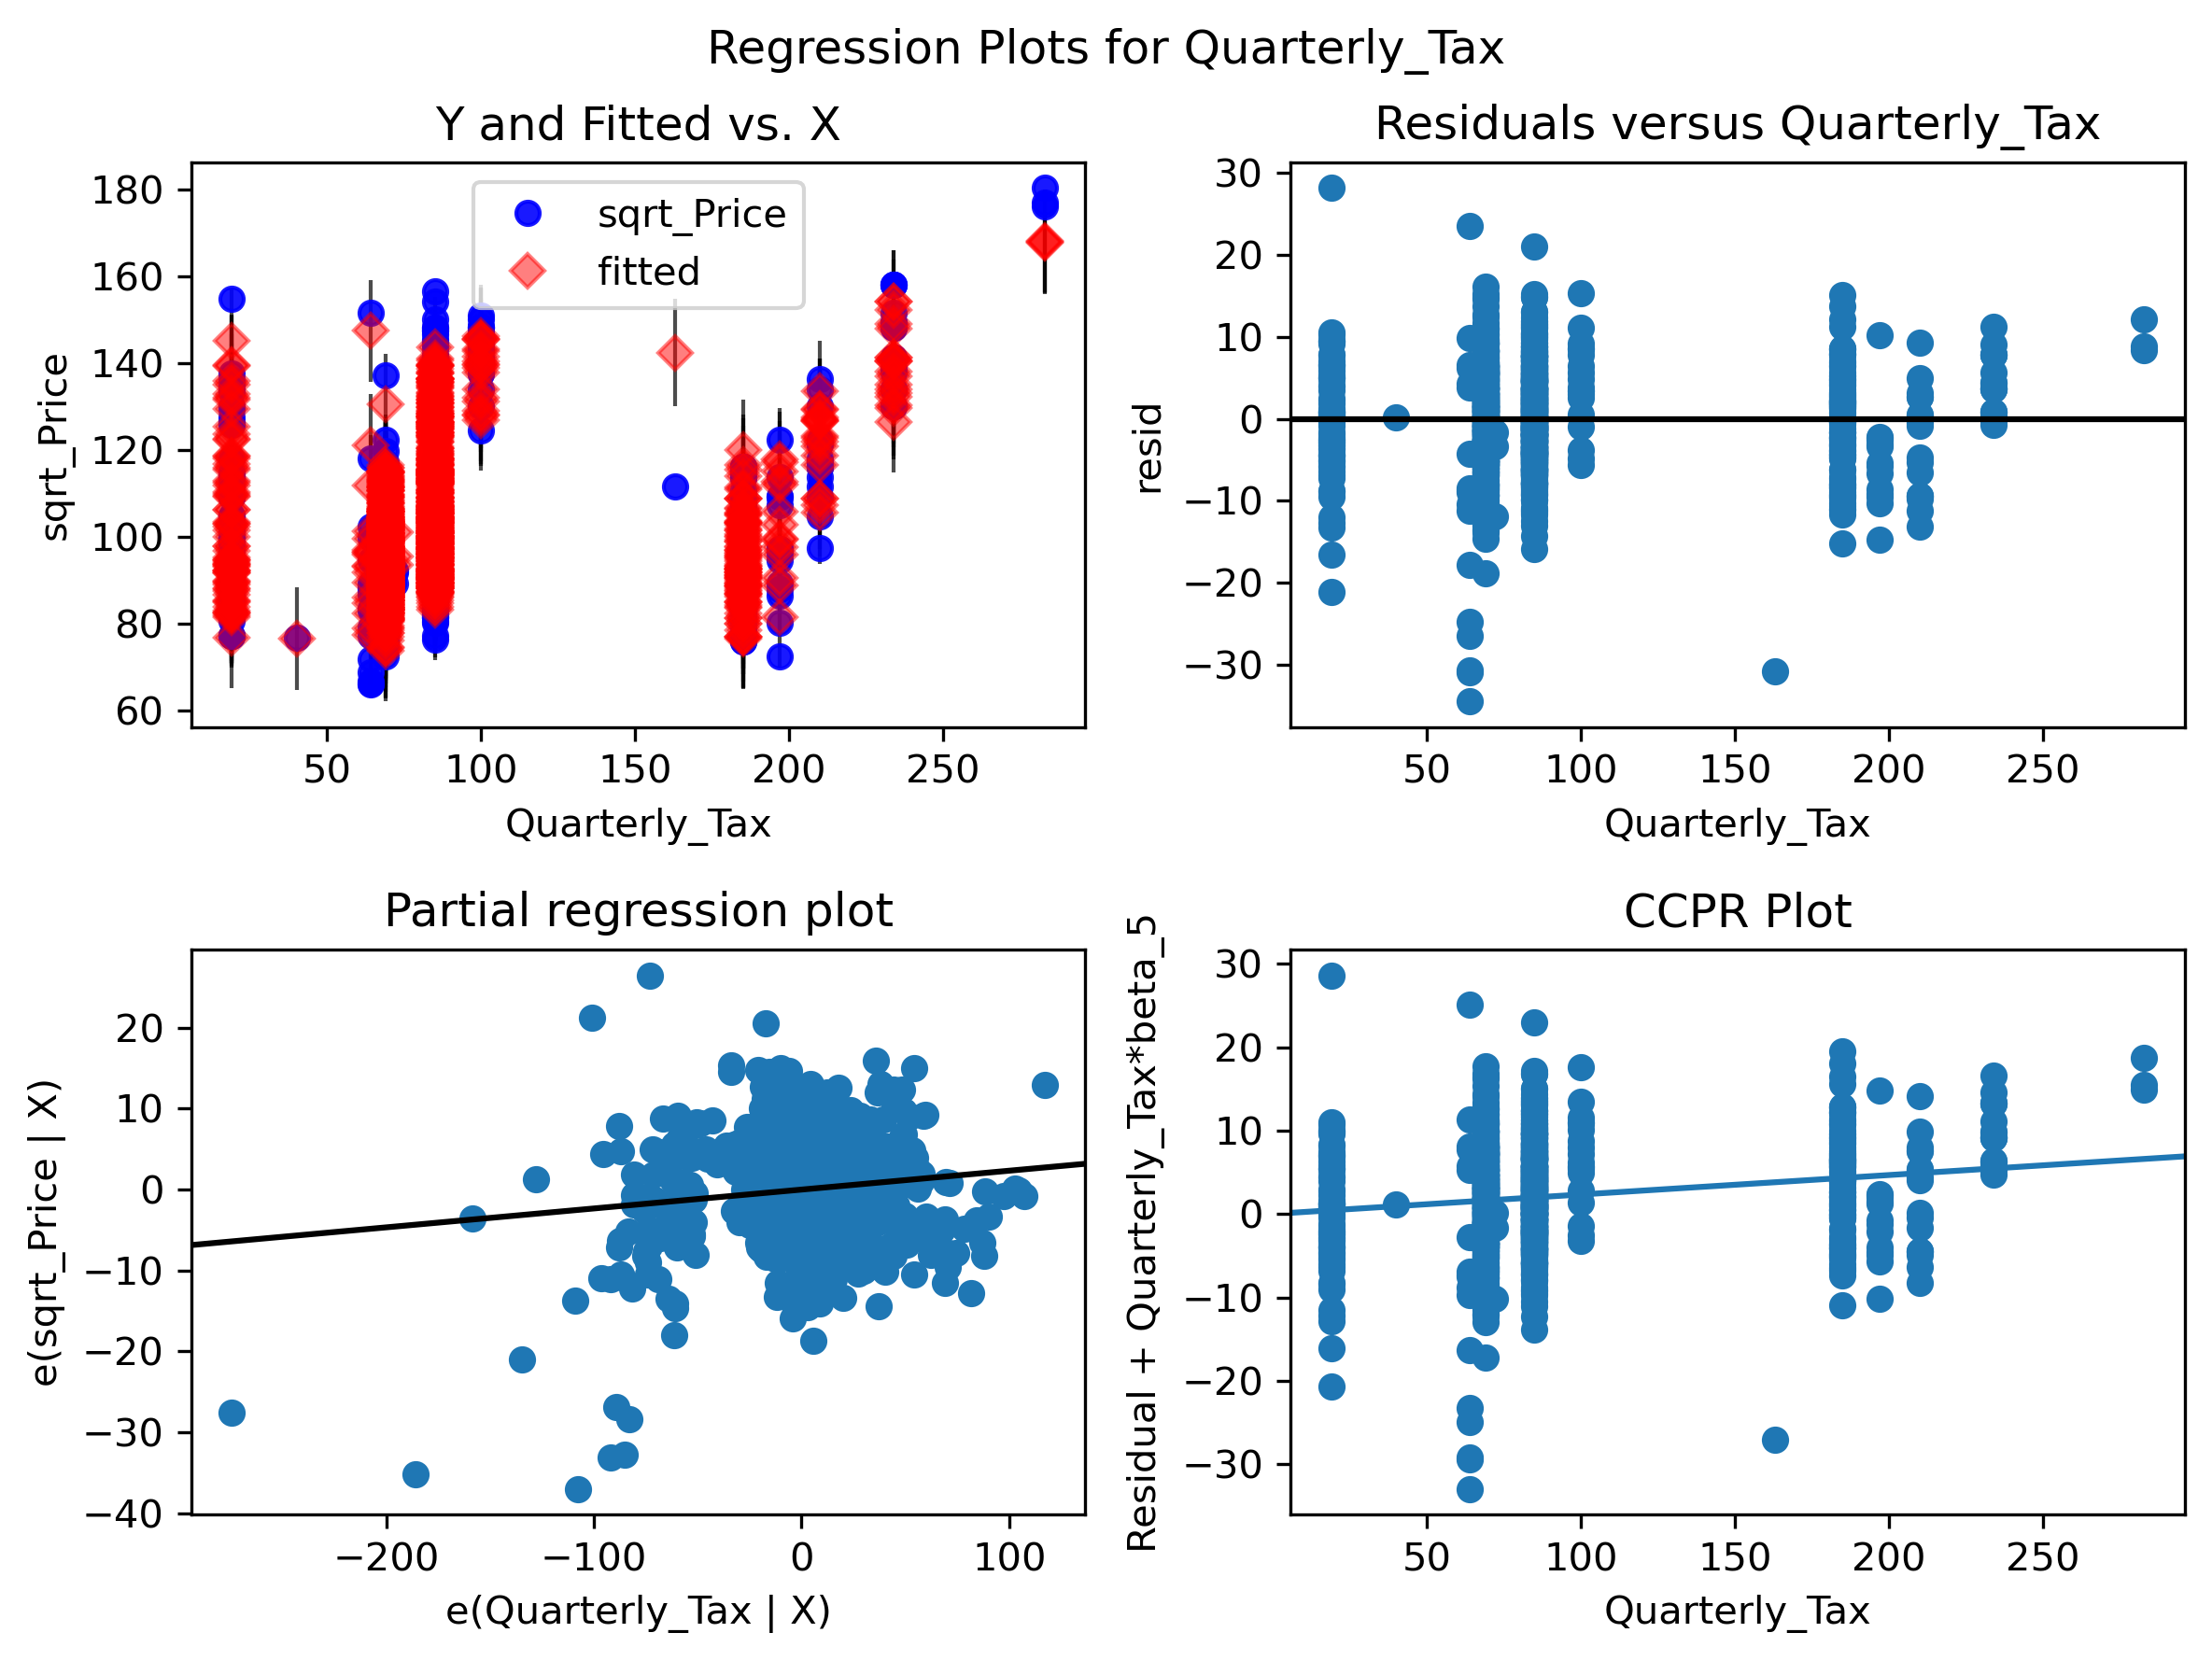

In [163]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(newmodel_TC,'Quarterly_Tax',fig=fig)
plt.show()

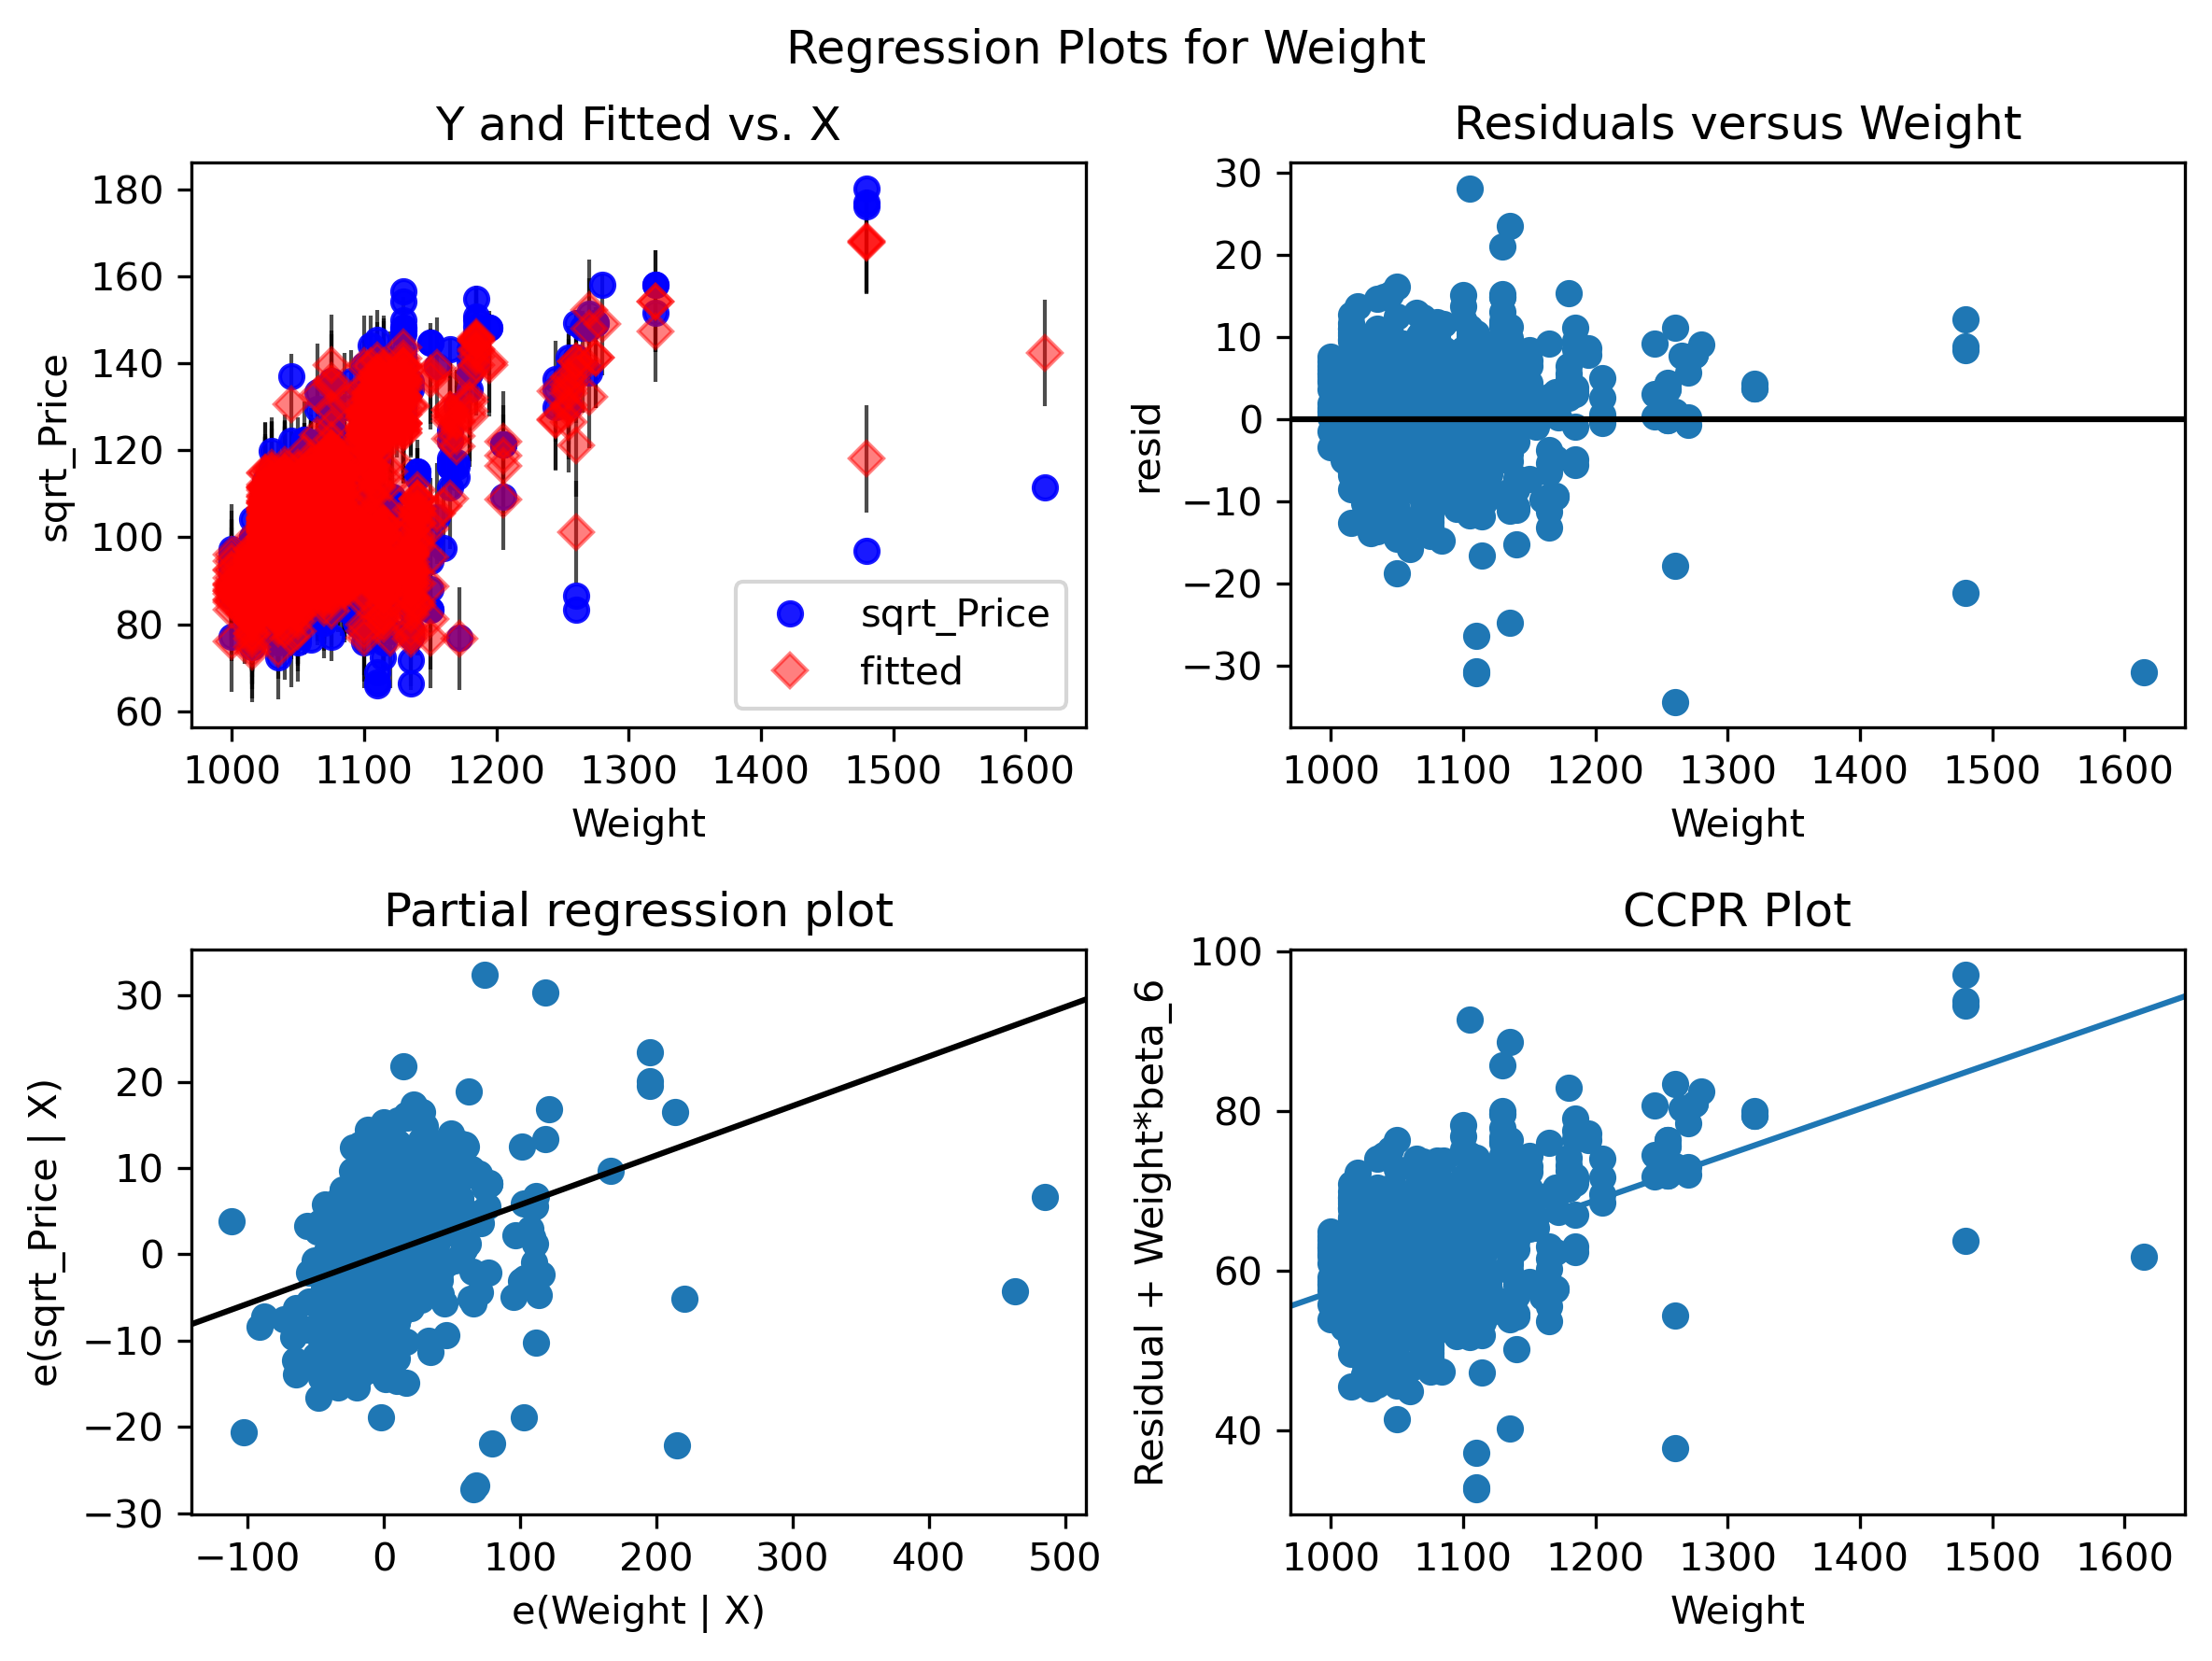

In [164]:
fig = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(newmodel_TC,'Weight',fig=fig)
plt.show()

# Prediction for newdata

In [62]:
newdata = pd.DataFrame({'Age_08_04':[24],'KM':[47000],'HP':[90],'Gears':[5],'Quarterly_Tax':[210],'Weight':[1275]})
newdata

Age_08_04     KM  HP  Gears  Quarterly_Tax  Weight
0         24  47000  90      5            210    1275

In [63]:
newmodel_TC.predict(newdata)

0    135.098368
dtype: float64

In [64]:
newdata1 = pd.DataFrame({'Age_08_04':[24],'KM':[47000],'HP':[90],'cc':[2000],'Doors':[3],'Gears':[5],'Quarterly_Tax':[210],'Weight':[1275]})
newdata1

Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0         24  47000  90  2000      3      5            210    1275

In [65]:
model_TC.predict(newdata1)

0    18556.080166
dtype: float64

In [66]:
df1

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  \
0     13500         23  46986   90  2000      3      5            210    1165   
1     13750         23  72937   90  2000      3      5            210    1165   
2     13950         24  41711   90  2000      3      5            210    1165   
3     14950         26  48000   90  2000      3      5            210    1165   
4     13750         30  38500   90  2000      3      5            210    1170   
...     ...        ...    ...  ...   ...    ...    ...            ...     ...   
1431   7500         69  20544   86  1300      3      5             69    1025   
1432  10845         72  19000   86  1300      3      5             69    1015   
1433   8500         71  17016   86  1300      3      5             69    1015   
1434   7250         70  16916   86  1300      3      5             69    1015   
1435   6950         76      1  110  1600      5      5             19    1114   

      sqrt_Price  
0     116.189500  
1     117.260394  
2     118.110118  
3     122.270193  
4     117.260394  
...          ...  
1431   86.602540  
1432  104.139330  
1433   92.195445  
1434   85.146932  
1435   83.366660  

[1436 rows x 10 columns]